# Hybrid Quantum-Classical Model for Passive Mine Detection

**Problem Statement**: At present, active detectors are commonly used for detection of land mines. Land mines can be detected with high precision through active detectors. However, the operating principle of active detectors can also lead to vital dangers. When detecting mines in the field, electrical signals sent to the environment from active detectors sometimes trigger the mine blasting mechanism and cause mine explosion. Another way to detect land mines without triggering the blasting mechanisms is to use passive detectors. The biggest handicap of passive detectors is that they cannot detect mines as much as active detectors. This causes that passive detectors are as dangerous as at least active detectors. In this case, passive detectors can cause dangerous results like active detectors. To adress this issue, we propose using a *Quantum-Classical-Hybrid ML Model* to eliminate the handicaps of passive mine detectors. The proposed approach which uses Variational Quantum Classifier is verified and tested against classical ML models and we conclude that this model achieves a higher accuracy compared to classical ML models like Support Vector Classifier(SVC), Logistic Regression Model, Naive Bayes and K-Nearest Neighbors. The dataset is obtained from UCI Machine Learning Respository. [KAHRAMAN, Hamdi Tolga. (2022). Land Mines. UCI Machine Learning Repository. https://doi.org/10.24432/C54C8Z. ]

I implement the model using Qiskit, which is a Python-based framework for building and running quantum programs.

In [3]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit-algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512618 sha256=64ed58dd432fec0f1c6f78a6d66d2834807fec833703bf004b2a945c77ff3d7f
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab

In [4]:
# importing necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from qiskit_machine_learning.algorithms.classifiers import VQC

In [6]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes

from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.optimizers import NELDER_MEAD
from qiskit_algorithms.optimizers import ADAM
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit_algorithms.optimizers import SLSQP
from qiskit_algorithms.optimizers import POWELL
from qiskit_algorithms.optimizers import TNC
from qiskit_algorithms.optimizers import CG

from qiskit.primitives import Sampler

In [8]:
from IPython.display import clear_output
import time

# DATA PREPROCESSING
We first try to gain an insight over the data we are handling.


The data samples of the problem are represented with a 4-dimensional
vector as <V, H, S, M>. ![dataset-image.jgp](data:application/octet-stream;base64,R0lGODlhpgI0A/ZjACMfICUhIiklJionKC0qKzEtLjIvMDUxMjg1Njo3OD06O0E9PkI/QEVCQ0hFR0pHSExJSlFOTlJPUFVSU1lWVlpXWF1aW2BeX2JfYGViY2hmZ2lnaGxqa3BubnJvcHVzdXl3d3l3eH17fH9+gIB+f4F/gISCg4eGiIiGh4mHiI2Li4+OkJCOj5GPkJSSk5eWmJiWl5iXmZyam5+eoKCen6CfoaSjpKemqKimp6mnqKyrrK+vsbCvr7GvsLSztLa2uLi3t7m3uLy7vL6/wb/AwcC/v8C/wMPCw8bHycfIysjHx8jHyMzLzM7O0M/Q0tDPz9DP0NPT1NfX2dfY2tjX19jX2Nzd397f4ODf3+Df4OTk5Ojn5+jn6O3t7fDv7/Dv8PT09Pj39/j3+P///wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAAAAAAAIf40IEltYWdlIGdlbmVyYXRlZCBieSBHUEwgR2hvc3RzY3JpcHQgKGRldmljZT1wcG1yYXcpCgAsAAAAAKYCNAMAB/6AY4KDhIWGh4iJiouMjY6PiGKSk5RiY5aXkYuYiZyaip6HoYaTkKaMpaeqopKkgqOFsISyg62dm7SZoLaim767oL+3wcTDxquowp+yubrHvcWGBAgK1dbVCdcJ2Qrc3Nbe2Nfd4uTg4ebY6N/d69ru5+Xs2/Lv4gkM+PkMDAsKC/TGZQuo7h0CBNu+DdRX8NzBhODa2SOXsGJEggLbWXSHcR67dOO0aYTIcd7EiNYW+Aspb+C9jxe9uaQI86VEcwtZ0iwYjt4CBiFJllQANGNAej1r7jxqM55DhARzOl1YUeHNhlQtNtVKFSrTjkmrxuTHMuHDemANeh1bFOxDgv4ICAC4YKKu3bt489Ytofcu376AAwseTLjw4BGIExQowbhxCcSIHTuGPEJyY8qW+VaOnBmzZROeJYOG/Hk0ZdN1KSMG7ddw3xEnTkBGbXr2iNau84aWvHsy6c6/Lfe+HJx3cd+cMysnnlx5ZeDNhT+XHp35dOPVNZO+rr166u2ih3+PfH08d8a1M6cXbWK5defH33/efJ7xbg0AAMSwwr+///8ABijggAQWaOCBCCYIoBRTTDECA1ZkYcUVFFZo4YVX+IfhhhtqyOGHFHr4oRQcighihfyFqGCBJ16YYoYrEngiiR32N2OJNrZY44sj4sijjhaauCGNGAoJJIw/Hv6J5IQgEulijj3uyOSHU/g4JYdOBgmlkktyieKWLeqQ3wsxlmnmmWimCeAFECZJZJZLGgmigErSWeGbUso5hZoKbrgnnwhGqSWAgn5J6IVwGvpfoSoeamGijS6KZZEBYghpnGCeaCeFeFLq6BWdPvlpi5uCemeemZ4qqqRAlsqhmACQCeistNYa44M5hmqqoh6GmqWdvq4qJ5xV2llllVf8aauxyVKo7LKHOqkrsI+qGmmvnJ7qJLXWblvprjSS+Ou30lqL6YvhajuopMGuOyyGxX6LKLznMlllluOOmu2F8UZrrrf+7rsrr7laWyWs+0Gr8MK0OoFrktXuW6quBP7/SPG1YOLbbL0bO1svtB03yzCrpqYrsbwlC0wjgHtOqurE4L6M8pC7wmxyzTP/i7HF5lZ85cDZIuuqxkJXimzEwmY8b9Gflnty0z3vfKWTyCI88tVYKziFw21ODXTSEDudrKtAE/msiEd/SLbUIKO6cJ05z/lfg/NCurbaM4ub6N1WCilu35mKfTaUaQPOY+Fu/6xyhYMfTmrOl5ItuOQXWp315ZgLeIECLHJqJo3Hsh3g3597zHTmqCtYg2qIeTDCBx8gdsXqiMkqI+hFT/EC65UN4QR/f4tOJ+7CL3o6gQ1qSPzHo5taerPHFxh88f+BvrGCpJdpffQyeq696f7U20ij5amXj/UInBNIpJmMM96nzwa276z59Bc4AgAOIKZAfgOUcIIFAWDAFZwggfxcIH4eExl/nLCDAOSHASWoQH4cMIQr9StB8rsgAsdmoBsM4VkZZN6n2JdADgaqfY3rXsdSWCoSrhB78OvcCzFYIfLV74YN25wM/xQ+4O2KewMKmhU0KL0f9hCHWRuBA/Y0hQvk5wBOoJASpZifDKQohRY6mn+mwID8VGCI9wOAAYZQQiKqsGN9AqJ/mqCAD5pIizQ8FpNgaD0Rsgt6dvRP8NRIrrGZcUB7PKL75pigQOZxSzZEoiLP5KCu0Sl3h4SYCQ9EN7AFEV6LROIIbv7QoCY+MYoDnECDwmhFIJIobWfrIgAsMMQh5AcAIwgdHBF0yiy+b5IBmgIAK6jHkLEwlyuMpOJwWaBKukuGtkyQMWOoL2LKCJK3TOYJQZXITFozQWwq5sbkuKKj/dFV3AyUMb95zazt4Hf8CSMUK1QDKgIgA1dowhCaECB58nKQ/XFAflhpBSMMID8bsJAThjDPLZ6toCkaKEEN1Un+EJRBDSJoFJHFRIIKbQr4CcAH/1QlieKzP0bgpUM/2ISJmi5G3hQmv5wZxHGqNIssfWRKtbbNmA5opoV01g3yk7By+tRAD7spJmOERmWG7KUl/Gn5npWB/CAAlIzjQBVHIP4AABDgBP5xQgYMsIEBaMAJs+SPPlfp0FeOIFlD2JwEAhAADqBzBQgwgAFGMIQuIsAI/dQAAiRQVQs0IUNDkEABCrCAISwgP4Wta37aaKESEOAC2aigEVRpVQNoALD8mMAAznqFIVTgAAZQgBSoCoASWGEICAFKAsjIrzIVFUGhO+YZw2qg2DKTZLTVZmuJmtsz7lQ/Sg1uLjPgSKPBFKXti+axfkkolwqXfk0FwDovFMa5ONaqvHRCF/dzvwyE7j+q5GcYCUDGIRAgAEm4QhjPyh/8AIADCnAgAOa5PzK+wIAw+m0AYyBBAPBjBRPAb7LuZ4HOStcIU9BBAvJzgv6FDsEA5J0CBACwAgoNwYFzfaVb4/vBGQDgBitFrseUmyzmGg+n04SeiTXkXAyiUpj8QfGBTimF3/b0ucJt5A5727nvujhkRMUjjssX3afCNIwM2BMDBBCAGqQTAAGoUg2g/MFr6TOAq/snAiqo3vyc9b4AkECIpAoAAbxgCBOI5ZRXaWAAJACdrsSuFX5L3jkv1sIOfAGo5GJaLubHjVYIMASoiIAGGSE/ApiAER5E0CqCdQTtLPFtD+VjcQJ5ReBL46XfV+kDMY7H3ev0Bq9QzSH7dHMrNjUS8fjRaxZZCgAiJX9USaYrdNEA/PntCgQ0VgRcYAOQVtYO/rmCKf6UAAAD6NoGHhjbIRwgALGMcwHgnB9cn/aJe4pzoa0QRh3wxwBhHqIqfTcFf76TPyUIwAA+eOj8OLk/F37gPJOg6npfU9Kltvci0afv4K6QnEh8dayrKNY8W8EJchEAAxzAgIOMgNf7HFBIh4A+KHeNzPDU0MQrblVqi7GsAHjqtcX4Owwslh8J2GuD9jffBt0Aw/xo+Jb7+Uq89mcK/Q0AAWzX756bz0L59jn9nJBNod+7hDBOXXShOPBzW8EBDtyPE17phKo7oQkpHCs/A+Swza7A4v0h88P/44QSHCADsJo2yK0d5zeP3AC/C3Bpt2Z1cf95T2tOMlirzp8msP6VAGeb7CsDMAOjG/5yG9sBTw+PRB0zXpH/Tjrq3Cvy/6y34MB1QlXne/MBhVdA2l2lE+4bAAn0Z9mwnJsTkxxnuEe02iB/80Cr/Tv3jn2L4842htHpHyOw1QBn21p1Tf/44i8L6Is3PnSLq/zUIS7V9HNiyHnfnzAe0AoMyHOyVHkBON8A4mQNUBh37QKw84fMHHgWmKOdH7WP/ACxzzbtrVACJhvA5lPYtZ81OsQmyKW0/VEDklVtz7Jo/DEDAxBA0Nd8DCggoRN0DcgwQRWBmZNAfIREcgd3AIJ615d9AHACFAJmsERQEiBS/8FyXxQgFvBAD2JxboR6t/dkYv40AnK3br8TZwRwg/MXbxpoBAXAVgxAUBuQMKq0AkNQYWRGAEYYA1Y0cjm4RgbwfVagAQGgARR4hZx2BYoHXFiINVzThZiTUkeEOk5wA+clAAJQAkmgLEngAFW1AEngbP90AUZAIRwgX3IGIEPwAv9kVTNAT/+xAvIlATFQVQHgXUMAdQFERv1xA5vnADdgAA7EAI+GaDMwBXfIVjUwWg40AO82A3i4Wf0xA1VFAAxAT4KXHwFAQegmXy+gLE1gAJtVAwpwACYIhri4RTWUfLm4LA3yhb04MuBjUzdUAyXwAseYjLDGHzuQjCWwAzfAGCtghBVyAxxwAXQlIDEwjf7cuALv9h/GyEmnNQIxsCc3MI0ucAKvaCM6MAKXeFol4AK/0wQlwI1nJo3TOAT1OI0vAGcjUAEj4G3+oY8rAIhD5AIaoAErgE5G0I1GeHMlQHHYeIvBmIvNAoEVmSYjoIEZOTKg9mPPYltjGCBcEEcdeZIoqSZbeGMpqSbos4AtGU1qcj2pInlnMpIxmZMZuZI6mSZElz49OSuyhWmKImkfGZRImZS2YmNKqTWjxHxbVEz0A5P0M5Sa1iWJ05Ra6XxXyJNbmSAZMAAXYAGIcQEZkAEjYAEXYJZjOQJniZZn6ZZkeZZmuQEbkJB2iZd3qQF5yZd72ZeAuQEZkJCEef6WhWmYGvCWiWmYimmWiPmWjImYi6mYkJmQlbmYmDmZkLmZmzmZmhmZnEmXaxmaoVmYhHmaiWmZqDkCo4maqUmanjmYg5mQF0CYtemXpnmaf5mQHMCXhMkBd7mXvSmYqYmXxrmXfomcyGmcunmakqkBvcmbrjmd1EmZ1ombG/Bre3mbfflrzlmZgKmXu6kB3pmcg2mWmdmZshmZzpmbs3mYhzmb1rme5/mWu4mcwOmbvomfy7mcdfmXAKqXAoqbBGqXkFlAXPiVB0JVDOcAROEAEBqhELpwE6oAEEoUFMpwMbehHNqhHtqhEhqiIjqiJFqiJnqiEtoAKtoADsCiKP76ojAKoSpaoiv6ACzKDw0acxOqoTmKoxGKowu3oTFaoj46oR96pEiapEq6pEzapDp6oh8qoVE6ogwAAUbaoQiQbEc6pFzapS/qpGAapksqofGVoApKIA6jAMnTSWvKpkPEpnCaPL7Ypg0Fp2/aUG8aYxyVp3hap0wkp24apzE2qHYap340RIjKRHeqp3BaYp3kqG1KqHuKqJQ6qRx1qTenLIeqqHWaqJG6pjcllbq4JL/EXI2TITxEqcR4U4CKp1HZeXMzN3+KqZTqHxs5qVcEqX/qqbN6p3EqqIUaqG6ap8SqqMhzrFnTSUx5psgDjFqjlYZDlHBjI8wajLdarf6MpIW8iK0BkgFqyq3gGq4MUwLAJ64xEmcsaa4PQpXm2q7u+h8lsG3veiDL6q5EB5Xzmq/6annlypVy2oX1aq5Pua8EW7DV169eOAQxgBgzsFG46JXvSlwGO7H6Sq7sWiZT4AILEAAX8AIAFgAQQJEIAmi0YgQ2NzIB264TSLEsG67xerHdlImxFGP4MQC7tiJ1BbMDcgFSODIQ265TILEtO7Tgeq0jg2TP8mBQ9o3xM1n4iiaC2LMMk7Li6nhEe7VnarQLE28A+B+UR30E0gQTEEChGiMxkIBMCy1V8rPt6q06i7VwC4YvOzJkxnmW90rcZQF6y0nXuJblpUoEoP6WN6ABFlABFTAEGpAACzACcKa3FrABVlADhkuW6WSIDHABpsUwGFmtLxm3npuUWqswLBcABhmAr2SFfkZh/fR/FfQC0lcAiNFoTsWaVVUBf1J+0iWDE2AFTTACBwBl2JiutsK24uqsn3u8MTkClbcw8vWE//FbALC7gZYfu+YEv2u3awaUCJcfJaBk+VF4VgAr8GcFXxe9MdZFTYY1VMutDSIFGvC0yBu/uRi6vvhK7jeQrwQB/CF3fbZgduth/tUfUlAAfyaDF5AhWzi+5Su9qSu1C0O84iq08jvBFTm3DANuUFa6uaaK1yd3WDUF/suIANw1A3x3xrZY/CG+6P6WHwysSmmrMBAcritLwTSMhRY7Mv1lt/4BZqI4vaoLwndnBSPcH05AwJx3wm62Jwm8wuZrdwDwwtASw+wrwTVcxRRowQsTA6/0wmG0bvtLvQeHAHd3BUMMPEbsRuXbJipMvix8vu42ISi7rQI7w1Zcx8WHxQqzfxiwRU7AcrfHv0N0vaxVxgd3xgYMcuN7bE2cuoVnkwoixdyaAQnwtnHrBDVwAzWQyZlMsnasVDc8Mkrrxf2xwMpyh6kXA/LlRr+lAJ01BCUMAOC7gk/MH0bAZAPQIAgqvdjnQJcIxbUCydjKb50MekOwAWwVcjdABJiTBCc7zApCrssIytm3Zf5Vx4eHSH01wFYFYAEO8H/FxrtiHABquTVGnAD1OIdC00UKxw8PhE71BwALMAEOvCybe6YYBb/DHGeplzkX4MvOTCBmB7YLMwUzYAHVABQbwMno1nAJzZoZkNAOpQESMAJ49coFjQCLG839NAEHwAAzcAMYkJAlACMrIAEVMM/0LMfm+r7/XClJYFaZk27g29IIYnYafTVVAlb2YicIUsQFHGQZ4sgxAszVigH43Mn6HEuN46pnwyAxQopm2qk0Da8HQMk39MoOq1TrK8NHbcf6nH5TQASEWwEXQHFxtQF74jCGWwGrkwAHYAH0NgVpVQETPQU1ULjYmE59yACU2/4EF3AACpABF7ADU+0fn9xvPj1fN11ORG3PLF3Y/KEF7QZLfxJvA+AAFyDG+ywFGHwA2LhYgAjABgBrYWR6SaC8U2VaElQDDvJhkI1uB7DYpkbGr1QCAn1N9aygVlvYkq1h/UEEchEAu6bFAKC/s+Zle2J7zDh/ikx82Pe9E+IEDjR2GeDPw1wCBSDbBSIhAMLd/iEhWhDZL9JMJYIpThAD6I3ehC3eAxLeZ+QlCJLbCuq2r91m79UfsShGFfRyAbAAfzJhXUvc/j1yCABr7+zcqpQw+pwBA/UDr01/8jq0W120QMnbk317SQBuBqDMihcA32oFAC4rWwgAsJbAv/7T3P2R4MBDWTP34HjMso2t2xqwAA9Oc16G3+A2AMq8yv89JsudH/S2hdv2AlVl3LsMy/B2vci23pB92C0b4wo64zWe1P2R4ci234vV47ECclFmBQksBVxw4CkedQMJ4ACQgk3OkRKu0hHc1XWc1M5i5V7M3x8OAWyVuXkHciIn5rPGVuA7WlbAiQAgWq/94mcKYxQC5V9Jxy2tzwFlYXIx51BW52w1dpd3WnJBAElAQA5k5GMbAN27iW3EH04EAVYNt4ZeIIvGS/k30wL8GIghkDg0A5Bxs3wiSFOg6Fv52JDtBOXrX2t4BS/3va1tVTZn5zNIrv61jBL2QA4A4P6ETn8JmADyLAUYvQNGMAEC4OpTTb8FsgNBSMsTsI5zo1j7jENNYMpJBij59z4Tzq2MPswOI5hv6Y6nTZd0Re8aMLPInhgJMAL0VuWZDQGZzJqV0R8RxLNT4L4lMAFVyu3djrAG4gQL0LP7TiDRFYPF+ECzMgMNQFO6rpX0XeNlkn0BwHMkXyupro0IsOmnJQDnNCCXrkyi2j0D8lvrjmncJNcGkGTC9O7B/OEpryBLtuVDbyslMMkJQlUEYAA7MGUQlrkxNgQINvMLNARryKjJIwVUPzhy7cqZKgVOzfVRBCAhJQV5F5IPlalsKk+g5FBinGR0gyAhr5TGe/QHQv5reF8r3i7zZhVnCsgftOhFcnd7o3V2B1AB9LQDFXDQMcByF1C6NxCkCfBuMaBalUHA/dN7ASYA/85sARjPQLHeJ1AUiPFPA/CONgBuASAAB7EDhwT0ur3wVLz3BKK0AIABGmz7Z+LkBYL73Qvg1+eIsESPMD1ETfVwxyYBsKZfDHADYbR1OzXanC0AvPS6ZFlVA2BzFA/PDPR/OV+ISVbL/De96vbZyEZvFJcflV8DAX8gda+Utb8iJSkg9U+S/cHd9e/eVuDe/B8ggKBlNUhopSVomFhYiKjo+Ni4OHhFKTlZSJmpuVmZickJWpllNbooVRMzk1pDWmo5mhU5Gv5ZCEt6e5tlq+gaGupIu6jlGWyJWGzpWxmJqOz8zGkpvViCMDVtOTQyMyhVUnJtxRAQMGQ1VQEAMCI1VaNuPqR+YyUPbyWFABCwc56wPmgCgAqDRqhjMIiBAAD0rBgEUOLci4PXmhyAmHDdlSkX9lmYMkVfuXMz1DXAJm2HuhgoW7p8CTOmzJkuRyCkiTOnzp08e/r8CTTop5aahBo9SrNaOJ5DBgQ44GTQBnUjQFoAMMCIFSMBANorENVKOoAqAVrJAACqQ3UZrFyB0JXlFAbzBr0DsOBaDHUvBkEAoGDKFbQBRlxxItLclb0ATsrUsRKp5Mk+p2i4STmz5s2cO/5P9uSykufRPkcYWLrzhroEUgpSHaRgH4MJExQkGFFPHdhzUwdaKaHugAQJDBQsMDLlYVtx+1g2KXDPyt28Uh7OnlCcgeCOGhHXtVISAObQVyADYEk6vebk49W7fw8/Pk/QRK/Ivz/NNGqdwAEkCKvBa1YQAE87Thw4xVcAqiPBWutMIUWE7STHVkYBsGTEAOr0I506CzhRHVUThsMRVRvpA4A54B0kU3mR4QdjThkEFmONNt6I40/75YhTCQfsiFMNXallRW+4WbEAX5LYM0BYD+HWn3aSKOfXQs4dQI4OdlHk4ASWZNBVVU4kQI6K4bXnkmrn8cjmlAq0iSOQcP7OiZKckkFI50wjWONTU1ipGKBZaAEAQWtWNMESk2GNFZE85HBoxQtOUAjAcnStOdc+EXUo3jV3DaCiFuCcFeZhZDI0iA1dodlSWejliWN1b8IakxEjcOiEC5sagZ2KMiVRwgjC+jqIYOm9IOwIfdEa6QIXhIXNDsmuYEkTwQ6LkxEVMEBtcgpUxWxNRPZUQZj1QFfYIDpoWOkQQ2QwRILqoOqdAUmc44A6CNyARLDXUMkcAH1dESU+cPnXmhNJ4nWDrZt2VNhhBqhjwyBDLIQAES8Qi5Kr4cYIkhOXfVznEBLsUFEFL4QzAjmstpQggQCwsoh9pDUBpnhAbcoZu/7UouSEBwxakiC7kMJEyUMCDDFDV2aRLI1+Pw0R2wDESbDPAZuOsNA+BkQkr2wbCDTAsvVctA8BFdybxKUMJDHExABo0FqJATDAwFX7YBCVDtClfcE1VO8jARE7dD2CE4cJBIABhsGk5qtQ34fBy5NLwQA3g2hw5CAldHVBTpfSTIix6ZWwkOUz7XBAZ1P8g2pLKwwtDYpHx8QBORA1TQ5Bk1uiFFC2VjDCEMHeEC8hM4wwQfHhMKlN8xwnMcIFG7xg6A7ffLNDDNuXoKIUL1xwQQ3abNxEOMNrMEM4NZywwgknDLHCCPDPP4gT9ddgpyWR/44fmwBQEjU4wBCiYv4EAdRAK90IVhNEpw7NEUI0pJmIACDgEyMkwABA6R8hzhea2QGgQcVaxKVuh5JGGOECGBhACaqzLQsMcBF78uBMPFi3RSjqHDx8CRes8MNBcCGIJSwWSHqYHo/N8D1TyIDqSIY6AhDAfAAogABwMwUQteMcEqqbuyzhBHdlCgASdIsRvlisSR0xjAxcRBiTVywJXQNuyFlEgobgDXVgsBBScBe0ugiSM7ZxK3QhwBbtCCGQ1E1ChWiCux4Yji62po9a6SIm7ojHI1pBhBKYwhk5dqkbCMY+b1TcJdi4ldJlyFcM6NwSR/Aj12VDN9Ba4gTNIzlbjoY9utzkvCwwBP6nEcAKMWAAAg6AGydgAAEIUMANsHa3QZYAOgS4QGzISIgkZAABGyBABgRnTARMoAQEEsAGUPOCBGxLARwqgW0SECwNla0QQ6CLABbwkD16TgHbYkA7jQnPETilADQb3D4UoIAy/uadDGjUBRBQgdYM4QIMkMAABpC4QRQTAbepJwAQkAQPcHRfxSpBRfWxAF+JsJXoAldGUpSJG+BNAgZwwSRWQAC8GZNEI8CA+xhQyxn6yIaZUVAvb/mio44GAwkgKq0URo6I6M13DwncVsgRAAWUgHFVuQbqIEIpbJ6DLiwxiAYGMREACMACOwjUBgixggBA4ApDIMDSrsG4Av5w4CEFuNdWoFMov+mREJ+bQIIEcAAG/qWKwloNAtNKgCHsYJCD4A4CCKEDtRjhAANAgoN4hgGqXKocU5AZzQyCGyMUIACnGYQICzOEDXSFA4Q4oVtuMAADTIpM9KirWrj2QCeMQANRmUIJKsAxoer2PUaQ7T5GQFlb4lKppBnBrHRphBKgZwoveKFrACDDQxEoAPS4i5ScMLHWWgF2mvtcAR6oJnOExwAPzNA+zNEEAmExX+Dijk9DEp2HoKdgW9HQpvRxpLHQ1gpOU9FXpnGxffygIJvqD24YQ0IrBCoAJdgBBNiBJHWwogkTg8rruqIiTg7CvgFgoG2dQJfldP6kky5QK9gqoBUx5q8hRy2BAQwVGrdAg4ItScIOJPuDH0T3EqH4IRGZvAmYuAJpQn7JdKnrmZEdlciFMEgAMDCI/AZgaZzKS4cEgJlLaW4cl81NAGx6JkLkCyMiXBZdZsWdI12zH1P4m4rSuscSaKghdLkJowbBLhWVZZjTKFe6xPFAK+zAwN5IHSGsA+RBLIwVU8AaUJ2ANi35coTFupSdN5QbswSIAE5IK3gdGVQsew4BmZY1TZwKkyvbWjNa3vWl1QFm8arVHGoy80MyrOa/qlUC2DmAVleks0FgDSAPUcBwHLAAKeUZNnVpwrwYCOhzcE08w1mAta9xaCugTf7RusHGDbBqhBucNZvuGsGpbjKF3oS3EAvTXIKM8AIGsEvUKn7pkWxb47QMpzgKGEITUJQWOPr6Nz+eOE24vBMlWlwyGFjAxh0U7Pze1wrFBsmxaxvBrRCoAMgBSTjiLG110DZQXUXNtq1wTVYYYV4qYsweuQMOlxMi3etuTVkKgA3MdaUEF5gwIYRLgBEwBjM0r3XOJ3EDBSBgCLDjUMHHuKlQUuqbLn+eAnRXgOTKOngfD41gcJ2mpLZdKALc+ENCji5zTMfkLHopNyyC6kXA3ArTxs1DfLeIm1+THkmYF4d8/t3QSSLdKIpX2JCOjc9VMcNWcEK+2iKkaDsIxP6FuPomBVAOKXTdtX0PGKHvkdYESGJSRrCA01y5ax/D3eJF+YnG597BXk+8qmEeL7H3YWY1ESAc/X5pBZ5Hj/AEZiOXkq86QFXSygpo8SC55rKAI1e0qiOy1zDuIMolgANHxx6MnsZzmlOI/kRk6oTozQZqvWllN9U7APA67QBcAOFwQnTVFQEgQS8Qbycgbl3xVhbnY7VGMppkCYcUE73nE7oGfDpSdxZ3eGGmISOhJgoQFQqjVn0RA12zKYwBABvgLhKgFeFBfsHUKZ0HO86kDQ/zGlNgev3RSTDGJaDmIcijLOeHFZvCLqJ0VVhhBDGgdq7BJ0N3ECZ1ED/QGv40tx+wwwr2UBgb0DUbM2pSIoM8gzY1sBGMYwAb4y9cZw5zkX4b52Oxhh81UFFLpkPJwjOE8EPXUjwtYV0ZoDhyCAFNSBMYmIE+MSO79ztGIAFd0XBSkHAcFiJqhYRxU0UVBTuZMwi5ow4CYAAcEh4FwAAcUEi+UlfzIgDfVA/XBAFJUAPsklHoIABotgB6c0XtcAMygxUgRokAMAFNICTkQHqaeAALJg0ZcodZoHkBIAGtCGyepBB3Qyw6sBABwAFN0ATXhAArACYBsHXGdTeOowMCAS7ucHsPVE9OYzXm6B8r8AI5hYi/w3Y1Mhfm0hJRAiRJADtmQzQ/MC/Ehf4i2pEJ74hZcleIPTECHmdx3RMDMVADNYAoC8mQSxgDL/AC/GMxPZU4I1ACOjBIN1A9ezgIZ2IrF+A89PSRFklyEMmEN7CQL8CEJZUBt+KR5pM+56ANxIOEJOeSCzkEqACRDHQKJVADEEgNfjUIWTAFN1ACN9AaP6BdRjcDNVACM8CUhJAKEBkPJbACWqE/4DMIN7ACCfKROkAiM0CRFKkiTlACGXA9YUE/NVA9JQCHa/eENoJ+dzgNO7AqcjJteLkkTgNUsLM0FjiIBFmQOmEZCHmYNEELOzJ4diKB0/COApknlHmYD4gj1LMyLqGXM2gJfxEA+igNJ2ABEOAAV/6wAxZgAdjnFjtBiIuZExqgmLAZFOExm7SJm6Txhj2RRSByIPnzm0/3A5O1FFJwICCCD0PAlcY5KXw0BMiTaWXxIUbGMdOmj33EkZJwARxgMyuAGZYpaYaZmzGRAbc5njvBGNd1nuuZGfGoEzFgAAMgRbjRBBdgABJwL0NgAQxQAfF5AZGWdRcFXRMQAJE1AlJkAP5mUtviH6/Sma00MQKwNoSwWK9STwyQAVFXOlQzBBuRBA5AOjzxe+z5EhtIojhhMrFIACVAhyfqovxRlzvxEPZiMQTAlf9gDv0xb7+hDhdAoKhGFxzmGqGjegAQWYPQmbD1EF4ScxiRIAZwpP4EuikrIAGKoZ+i6Zri+aKS0ERPtKXS4EjuomNfSqY5ITU9kQSm5TlHwhhnVRazgoxdkX4rdE5WABehOQj/cKTTRjMPeg381xCg2RdTIBB7ZBAcJB1vlyBNYDMXqKVlKm5eCqmTSqk8YRpEiRNLeg7AZDETgxtqInukoHnLVQiL6EKbEwD/YacihqR72aRHsohCal9UFR1u4XIYpxOvWan2Bp6V6qu/Sljq1RM/0DXDuW+dZwS2Ijet4zkEYDWSgDXpF0RIoJYOIDPo4afaVyl+oSTmQQALAK7GgUJGoauUKpu9CqzpOqmY+RNcNQI8hg9cwz7BQVixKHmF8BcC8P4qP+AAW8c4mpOtVnBz+coSaiIlQpcZ5QqpiamuDeuw9UiqPqEmA+AAQEaoAFCxasKsv6EhO0oI0bopNbAQ9MA42OqqYqEOm7JYEXF0RrkZCgup5fmwM0uzwYquTxcbQnqUFkZy9Oo5wCYJ+dKGAHYAD1SySKoOCmAodMGaB9MXJCYg4CGIQAGzZWqiNYu1wOqePSFoB+CyfDUCc2YAP/BA/cGkhTBnEYEE8yIst2cOehkAu5EE0OFScNGGDrIOxoOKlPFua6KuGyCpWSu4J7q1PDEmuIdbenQDKDIBUoAE04YAKEMIrKMOODZGjsNX9KADd3MAGnADYEJc18A65P4wAVrRBIvFIC4rGVX7pV06uK9LqbsZFF65CNozidoVFUyTClFJIjUwA787A/1gLSVwL1LgPQ4GDrayASNAloTgu78bAxxivMKCPS/7qGXKS7CrvV+qe21Xfjeba9dbphtgnoUAvtuLvvAYo0d1viIqvmQKuNiwH0DSvtOAq/IbLvWLROZrFPobE+BJVP4LI93bJgBsR0SjGSpxIQ0LuIpUdookSRKiRZI0wREcIRVswV1UwSCxEYqkRhHiwSAMIYA0whGMwRScwSdsnGUnSQ8MwcZJwi+cwTMswTRswzQMIi8MwZMiwhb8wDVswy68wj9Mwy7Xwxd8w0msxCrcwv4QssHfGzIunEUsLEdSDMQpPCHipltq9MIbbMIxbMVPzMIfPCEwbMH4MMNibMRYbMJULMVrbMYkHMEgoRoDIAMMTAAIpcd7nADOtscI5cd/HMh//E7NRMiHnACG/McLkACN7MeNDMmD3MjMlACH/E6DTMjHRMh9vMnOBsmTzFGQrMeVPMmIDMp87MiWjFCcrMqa/MfHVMmbnMgH0MgMkAC2/E6zfMufDMu2vMu3fMmqjFAMl8uuDMnMJMmJHMqWzMqW7Mp6jMx/PMvC3MyqfMzCjAAGMMqrbACNnMt9TMp8jFDZjM2KrAAGIABat8navM2rnMrUHMnM7Mik/MmYrP51BoA3zGzPe/zMe7zPtEzP7/zKhWzKyjzKCCCfd6yuI1AAyeLQDw3RES0sHgDRezUCe0XREw3RGU3RGe3QHf3QIP3RI8DRIS3RJ/3QFp3SJn3RJP3QxqTRHp0sMp0sFo3RFY3SOY3SKq3TPe3TySKhK73RNG3RIj3SPy3USf3TNN3SLn3Sy4vTR83TDj3VP22tSI3VWa3VW63VNp3TRj3TGl3TGAAdueSrGxAYOZRF+aNI3RAWeIIPYcFIcdQNJYzGddPW+GDE50AifW1ERqRJI6LWhuKbeOJyYfHBdM1Fiq3YUEwITlTXbV1+hnJIcD1JEcJDcF3YeG2cke3E+f5jxplN2JZUfoh9RJjdeXZ9DZ3deaE9SU7QeCXABZoE17SNGpa915MN2jzM16ydw4ZS28BN2Ib92a2tRXddOpRt2Lb613zd3M0dxdCiSYVdXCFT1z10oNUNnN2A2as92rzN26tt2iDs3HHd3KwNwWzNSKWt3keU3nxt2W9N2UHV12oE33Kd24td3hAyometnuVdRHod4JXdP0vhQeA7v6Zw27ddOg0e4A++v2cxHgkOMyhBgQBeOqhx4ZJw4Ruu39dNCB2eaRHSeAo1mQfMRwvOvwFu4CGu4i7+3ERDIg6ORBRO49IQmZEZf63V4iDO2GjM3SnORxDo4Rcemagd4/5GzuAgXpwF/uIQbies+6XkCxM6juGV+RI9HuEtIXxIceL4W+HJPRMlvh5gXuM3fuBVbuYCLAkEnOE3HuFaLg0QaOU6/uQybr5yUudsXghSvqWHmLVdvpjeplDp6+aD+z8LLSVYK+hBcZzM+XTMGZy1ogPBMpc/Qebpu+OYOhPW2Jw4fpwC3JsHIukIch+JDqyWEbiV2ug7MwEHcJ/e1QQHWQAGUAGbsgPj6j8Gseo5QeiaHn+0hqbWZQAeWwhOQFMSMAKe1ZOcjhMaQADavAAHgAB4A+sNGB/9TamuG+i9jhMx8BSUxeuG8hyJ5RJToBK4ZxSZDuwU5+wyYRAOEP41BepZ+DAOovYTDa2cn8M3Z3SG96HtlHq1Mxu/kwEcLkUItmc2UqCa735p/EAZ7A7sPuLwMIE1wr4IN7AQHhu29d4nLqUBBjh0LToaqA6sBc/o3k4TWJOT3WAALYYTmFNxk+FtZo2+7MoTbSNFqts2+lDoMuFBLJo/CGCjxYLw8BHwCwvZ3U7zuRVphKAaEw6BxykJCSR5a30UEq/pOI+YMWATIxHiGEBOA+CySI5ErG0Kpg5Gk3s3KR6ZtdTZvUk0aq8TSY+9A/+wrf4Te3Gs4mYWHok3bfQDFkCSGPq7DTERfTEDDGAA8AoUjWfz28v1OSFcMYA1R1MCnquMSP46AhLATvUwAhXw+e4UuXx0LQ5QAZdeEI8WkjbROT4yWaH/LRPVzWWUlCTZK6nxvlOu8mWq94YIABfgAmf5Ai5AJmkpDxAQDieIiheTzpJ3AUvDdKh1FL/e7r+xvqIjXBgxCD/AALPO/U6ABLAeFY4rRdVRPdw/BUjgAOxgXLEzDXRBLD05AE3lWld0DhVwRcVTVyzXDWMDCEZWRgEjVoeIiYqLhzoAADGMkpOUlZaXmJmamBsMm5+goaKjoRqepJRTB4Ulra0jAAdTiDcAhlZJBQWChwYGTodOBww3hiUCJaiSSQAzys/Q0dKYJQizqD8XViUByVZODjtWBwBDiP5GAhaITQAVrVKw4rgMElKHIwTmk0MCCMCKEwQ4uTbixSEGAC78m1DukAYFvGI0I+UI0rSLGDMemjLilMaPIKd10rgjAINriEoA0JAI1pBZEiecA0DgX8kRLK1gCJAEIzNnIYMK1VjCAMpRrbJwGyEFnqEfABKgVOnNygxbtyQY6GllRAAkh0oMqCppBQAMjFzOclKhiZUhAxC4PcTwZQwBM2btKJBzVMVIQwMLRjRlysjBiBMnMqUR1q1EFwDUIKzggD0rNQBsSGkLESyIVqYY8Djtp+LTqCUV/UcKgiAdASpYleBEisrHXXkiygDAgb0kBGRaQSKggpQbEyDIo/5UIQBQRS7tFTz0AkCJa6p2OWGQwMgQDwtWKNvxCHDq89E4kEbPfhrjjAwC6FtXYMDctwMyIJLC3dyO4KzF581NGTFjXnsIClXNUaEgwYA9cDGQBAP6SCAZIsKQtsoNYVkXVgAOjFDCD5c4QYAAvCiiEodDMDVLBQPMV5I2QwCAwAYj3MCgKORZlOCPm6gH5JCjvHcRIQmwdkhmEiTCzYFN4DPCBnmdQ4BH8RQ4EZFcSrMgKiXcgoQBB0jgjRMBDMAaeY9BJQFBAujj1WSZ1NIkI5m9MAUGvDhhAASJWBCnFdXh9sxfXSa6iJCfSOHEo49iCOll+9xQAgdKnuZECf5ONNHEQAMFA6kTM2SKCQbrRSOWftB5iMgEAxhxwz8xVDCfk90g4kABU9BZ2pagNHFDDTvYY8R9mUixgwvTMTLqs49SKtQUK/AyxAw3CDKFOVMYBMoIRqGCAYehJVDIP1dBQKlXO+xgjkp0TpEAA07UwFFniOxAriQb4LtIjWHuW8tjV3lzFWlGeOtXeYo2fAijm9SwgQEFmPnPCAcYMIGvjGzrVaqJDXHBEMX4wsAIc42AgAEV1HCDC6CgCl8hijRRwIUbFaBADLc4MYACJQwhrU4E8CKFABDkiBE7z23ywjAZVHAyhZdI8YI+pCK0byJDZDzvygowoAAB+QRmxP4IzgzBQAEXmHLBBYZwBNYnRQ39CRJF6yrhRgzh5gABYdojAQGXwVXBCD/0SlMJRvwwwgg7IpILAAorUiMDZHml47YEQH7FIAPYMsQQJWxg6ieIOqxoR6EII8ByVkhxwAinL1ILWYqpjTU5OiQiL+3fTBB5JRmAjIrECoQNuRVXrGBB8hOcEMwBnV+ThAICPJJABvI4IYFswQhwAMfSGAGsJjcIoIEUswxRAAKYrBDbFVfMMsEvjKyAwAxDNOGAfEk4mzWEooUmVIBDTlCAAbB2gQCQaweGwgS4hleiE0hAARkAzAjE0a2HKCBE+oDAADQAjO1Arn0BUMBLQoOPAP4cYAJbU8SmLgC9oC0CTRpAyRT+drJOGGQK9LvCDBAQAAI8wAUU1ETqVMclJ7AOFMIgAFfCcgH2XWIEAiBRvpomlCGo8HOxIweyXGABlFjgVpjIgAMuUpg26nAKAynMOaZ4AwnoYAg8Y4AABAAYOSJiCLV7BtNAUYGGbGQErLLEEBwgnkMkQWOSGIE+4DLAt3CgfkExAgMamRncGKEAc2kCBAI5iROEKxT1iyNhZtHGOKLECSsMzVG2BQzsNGEISUiiLN3ICCO8iWvqg2Us6QfEK8CSCLpUIsOYOKTCwMN4lgDOKbflAFIShj8KoNT10IiKz9FvHwm4DoYGMACuMf4gRV3hwCeK154hGOBAbzFAXwLDDnhiAiG9owXuDvFNRRCTeTYAgPQWcYXHmGUzh9AXYT7SBAYgdBtnUcQFsNOAGF4Rf8yEogbQaQX5cZF5xARiMcGICtj4KKM/gqMFFhCKIZgEQxKA3UY6pYht4Yua8KtpqEKFCGMmwQkkramngCiJKTDgQSgxXwIwNAE0jkAB61wje2rgQN/xZ5+ZPF8mIkObP6LRCT8N6jeAGkQOxEgSrLEAsNrYhH7yNDSf+kYTIjcFI1hTA7vIFwAEkM8lJUICEbSEKZOJUq82QQPcrEDZGFG/IAbxUMssbILgYRlQkMc3sxBRTWeQgRFUIP4cTgIAucAlgARUQItTqBUiVQaUK9QRbg64wAlOoLCzdTYBGxgeLGIQ1Mt5JoKwsOYi2MkeJ0BgATGwaxJuYIHlDWaQn+AHACxgt7ds4LqMBKITLcCAvkwhbLpsggHydogoQWCBGznqFHagAQcscAUMMIAEbhUluCkgh5K4Cm6M6kJuHsIB4NPEYAmLUj8xwFb/ikstJdHYkRKYEkuUbHuk8LzqWkK/SwpwMJ7KrQpsBREe/ocTrfMPjjjgJTcgpz7kN4L6wUUADj3EEBDQ4ntxc1sBSJIiaqENK+igjIvwCrIuoUYESYFn37tA0PwICrFuwjSg4MZ0M1WUGADRo/70c2IAGvkWAQRWEeQBFIZadNPBveRyaItSAPqituW5pGMIGBTXEgAA9MowAWIW8CkR5GRRTKGzHO2K1JIWS4KO9LEUiayE2/PUUNxmEA6Y4jcKmU8uUCUYkHyVmjyzQPrVaI1XgAsB3DKFR2J0CJ0LhthO55hFmMUQmgy0FRgyZEsQFxOO1QJI+5wIRFeCC7vuqa933U9/OvbYzLOCri8B3Sg/AgNT8ZCLpxvEDMgHESdwoC5bbbkBPHQ77QPAAPKJaqgOwgC3mIIEDmCqK0hEw39EQJ3RCBfh4JojRnkwsUl67GHvO9nC7nfA+83vIOr6m8NGNj8JzvCGK9wSEf5eNHpGwNJvWUcKE5DpbaYylkPcbh0DuJMVdtBx+rGJeWbpMY4HeAUIDBDfFg2NAQzZEltMAYbOMkA5N1FkxegbMeb7qCZg4apHKmAW05YAMUfz163wOhgKoDmGCBDgYtzDXxEKzbpriY+YW6GQleMaAQBwkkTcIAA9xvUVBivxVPT6E0EsJlETfdK2n6YwToRmKkYwlsctIj634g1Q3lyYzFTlfuuSDxCv4oEgcntgCWPAyCTh0rIrol8veNyO1kv2qCqm2EBqNiZuNYXIsLsrrqJfdTLgaQB8oLFMIAAFFPmzyDHdmBWoJQPsg4irsL5GKJvBgf0bmhPNBY7ozP4M5Wru3EwM1rE/79LcEWRSe9odMU25gN4ncXMvC89yKaSUFAygGysgIJuHvDZ+HmNqsk6hAQggghAHYIF/8AawV6OERAJbyBH8Mi3+slVShRig9yNQlgnNhx/lMAULYEj0o1YrQD+wcANBdBVcNgkqoU6MIDaFoTSDEADqgAgaIAA6whtJ4wKF9i+dhwgxQHqFpIGhgRBDgEkImG80eH0AR30BUHc4mBgcsX2SIAUKEAAIMDeJQB4adgw9BnwYogBLBWzH4A1X0C+shyETowEeoCPepEczaAlmgVUIcQCyFjtDSHyUcGsEWAnRNw2iZwlGpSRCGCdTMAC8wk+UBP5UUyBCURBEGyBnlMAQVeJPWrFcjyERL4BJqAZkEqB42NExNQKDXaEjzLcRlxN9bNeD/LSGIRFxmCgYzwRFq0A+hwAVj5FACMAVKjED7vIWNpcMc3IIK9AAzTA6sGgrCjcBAeAtMOFfKsFNCeQck0Ae9qYJPRcyNeAERoAERrCMl5EEQ7CMRpBL2RIYB3gJLnUrqLYAhXF+PWVtM0A/RBAAFNAt9YMADRAFh7gPZNOF/pQB+UBCuxEARhBEFmBnhXQCboSCi2BTVWFUhlJIO7AWsHCBNchkQ7ICo+OMgSRMgESLP8KJnRgYT/Rk6BY5UuAADxI7NLQchRQmwBCFG/4EURJQDCPQQC/AAbOQBAKgAAhJVmB0AnVWA6OTAWGHCNXhiwWQgIpgAYu1CRcwgIFBPytAOxA0AASgAJJ0CDMAIwPgACXgjF+WEUGnCSpBIWtxAQPAITZ2CCdAABFIP1fBAR6wA1cgBAMwASYgioQBC3IRObAwX4RhAC8HLvNRHQbAP0OgASsQOTViHrkgAHqilOpzDqMhXIzwfETiRCsQJbs3jL4jAU0pSU6kiSBRfRGZGIwJCkMwAYE0BN/jWSMgabxxAXNRAwNADMEAATBWAldgbQohYwgQOgFgABdAgRuxAQSQQhtghi5Va5pEQfyAVZdgJIHBESgZGngTAP7kUyNndQgVIGkg0YZ7Fyb08DwMoAOsJAWdgBMXQJYVaBLeeQQEcAAyMAnF4ADJ0ywq0pwyBgAKMAEjMAFn9EojUACllQFmeDT7sgNKBgGSJwEJ0Hz4YIaVAC5ANSQGNBmZ5Z5uKW7suJsPuYPWd5kgAUcTqQmlpoZJ8FOLIAVIcBRIAIdIYA/G9BJgCQGjUwMj4AACAIz8tIzWJAUFcGNjGDsOpYnthRj+hxIudXS+Ux0VgBLqGRLVaAlGMzopWF52JVJBJAVE0FbftARMQAmphHduuZdrWQ4JOX3MU1f9o4YTYB485R2AxDUHIHSYgJgG6JSQUWem4lLtIHeZ9/6QikahQQFH2kckx8YPNtBgV/AfD4UJHeh1RTUC9ScKOSoYdBlahlJ6y8eC8PYRRZoJyXRoBPcMKjpLDEAA1/BPoTCnJYI5ozBgP+IEE5B2oeFe5fdHYgMAX1kY7mSYggGRdvoRHCELivICAeCdQeQECYCmlTAEkKiGK3CcolCMQpFihmIhMSQaq2oVGEWkLuowU6AjPIMSLoZ20CAFQWoJTnABgbkJjmUCBrCHCcIRikcLGQABC9ipGbACAyAfjRVq8vp0iEGrtZoRTmABUpEoV9AEDaAAMoAETUAELwBYa2gYhjkFrUCZh5ABDUCNCuAPidAEBPALwJYvL5UId/5BoNIwqV2iEvDJZMbkGA4LHQQ6BVEiiZ8wUuTKpejRSaHhGS8geH60At3ZG9BXI85wstOAr/mKERTnMFEgAx1QAW1zAjNor5TgkMFKqMQYsUJRUDRDGBKRADHwAq4QAzthKL3os5iQBM4BtoExBBagJ9NXX22jk6IgLJUgk6IwruXKtINhVOx5CA2QBNz2Fg5ABI5RP9cQUAR5HkAbtNNwoV3iTccGs0ACsUORBLFJerCQASUQA65QAgnwOpe3gEHBs3SLIHPHpWRbnEFErubaHlfxfzLWJK+WmjbwforXTzBZk6lRuIb7DBYKhAlCTLw7uh/huB8BuFdAVUrXT/5TQERfJQB7dhB3+xHh+I232x6OZUqnyx6RQZB+lxk99jhXEI5GgWiRYZvtYZnRqxF4qrt81m++qxHAqxGO9bczawU/YBJDoxJowTVxsb6UILbAWr6D0WCm+7lDIS/N21RdBig1MErNs2YN9g3I21jsYbv+Owo/yETqK8Co0b7SMK/Cu4gpuLeIgAE86AIJMRROoFUTnBgAfABRgCCoZnnBMEBGQAAJoDtApFbfWEyseBL+dhoSnMKg8Imq07s9/CMaILXT4KdB1AAGIH+JgBAyJQVxNmSA+LjTCsQqXLos7MICkEhLglCqcCXe4icBIH8Q/LeeSrh1isXPgLhsnP4RGhwNhyZSAasIR1BE0lKtK/hHZOe7RMxKQcQMMoDBbywNTKqm6MEP+6UBz+EAAJAB11ALDnBsToAABGCE47vGhdy2brzJ0hDH0MC7jjUBjhkCDJoIFDZdRwEL9iLHcUdwgkzInqwM7/sLsgwSqFY5qDYfFaAAx1dIFvDKLhAAKQAkPzzL3Jd3yIwRoIy7r1wYR5svH9AAR6UB8qCiR3UyXIFqURm382qpV8AEzXDLyxwKhVE/iHweqkAnTjQBDDAB3hCSDNsRDNAAY0k/TaAAFVC9mcyD5Uyp34q+/5wJR4wRohxENpBnuzQFVrTQTPY2+gvOhxbLAx28jmfLCP6iZKvURhtBGE4QBVMQBQMhgXk7JD0yoRW9dwhgYSnNc0i8wcLbqw/Az9TAmRfxza9MP0wQAIPc0tEAwYeM0e2hoprQbzbQt0Vcu5rs02j1PPq7zM1MywwXAmS5CTOAASxNCjm9uEvA0+TM1Ix10Gv3vQjyrQ92bD8wAWZcgOhxzHb31NBhbmAdClHdTdAXREQgAoQcJnC9b+Dc1eU5193kYPRjSgeKICUgU1SK0ByQBK/8Iz2CRG402ZRd2ZZ92Zid2Zq92W7UFI7C2aDdRk3BEUcX2qZ92qgd2p7t2and2m0Esa592Q4N0m0kA7Qd0pndBFYW25vtSm0UBSKtBP4AIAO8XdzGfdzIjdoGOtmrndynvVyovQK0fduqzdrOPdm1YCPJk83J80Hc7d3Jg5FHRc31TN4NcN7oTc3mrd7Z3N7jnd7nXc9hIzZhM9/bbd9Hhd9ik99HdQAJ0N3/HeAAPuACLuDJkwAL0N3oXR/pXd7qfd4LgN4RDuHwTd7u7eAUnt4TLuHwrQDwveEZzuHp7eENLuINsOEobuIpnuH1XN4Yjt5rMwAP3uLxXeMPbuIhnuMB2+HxfeHuPeM27uJBTuNAXuRCbt713IDzwgAL4OPjfeRQHuRSHuVGLuVFfuMOnuUwvuU17uRU/uVWDuZFTn4VjuVcbuZEDt8vTv7NTf7jYv7mXR7mHz7nW57NNs7lcP7gEU5nAAABODIlOBLogg7ogn5dI8ABHLABiI7o15Xoiv7ojf7oGrDoHKABGhDpjJ7oHIABj5MBncXpiPTpj4MBnA7qpD4Cpg7qo/44GoATq/7qrR7rro7qj0PrhL4ABQACur7rvN7rvu7rjyMCwh4Cwv7rxn7syJ7syr7szM7rj/MBHxAC0h4Cvr4ABtDs2J7twS7sIkDsIRDt057t4p7sHTBdIFDrI/Dt007tICDt4/7u8B7vj7Pu7h7v8C5CH2Dv4o7u6h7u+v7vzp7u9A7wuh4Zj+pHb5QKOyJWoOdwN8h9NXUUQ9PQh/4gfo1Y8dfQ0BaZ8QyyAQ0wBiAf8iI/8iRP8mAgBigP8mJQ8izf8i7/8jAf8zI/8icP8x3wADOf8zqP8ik/Biuv80Cv81oAAD6g8jUf9Eif9Erf8jy/9E4P8i1wAGDw9Dt/9FR/9SPf9Fgv8kfwCLpIV3BXcEHFcCPlhpWQ1fErS/uIHUmE8B3/8VTP8z+/9XRf9z3v8h6A83Wf83K/904/9EXv83fv94Sv9Fpf+DDvAlKP+CR/+IyP9INP913/qAT4zF+dIBwA94+/+ZwP9Hnf+aD/9IAf+qRf+jof9VNv+qqv+pNPu1MbUknNRJm/+rTP+R4AAbWf+yU/+rrf+/6hj/q+H/x73/qfd9eXjyAeL/zK7/S3v/y1z/vOH/1Yr/hhIP3WD/RF4PXFP8cSRj+zf/3g3/LNH/6gD/3kf/4xD/yFP/fo7/eTj9KCzU/JD/Rd4AMqYAItUASp3/62j/v8z/iAoAXgM1ZoeIiYqLjI2Oj4CBkpOQnZcgAGyfW0GdVotfk0VaiSsER5ipqqungEABBjFSs7S1tre4ubq7vL2+t7e7XRQBnmoqChA+Ti4HC0+gwdPenxIG19bS1IiM3d7S3tcpmpswAw0KkIVl6QU1WYAZDzPU8/1vr6m6+/z9+vzzFMEpgNA3CIMeQlwwB5kqgUsSZkSz1pH6pNvP7oTRvGjRyxhcMUiYarDot0BACQ4VAXIQe52eiI7R4sfzRr2rx5S9gkEgFAJNpSYICpSCAYQgNDAQtMVNSWOkWl8anUqYo+StKRIAABK4nEQFAAwGe9IxeoririaibOtWzb7roCUNKTAQOoKBIBYEJLR0IWSlNBQKlZRx0sDj5sKCrixRutRtKRgQIAEYmENAgBIEQ9LhAsMJ4k063o0W6vwA0ICW8DkIiEuILyxAYNHJiiyKYxRowNAgA60BAyBksLHWBkZADBpJAQGjR6FDoimxAYFAECqJCR/LOhitoHK+4O3mMB1o90aAASoIDEQxdkoMhsSMwSEHbHgPERAv6MFRMbaOwdw4ULHGjgQheKUBEBAAwwVwRzMuBg4Bg+MBcFGELkFwUIG8hAnhc0dICBCloYAsYMIIAgAwsxpUVaiy7WpFMkDaC0iCAA0OCFEAQYwMUYXxwxAABjeGEDPL71gIIBAPAXlDnAbSGSRVzIAEAEYmhBwwICqFDDE+EVFt5U34VJ5iqWkOeIDhyA4QAAKhryRAJdUKdZcByc5EwREwBwQA4OVHBAADLA+YANUagwwAMRHgKECgEsaMMUIAAQgBItYXEACD5IVoAPBRBwUgZhFKLFBC5EQcMACHA1xgYmbEFFBglggxY+L96KKy+nScKbWImA4UoJhSzAY/4hYpRjiAvxJAtAAhxOAQEAq42xxQAOGEJFAFYWMsEAgn1pWJkdbTGIuOam4hgk5o1hQ7NeGNIBCmO8V2chFgCgRCFdBAXCu61YFIYDLxWiwZKKVDGAZ4WA0UAA6IyhhQISbRFoBlR4IcNJDGEgbyEmAIDBGFYIgA5nK9qaa8oqzxLjI2KA6msiJ1E2BgMH9JgbsoUoq4Mh7fpKRZD5AmVYttuOQYG3ZDZ1LkdjNg01I+mWt4F9YOEGcQEjvhfzpM4UosDNCxdwQCHo+XBE2h8AcG0iCCtcCA4AeJCsWGI0QMB6Y3AAgGdRCJr2ESqYMwYTAWQQ4cDWhLZy47nuGv5JAgBwsAgYJ7lQCAPqGavzGMoaJVLH3N5ILQFtjzGFti1RENjSEESN0dOwz76zOI9V7TkACxxUglhcHzJpvoUkcECEYCgQwCgEyGBDDc7bYNQhViR8yPEBcBVGA9ndTcCiaC0Ahtwq2EB+DeSLoQ4ACHDIDeOOvz+aacGg9gg8EPxnSBV4DnvAemF0zjOfAUB0Y8AMDKhVgKJpyxDd+hZ4PPA62tFDdhKM2pmugjsuFAAAPeiCAerzO0N4zRBhi1AYFDCAQqxNb414GyJE4hMh6MVYDSjAoqaXADDAAABDSYQVJnCSBGxjcSyCnxHbIr+WlQcAeVOEDpoFEs35D/6AyypE6A6BF+cA5XRGW53SwsS0CmakXGKU4AUfQzmPAeABLkhJIUJYiOAZIgEIMN4CkldAAPAAESNy2wAqgAgwJMBbGTDK3QrwrkJMzwFhEAnmDtHH3PhgRgP4mjRqpZYjarImV5jCFTTAAIHMaFCJqAAAFFfD9RxLSDsDQM+sOMBDaGAAXNmC6bClukIkzYHdgWA30DQ7Cv7yEKNaBP4KUcwyLsISyaSaIbAwAK1kZ17wESG+SFi8haGwEO2CAGu8ELP8UQ8RysKAAhI5huzZ0BB/80kRApCASI6hA2KYAnDs04GwXMN9m+wnP5IYSkkwgWyiOES76GkIC1SqEP464A1IlDWoJ+gGAB8g0QE2cJAuJGCdYnjP/QpxAQAwQQzT1I4vISEGIQBhpUDwAUtZ2oUu4EACJCijMB1hBRyoYIiNYAIIFpDILjSAAmh6QgccoIAQGCgMMLhAAiLAU2Ua4ozqgts88wK8yWX1IcPLptVSiEAAXIAKYcACBxQnPQLcbwuR9MIGa2qI7H3RcwPwEhgYsEYmhGELJpBXFDLQEi0MoF7R4Kc/D+uLTn6SfpBQwgIWIAQvXCkFAxDBf3a4ABVkIAXlwAAhfNAsD6iAXQAogDO88IEFRLJgElABBQY3ABB46WMQ0IBzHhiuRnhhoxPIQAZOQoEMVEByQP6AQYLCGUwyTmILH3BADbQAzEQsIQRaiRA0E4DOMTjWCl0IaUU7UAILEeAcUkUEVR0hBhBIjJ0BGCIYouWACIlhT2+qwnjRMb0AuGMMOAjSABJAAFGlA3kcQNwhUhCAgiJzRh/AhBIQ8CZ7bHAAByjAtP6mAkz4gAAlhQYmEQvixJpGA6eTRBdkQIEIqPgDPSQRCRYAARuEYQIfkGhuVDABFmBCJL69AAU+IE8tZEABEziCFRiQgv1y4QMTwAEYI/gILjRAwa7IDhcs4JwnIhd2N1XEExhAARY+4n8EQGcUWGWsCShsCxfIwREC8DUbXEDM32CC8DgyNUYwAQUd6P4ACRTngpbwwAQc6LMJctCFFPT5AzZ4Agk6wIEQCEEJj+5ACIQnhOE2wATZbQ0FNlAfQ/gAkMTEmwkscIEK6OA/TBjyAkCwHitwwMca2ECHoWHYEOsaGHFJBRi6cMzqtSS6hqhBLL3QTGHnhthPjsQWIjwGV3ipEEqQBxD0KcYuI8IKCVAUMR5QZkYIVgOIKAEAHrYRDkT1IucdjBeY7YgMRFWdwO509aILBnirIte77ncsTNNrqRibgOUtRBgdAQa9iaHKJJIIWrYcNW2T6AEBuPWY8WZvdgKA3LI8d0dMsu6JtHt2VAAfItSZ8afw29/9nh9V2kXwgp/0FAxHxP7Dw4CDC3Cgw0cAQQUycFvwSJybNIoEF1hQaxowYACJ3IIM1jSGE5vbATKQwRaEIIM2mUAG2xCDDzxAgQ7cMzgsSMF0MpAdLJjgAheAQSK90AMMeMEKJLBAhtMpA958QAZcxUiemyaGELy2AWhd2AK6h5iVs1zXkHvKFjYQAAloIdlSnfkkFg6AaR+iFR3wuSkRoLcWWIAJUQipsISu3EeUwwYtwEAEUEDn/DUABFiggmSYPgYdRCuHUbdBCqpEPi5AJ1opsAEQ0vmBDlBBCQ17CQzKYYEPHKA3YyhCA4BAhY9NwAtKuNcAeuAADEguBb2/VwhscOeL/P1cxzNHCP7wB4YigMoH+ubIhxePfysoESbFqXrVY19GBzcJlHJraJEAXMU3r1QECbAeXRBNFncYQ0cFlHIBPSAEIeVtiRAGEUABxTQFAxBuIgNPrPEEG4cI8PAwNAABxWQ4m6MEpaUDUxIFbtV3EgAAL2A1AfAB7xIFAzAtY/AxIVcP63cuUQAD6WcIR1B1NCADY0cVipd/h+VyBfcZlicJCxcAmmcID2cIIvEmGdAAOiCGOYAAAPBI2jF0PCAtw9YmMZd7pxRXDYB7UTcAJlcIJZhGhoCCyPQAFiCGOoADJ3F8UYBVXRgAOfCHpuQZYvAAA4AzY2AAXhWEMDFyVLgYUBiFmv6URIxliWZhhZJQc4fAhQwFAKN1PBKAA6moihDoHanXCFRSFoawQ5w4BhgAAJaUPSHogLx3hwCAO3rocRBzOKqoilxBiG5UCB1AAOSTijaAA8fnFQOwKJoTIZPYEUTYiWZxf5kYYpuYjYjxiSgViluIbW84WhRjVWQydFTCcb3Ii4cwI3cWMLpYhyToi4hQMPgFAKeXCMfIHgNAeYUAAdJoCDVUja6ofrbzjZdYRNwIYgC1kIMRji4zjoUwiuY4JMSzKKSCekJYGQAgAYcATbuTCDMyRLkYVAOgAPbYju8QjFoQALn1a2Mwgcg4BgWDhCMSjYtikGrkkfNQiREpFf6Y6JDvIz+ghBH1JJSL0AFQRgkVaQ/l+ESjNQZ7QpXK8UpoiJCVExToND0VlQgFA5bphHH6opKswQQmeAh7mIN7ZAjYMQb+aAiDQ1SJYQK50Yg8uU5AuJX1EJQLKQZo1hFEWZSN40mLNRFO1wAJEGxCOZHoBZWu4StPRH78RSkpoAVeUATx1ZGSoCyKowMDYHE+EACVVAhesAADsF+7yBqu0ZJVKVKG8DEEQANcIFMdGJcAQGqKFCQZMAVgEAUV8BDR+IjUqEYvgYRDqJBLqZg/OJgNWZj9JD9gOBFM8AIBgAD/0ZiW2JSo4BpmiAhiQJcg8TEXMCphwDdMFBQ/af4WQ5cbGXAAXvJlNcAIHlBaW1cBG0QBPaME6cEqYvAxC3BD04eD+pIgpVUABTBtT3QA+1UIGWMOQQFXFBMA96QFGyQ8apgAG3CGCVl/BccELhAACxCQE0GY0Zky8hNw9CAGAXAAezEnSzkGj7kIYaACINABH/ABKPAtNJB8H2ACWqACP3p3xREBYOaEWsmegeQCwdUBlpQOMAABDKABTGAByBEGF+IBH0ACMzikyWcCByQElQYCKSA8XpACD9AAaFcIOQACyUcC6QcEFLAAESADoxIFJtBnIeADlJajIgAcYKACFiAD2+kN2JiNXUAAJLoUJ4qijzOF9dCiL5osr/75jd3ZEWFQoozhnsQUCeizMNcAqgJhqIfxl9noBQdghx2xjY/aT/sXDWBgb5PaEvJnqV4gWYvwboyAq+FBozJaI30JrGaBqJXTmPmmCGIwbP+BrIGETOQRBinXrIF0EKNqUYwKE47qqrfSeGmiAWwXAhIBBimAAR1QUEzQARYAARMQdLnBJweBA9OXABrQYPaAahEgAWilGxggAhXwAUIgBEVQTEKQARGgABbTHZg6rJHQqQvbGMuJXjlgARMAASLwiF4XGbWleVMCAT6wBR2gAA7QM1nAAQrQAAwRfxnQAWEQAw2gACAABky1mP1yCD4gXA+wAZpnBWmqBUpAAf4JYAGRBAaqCgZi4AJ95gED0wV6SgIbSUQos62aBKuM0AOl+S0aNW1CcADH1wUfEAAtEB/YeRBaAFoWUAVKwQQDIC9gAER3BhidoAXT1wASgAk2IAG/6QMUJk/g6JQO2wgN67ciB7GNIAJ3O1FHgwINYBdUAG7H5wUmMH2a5QIoAIKbkgImMAACYBc1sCcTYAIkIAN3pAIh8AEugFcRxgKKKzJ4AxxPAAJ04VotEFLIOLQm1wX3spvVtyreoK1R2yKRCgmSMXZCkEYalYddcEdctXDZ2Yvt+B73tENYowUEMAGG8HukhCnTxDdwxRgKG7jiJqzfS4kHsKmIkLdWRv4AAsAVb+ZkhbAE/4UzJDA5IOG1FrAeHxMDhWA4C4AOrXAAX/MEC2QPh2gIaSknAmkdGRUUCEG0hWBf73i532AE0Om7jeONkkCayKgBwtMuaPV7HLdwlDoGJdiOPtUjYfAxVOkasSghFFUIMEAAIWACMxwBAdC3h/Gr3wu44vsNxcpAq1oEr1QwaCYGCYI1g5OVVEJKY5ADpejAA8DCXAAAULYvDTAqkBdqY2DE3DIAWUBDAIAztcsaa9O+x5PFJ5NJFbwyFxwJ6jAAolAFM3STqecas5IbLtoSJIwIXeACE2CDlRnAp/NENOMB/wsKm3DGh+G9PMxH4cvIfje46f5wACV2CLyRXR8DlkjchQCwxJRZCB/Iwl1gwwhhYdG6UfL0MXRTlXO1J+tRu8n0NwtQCD1gAaW6Cr2rxmwBkZPQArE0PoYgGe1bCBNIqSGcx2rJTQlAA2FAJZUZBkkjPB9AXmNwAQSwt710w48MMY6szX4ZyT9BAO9oCKIMACy0QyQxBppsRYJiCFM5zAIQylM8zqUMFHOVO+g8Aa2TGxIQADiTqit5CAmINEt6FhScy5AaDAElCReaAFgQAYsCD3eJS9V7xyKsxy9coQ8KAJUJIBFwACnwAQ3Qd/bplkmoHYvczTvczdZwqhYlACUFBvnCG1C6Q1SpzmNAA+xMiv6VGTTxDGVeQABWvFsA0He5Q5X5/C38jDNfoKrNVIIOEAWr2g24fNA3cZhISQn5dAE0A0sOsBdCEAAHVNHHzHHHA1Zj0MyGAAQbAAZVsAX/0S6qlT/cuxg5TEys6AhR4LSN0AXoJhUqPQlTsJEktdJj0NIJ5Yt7kQLJAQ+EVQKiOQqutMmd7MQ0CcXjLM+nWcpzTFgfgw7d0kfz1c8L08DsIS0czbsGXdUvIj8YQIuOYDjTrE0BkJUhoADyJbaF8Dd6UQQlBwDH90MAQAJPgAVdgAAasARRQAXFbQhbABYLoANRwAMMoIWIgdI1wgIKUACogB4UAAlREAIFkIdiwv7Nz6AEA/BRU9IA5LvSzBQJ6BEAIUAF2UdqaVsArMIm7Tg4wiwSBfqGEk0FAuDd+iItpGxy9i0Yd4OMEfDGhlDDDXgAAH0ILxgAvMQNrbraKbOin6pm/QhgjaYC2rMwT9ReBtIFyLMAH9BR5hABOWYOa3LilBJNIDgB9XEEG0QpYY3NkfAEOb3dp8AECTCWjdBzWsUI5csNgB0JVHCww5wDLorkC+vDsnkSpdkA32ID1iIETMABYaZINpgBWnAlBWMBVnAl+QQBU8AFLeCiTPBr7UIASvBrJkEAQFC3PrjlGzABPQIGTBAoLsAFfb5BMtAFYGASA+ADndZbY6HaGf7+IhseCQGrCFsgIB0gA49IBTawhNlBBSmQA5iAcyBgA/mmAjQAEiwAAjf6ARowXBRwKSpAr1DKGALI1wmaCsgWCWk53omQH7FT3s8wrWNwAOy9CDyA15045YYgBB7AAW6HCFFQAvTKAyChG0uoA12QA/6HaDrAhLOxHFVnA1jQIEs4BUrQ7TTAKnkq7SChBZouAzRQBFbg7jSgBFRQA0vo1xSQpFPd6I7eIlOLGEJQy3z0AB/Kt5KwWz8+D7rOCEcg1RP069cw7CUKBg/QYkuZ7EJZcrbsYf3u76MB6YihDujMKBD3QNlcORu1MHutLxkHTF4AbIjA8PZBHkcmzv4QT9AqAeqJ0KvpcAgTrwhhMCnH7qxDEl1iEOhdEfMGPxEZn6iYwAFLPA9U/fH+APCDceIBoG5ndgQoQAEs76u5pVsbJQYywAAJ4AHk4QMYIAEKYAHo4AU6UAExMwUc8KZ2ulJ2oeteIAIJkABizXzmgAG+ORHuGQUYwAEWoAHjLQSD7wD6jhBrP97DfkxgcCd5kQEvAAIWYAEZ4JZVkK4we4EowAUckAAKcHddqK4K0AF6owOITwEaAG1ScdgLqQSqOgHOOfUeX/W6HPKI8VcFcBL/lfrnYtcLA2AkAAI00CZijdYUYOZ9cQBcIQM2mIdYoABgKaIHcAEvkZYWwP4BKPACwp8cfY0ACHBmUR4NQ+cFCuAMYSACEfCWCtAJW2ABfsEupsTCY4AAxE5MVgAIGgE9WF1bEQAgY4tjMg1eLw0AHRQUEAEBJowhHFxiMgEPXWNHC6NcEJqMq6ytrq+wry0HYLG2t7i5uruuTAQBEli8w4xFAAAxVsrLzM3Oz9DR0tPU1dbXz1dXGw3E3t+LXFFMVbXg5+geELpeCQM+i0sBFotTBkyMHAAki0KTjCAAFFnkhUACc0wAKKiyCAYAFYvAJDiITpcWAPBwGWM4pguGRU8ItGCkhQABjgnpMTpwIMwrDwCUMFISIILLRRtoLAICIMGRMWJQBDhJiv6Al0ViHACwMYZEAzH9VFVE54LW1KtYh2GJcjPrqyPHkmEbS7as2bPXtHHo5rWt27exPDxgl6AAIy4DHkCFMSCEib8SBlBYlJADowkBnjBaAAAlAMM7E0WcaA4uSYy5jgSAwASqzKYxV+lTNQXAhVUsu7LyEAAfowoBhCzSkmDUGH+KIjJm+uHA378NBigiMWkL0J+WdVWtnLy586tgkaGdTr26dWjb2D7fzl2XOl0S7S7qMsABVA4JomCxgmW9FsKPGWkA0GPxAONjChcL8IHgxKPOXZTRLWBMAMAAGSgGlAMDRLGKDABUsEgVAKi0CEtQudJBAJ8tohkFLrUQAv4j/owIEAAojPFABO2xtx4XY1BRAAAFmABjd7DMwhyOPPbISnRiXSfkkERSk52PSPL4XS7tiNdRXlBpQMB7vfzj4TyLUDHABxnqB18Hk1EUIGa5gGHCAAAIwMIYYCgQGiM8ADDYGFYEcNpKB2TYyoauISUBh2A00KcxJi7iAopiLJCAnqxMcUEAABwwUJKL6Ejppd0BWeSmnHK6FqagwiUXeHUxQp5eY+ijw4/wQbaIDgFQgEIDIlTmZX5WSiRmcwKW6VIVgsSWFAA4rNKDZGNUgSWejK7yAQB9RnYBEBOsQugqh8owBgQAOMiIGD/ZVoQkBwCY5HKhpguXMdJ16v7uu9Nx4xwTQPT4BA4+mNvjkriEZyqUY9igkDBZ8oOrq2BQoIQXVqh2MCMJ9ccmZc/1issRA6qA4hgmmPagQPUsCxQCeb4EAHKMhPFAAAusWoyVi3wwwBSgRWCuDzqZgF+BACxxKbrqBu2KGEJEq4um8CatdDVXfGqZD5e4ul0XGpAAwgAJKLjvOkyWOp4ADbjUhZsK4PCEDQtQEU8AGTDCwgA5MBFFFFbYCkDbixgDJpsKFIBFFSjDZfEtR0xwUxQB6GTFAQN0WEmGVAAQAWoB7MhIxzSIwRQjOvTEnD8TZMhFAntPgSYEPjDhiHEfrFlpAFb8bJXQtLPpwgIBwP5AjBFhLe3778yopd1bW0Ao9XMcaLAICg8hOSouXuCAiQ5dcCHwAEDUogQCx2Cy+RYi9LQEVBACgEkAAxTAghhahJ+AEmBgEdAC3m4QKQW2WTa4LWAlaEUHEwCQEAqQAB0ooQMQoNIWUkCjI4QBDD7ABA3ytwogoG8BsmFEoErACn8MwARTYEIF8AcnNJmPAJO6mgqm8IQGpOhSlqrdN270FjFgQR/aGgbSgMfDpckrOUwIwPGaY4UBvBAMQqAgjvhlCyv44IlAmEIUgABF/GiBBRwQQYeW8EQfCKEWW6CADFQAAhBsIDBF6yIQuqCELgrBJV6QgQyU+Jb9xQILOv6QAQhCgAPmXJEDINBBZaLgRkMIoYs0c4UPWKC1iDjAWy/zgA3K2EdWUAEFHDCB2vrhgxR8gASBO9fsZDgMMOzNMi8AgO502LseuvJdTRveW271HJ5ABFNMdA4YLJDBVaCgWOmyo9CAYCESAaBQpLwF0JK5ixdMLjk0UCUxdvjKahbph7cQAxi2WRluanAKVMACo7zEzQyVcxVisEIUtNCsVoDBClTAjwYh5IJttnOJc+GODAbQSDZlIHbBJJPQtLDNCfTyZchkZo5GmQstUMEKjIrfbMrhzilQlBVgmMIUzKXNbWrQo6YyThjYU0ECQACk4aDCFJhjwzCEgQrmev5nPF2BBSpwIZqr5AW7gmTNnlonlrnwwQQUoAASGAcMKliABmLngwZ0oAMHsIA89YOFWSkAHluwaoeiYIEMTIAAGpBnK3pAgQ9gIAEfuJESJsCYBUxAqpTKZXMOlQAVCCEKS8CBBXIQNGGCSgcEUEADMuCw28RHobaIIS620IELWKAAE1DbFmDQAAhswQO/kIA8xeCCCSBwAQMSAw0mAAIKJAAFtaCCCRagAAdhgQQKyNoYogACBIAgCojZ0qtwR4AJTEAYYEBBVwvQANl4IQcTKMATLgAAtgShAhloQI0qQwUKXAAEEJCANFnZLp969yzaOFIuqECAAVCpIwuAEf4WCLA3CEnlVs/i6yL0MSkrLEAmQanQPXFwANdILwLmAIND6llYJXFtO2GwQQMIcKACXKBDAR2QuoBQXg7QkQcGKoAMaIjYVizTFl6QgE7GAKsFgOEIKWBZTo6AgY0tQgQPgNEWCsDPRaggAVRSQQA6kCHm9okC0BpDDzIAAAlgoAdAcJNMwKClk9ZCDB0AgUuiYBIqUEEGBRAABlrAgLAJgQGxA0OLVWGFokJlcdvlBe+6+902YyO82MSFPuQ7Bhyowh8vfMLdIHZY0LhsDAGZFAdOWZIAQJIRWzjABlZBZBcwAkI5vNTzuhOGrdi0dn4FlTJeAQUoROEJUdBXh/6xxdBYwMABNwEDY1ZFngNsMiFzosmALBCAekXBiBpsQAAyoo8+9fpVETKHxhw9BiwM4MBHKIA8iWwwSdRgDF44CgMi7Y/ajEEDBahM+HK6C2q6+dvTuMIUrqABBuxCCQKIAFTEUIFEgiEHMmZBhPjsKuLQOQQgCwMBGrABDWggAwk4QL1YITBuw0o7kAaVXEetP4Ey/OGw+HAsJJCAf/97AQcYyaluooW8LCIg8mQyVDomYR3j7dfzDfIYjJGbMeQAAK4z9jPHIAKw+lsDDjiA8sYQHIDGqMg3v8ABEmAFZd1pERDiti7WzFNwOz0b2tiAuXUhhggEwGdM+MgqqP4Aggswb04PWwRx/ozvgSiL2LZ4VqR/HoAMRXPtSVo4xNuS6blDXLGxCIPOX7HxRcw4nwai4xgMFDh/PCVVKke8a3jX8s7F/NiMsEACYNFzRvgAZK3oXMvHUIMAwD0zrXy66JshbnLL8hY4+AcIBm6oBMBDz2C/lb03ATIq7BgX83HdeNCXoYTjMp92F5zDg293ib/CCwd4QIHJA4EM/X0R2u0nUB4AgD+PgSbmGUMHEo9yxjPi5TEvwMy/yuFVVH4Rl1e6oWA2BpxOM/Sjj394cc6LJjEBwIxIvXyjICd6M2LsJzIQWxAAB8BhVGA0HLNndwEAB+Z7knZgxEd3w/4XgQ9nfK/AAK2xCl4AD8znfATgAItAZC8UETpBZFJBCgCwaIqXDyrnfcB2S8Z2YBwQAJvzfYtwfisnOapRBFsgMCDICO7HXU0Xf6MHVLzAPAuAdmPgY4vAf7HXZ4dSg/owcEqhAQGmAefFCJphAPIEFpEGISOBSxA4FRAkAwcFC0IQShH2DV1gA+XnI1hgA12BAxCWTHgXCwFhWZcTLnlxE8/XCDRCMGPgAquSAwGgAHqSehkREKxnAS2ILCTWPMUGeYsgMAcASTqwSjhYEACQAohGWLbHIUAIAJ93MfBHhKInPMNgBSaRhQGxAWwEZMVVH0rgMegnJ1sAPm6CAv7vIQSQ4gAuAAMRcIKiAYkd0ACVcSgioHDANxWF8wJAFkCvwFkJ4GIDNYG4oAUgwGCbhCTLFQBiAhYlo1CzUGCuICM9oQI0kAESMgZbMAAmNhsDwBZtohAyoAMbgH9gYHUvsAhhMAEX0Ht34wVa8AGMIQPG8XKNtw/jUQCXmAMLIwkDQAI0AAINYBu6dmjyFiE00AItk3Kt5Y5AxgHspGaniIpPJ168kAHHEwUHcCAWoAQvaYVM4IgDMEdsgggDYAA5EBAOsDkywGDmY4XHtwFsIwMb8FvjoQPccwBm84BYQRvwAAbccmgdYQ5bQBzEuIaltAXUZ5U80gVPUAAIYP4OXZABI8hMFvgKQsA9x5BAdEIcMIcFTxAQAeACxkEFjHEME+BzYRQAICADFJAB+bMFjDEAByAEMxgBBmQgCZADXQAE2nUALqMPwpElSnEMCIAPWtACaEIBvRQGIAAp5mMCGdIFjhgADeBUALAAMGA5/HOSKAluRsgLVtYKWuADSuAST+BA7rgMF3VcNBA7aagaWpADMqAE97QKT0ADNLCbGlQFwJmFPiJ33gADhjYeaogCWpN6aakudXcLRNaNSCIRZTl3a8l3PQAD2TMey4AFBKkMfxNgPgADR7AjYqAEMmADUdAsPWgD7+ED4zMGWlB0yhA/zBARR9AZGiQEhP5oGwyzDNQZBc7ZT+DyAjzgBU/gA7BJOLI5m98WZxQoNAiEFRwwAOTJCoujNZe3laESnrZAZGDJI7rSocx0hyNaO0wHokUoojmaLtYJC1wgN8yxTRYwAEyAUiTBLfDjEpeXImDwBCkKFFWgBFOwnMkBo+40DmcJAOTJZEogiH53CkwgpkhRpVXAKF3gIGJABVFgOUMaBV1AMQRxaFrAEGAQBVMqBiEEUT2Coz8aNN7Go98FZ6cXqJhSouAhAhVAAhQHAxmCAhQwIxAwAcRoBRTAYA8wAcVyLChQBAxwIKbJCFRgARxgAQRAAWY6JhJ2C00FSA3gJt3oAxTAARFAAP4fAAbgwgEEYAM28JIEEAJ6QgUZsAEXkKrvoVoJMAFacKSxwlEqAAEhoAEQQADnWQUosKyLcEAFQAJK4ACYIDFNOAEUGQEUoAIqUIPPAaiIGiqDSqg+Zajtqi6KigthkAEU8GQbckvbdAH8BAaFBQZE1qRjcHkSwAFKIASM4y1aUFxIVxM2WkfY+ApA8A79gCabJAQL8B5hMB8kAAY6IAleBQNGSYqLkAUY9LDNdwQlcIgaoANMAGQjNgbZmkgaQxEs238FS2QRwAFCUAQKcHXhoAAWABVTQGO/1B3lOK+0s6Pw6mZwNnVMK4a6ACsDsgXlBUn+OqXykXiXlwEZIv4CASBfXccInKiGWTqx7pQAxYQIagMGDpBTmnEAo0AcGWAO7lMLZRsRDPYTtmcKtwgZiBOG7khA5mAFAFAtlWga5tAxOURPjPAoaJsc6Tm1SPKuT1tN8ye1lpsk9WoLYkABM8NokriEKAoL8wFJT/poAKATbaJUNxdb1sequdA5SjiePycBQTcRDEEcNcgFkPKmCQC7/ya7dDIAijsGegYZAdEh5mkOFwF2nWMwnAcAxKYxkRYQ6vocldu5PIK5metK42Z63htXYwgL7TAlqyBvO2e6XLsI88GiACAVoKATXZAJlKKlH9e6pKs2PHGGjFACS7EK1CcEJUG9Koq8jP6wvEAhCRzBN2JyEcnrD9QrMMTWOadklJNrGexavjzitOEbr9oQXR6MJJ8bC11QAAFAnhBySlsLC0YpvyNYvx1RIfmrtqxAZNzGXGpzeUq4CgKsro6oBFlAAMW0CkWUvHq2aGLwklpTo7ORuIzAExVsvRFxq/hgBQigAVgKFx1cwtwBviEMPOHlNGC8ROf7CmAQqtaXdJF7uq9gP1pzLPTLv2BAY2JqBRsssa0KCwEhrmMgo9cHAKgyxcYRxKtAAQGwBV1wAAXgc8X2E0nsf2PAGHRmngASvcZUxWjXsBTQWK/JI0t7xpf7ob4zBWOsDFF3qNyhBebyhiN6wrHQMf5HNwYhMAA+98JxDAAyzLojxlz56o8cAMm0iwudo2yMQGQ/AQYvOYJbgAG1gMhIcQChMwaOSAEAIgYaIAxYEABKDAA79yzVzCYYNwrsI8W3yMn+WAGs5yNf/BZhIKBeEc8AHDQgPA03UAP6vM83MARJUBZTcAMjkAEjMARDsAElcA1TUAIjsAPSIAUjUNA85KOvsAQwtpoYjdGKQAMagNEa4ALmyCbIdQARMAENYAJPIAFdbHdBygpbELQZNDq3NH0n48cPEQUQITD0GwBhqARoUlcsEAGbVzE4vAqBUmTvsQTV6ALv4RCSAwMooAA8IHZ9lgONs60/nQIuIK0gUf4TfKa4ppMIuio9A1AE74G4UhtNy7gI0eSJBWsaLLCfOnCfOPLO88wC1ah+59AC1eiisOAIGE0BK40VYswMQ1ACJmQASVleDDCE0uAEFQAAI8BcBmAAkHID1rADmukEhv3PyiDAAcAAqOw7tYkLh6IAVpCLW7AEb+WPjAG2sWAFEWAAlcQmQQkAEWt3shwLVLBgIsACDZACXdKycpIDXHsEaOIAVtADkpAANLAFOSAJCqADUOEDM3IMGSBqzrEFRY3ESjEACGABVjcB8BAUpBkAI0gcpNMDKXAAEsYDBnAMjHt98zEALmAFQEBk9j0KQPCSZPkBCDAAHMAESjAfAf6gAlsANT3x3DqgFAjAFFjgJvJtPguQSNvRvW3RBR2j1+Cg4fOrC3NqPscw081R2M0QtACg3FaABNoVIZxdDSNwDAJ9IAJwDDVgDTdwDAbg2VYwBRDg0MoQ4wAg2sBD0bBweQzAHFwAdpFN4q1gmAOghpdHnSPa0q0QBkdgAz6QhV3QHl6u3YuABfBDoC6CBWCgBV5+XlzQAzagnDyivxoEBG0uBj7wBIxiBTiAA+RJAolzBDTQA2I1HjiDMlzg5Wa+BYZ+E12gA/wZBjlAMIXeHgS1BS5SN1qA5u0BbQ92BEKQAzQQrUPdHHbdFgXnFXSsCy8AAoae21lh4swArv4MuAxJEN+mMdrTEKoAsANOMARGEAMMMAK2Pg1TMAIQ8ALLMOwBAORW4AQaIAHKvjQqiQtI7jCTcm0mCwv6AMirYAEzGoG7TcquAOfg4LtCIwYXMLNamFCiXmrOkXocDg4tmgtd0ADEvB2uvgzckuLMIOQBgNnMMAVOEOxafAzPLvDNEPDQMNolUOPP3uPOAPAG3wwAbxbyqgtIXhmBPh/vbmwZ6ApFo8ZRcARori9sJARmOlNslKJ5KvKubNQhTwXN4lAEOqC8YOXgTqDdjQ7SrC7GoAKqQTU+wx0YzgpaoARMoERhwAQuUfRUvgqlrkFRUARvygpy6o5KUO9tev4ETvThuEADNYEC72sZ90wNShEAKt7jQyDfFXDsI+AAEsAAxj4FO1ABNT7kI2AEI1ABej8EVjADFqD3DQ0BBqAAN24FO3ABeq8BUuAEQj7kFVACM4D4FTACzFACDOAADHABfN/jea/3O1ACCmAAELD5b7bKu3B58ThfrDAfpbh+CADmSOEKVSAr0VoAfSIDFYBdBEACLsUDousDTHkgM42pKFD7WiMEErBHy+otB2QAHwBYuTMM337zqyDu36B2QlMFCbAZJiBHJAABwCT07A4LXdB1JEABBwDS0EYDK2MFKTAjBdDOBJdmRbAAHmACCdAAigGyEzAAQmADgFAAMP4gM2Y4FkVxoRIBAVByGCk5BtYAcEmgEjbJ2en5OXZ0GWNVanqKauUI4HDqFHCJ4GQ1ZQGwMlURsGI1NEJwqVFiZTQAe0ObEctwIQBAMGsVc5kglfR7OTKCPAIrYToCwOA0FEBQU+qkcOkwIXEpMZU6f3plv8EAKukDoBA1RcXGAUkaAMDwtAEABDH6JGVgYWhLAiaGZFDoQslCABZghLzLEIKJkAIEsBjKoCKigieGRhYxFIVAApNFQgCQ8EFFAhsNJXmA0DOo0KFEi3rSAsCH0Z5YUjhQEAEGmKVUG2pJASFBAgckqFRd6uLA1IZgLFyYCqYDABNjtPg4AKADi/4oMgA08ITDoCEvBSi0DKBhTBcfljKQeOJjgAGMbRWAYOjFElt9YrQwkbEqxNehRkbRo+fgEgRUwAAISGKlxLNZKwAYiIbg0o5SUxLILhWuH2oGl9BZ2RFLihUpcAPMtsJF9c1SNbKVCp0AtZXQAC5YSQJrQJPP9OxdwSeU34AJEx4cKEBQb6d3foWCUcCB4RgVFLsk0BEGTJi8CQylAJDCIcoIMYYYCMRnSAssVQLUISgAwIEhoizghWBFddDgZhpuyCFSSnE4CRgiighiiZSMZWJPLYjVkw0BEBgRAQN4NcYESRkCxgIEbNGJDepREUAHhmBBwAOHgKBejQDQ+P5BATwaAsNaQ4HRQgAvptiJKACQwh0qq4x2igGXBJDEFLy1YkVzABwXGwDI0LKOm6WU4IwFpbzzSCnAAVCNFU60eZwVL8BTSgWXzFCoZ9Nd8kIpsACARJepTGGPBvkE5UMADYy1RQTpFdKJIxn2JAYEAWTgFYlCABCBBa5OoIACFf734RgkAACEIY5kEMUYXkxVRAAfRPKEORiJ4gFVP2HJbLOTeOhstNJKGxaKoEAwgBaRKJOSktoaEsEAJnHi40Et8aiFCwMYaQiSLxmi1ktaFDAqP5MNpQIAG0wbiqKSPgcLmrQ9+loSYhKQwQUTCCDAMFa0+eYUcb5JJwB2Wv6BZwlc/EaNcH/eNiehUrTpm6EAjPAco45eMsS/9diDwV2YArDAJoa4kJ65nHAQwALWNnQEXANwMG5dLHFC6yEm4GqIEkJzUMXNAJAQSRgDLDmGEgAMuxSG/H69IbRgj012UdWSZcCOkeQbobeHSDCAFT0mOQYVIFwAw7pHAvDuGO6OseoFkdhblH2jOqtloy4vGoDAViABgJUQTFGOazsMgfkQ0kFMm21ypnZJBXdewgvHfM4yhZhrmtLack0AE8CbJmdQCm8AKP7oEFcsbsoVHMjcEz8+e1KQzlWP4WMAUxCFxQewHEBRlDx0krQhS9eqxQdXQz/Gf20fAoxJWv4nu9SyZZ8vlNjor8/+ISv+3MkWBSgfSZQgGGLjtzXGPbfOMhzQg7YUaW9G2NtL+DGBwUmpKBZoj7QSxzsHWMlxzbHSMIoxiJbJ4xSco4XnjqMc0WGMdHqihjw+trpStO4bH4tdKWxxstqpzAq52yDvfAe8hggPfocoHicgIT8AQIQTXYBRJMRAoydEAAB+6YHFbGYIGjCkemNYWq4QYQglAiCBObCLfAwxgARMRRRcM4rX2ofGZ90ojWwc2/saIgYFBKBWY3ABAECVv0NMgH+cyIu5hBAAnAmQXX4DQAHbBYAjAA4ALDIE4YpSgW49cIYukyArTmGLAIxjOJ5DWf4pktCyh10iYp6jWOhGd4sS8umEsQlAKK2wQnnoAgCIsoKNaCnD29HiEgAYgg15t4Ec6mOHnsAA3VoyGRkEoABHiwQYOKC/Q3ghMDg6gM+IFIAWHCIK1HzQ9KzHNDFYQJoJ8Nm8AqCEQ2AhAFTrl5DKd7g2sk9958OCCkAlT36drSG3ykAktPekPOKPj5PwkSCRpANDaIEANUPkIQupyC2ICQeHeOSJekKFBETTWUWg5L94o0lT3CAWoZxCbgaADidUwAilgMvnajNKeYQQlQ7bkyymYKbI3cAJ6FhhKW5gQRkiYIOr4MUUeKk73pnid0LhT4U68QB9RcILOihAOv4NUYIAHIAHX8RCBq4qiffk4BALoObStqgCEBxgCYa4FQ0OcauxiuEAYy2QA6g5qAmMxQQJeJIoHHiheObzfPQkmwrg8r3BRmuf+pDIAK6ohQMIcgyOaGYEAkCjSdBgajcLwGiWoJED+IAnaqkVBwAAo6URIFdbMNQEohAGiSjgSZKAgQJksAklOMCIk9Sly4ZwtUGUoAThGIAGIkWbJiyAlwc4xydL47AkQFceMGTAFJzguQ3QonUD8KVJL6EACfgyN7LADSucANTu4hSFI6Bc5AJQg18uLpg9oYvnMpCDn/lABI8KQAIQYAxGSqIHvEkABjgggQk0M6wJEJYOQP4wgSeFgb+Y4MkYaACXBthgC/+zy/QO4GAIf0sMLBiAA1SggQhEbQw+sFEARJDZoZhPsesr7LS2IDdD6ABCNKZWIxtChQcMAAQpaIA2x7AFFsDCAkKoggqudgFFSoIHyz0ADcDQBUsEgAI5vYAWYCCIB+iACzIQBASUEgYQPE8BS1uAVKJgpRgfwkXPQAAFFtxbxUmKuBroswa0MYIYbCcV12CAAipwHF/4eQQlcII2LqCNG9xgBBrIwAZiQNwNaPoGOqC0BjYwApamxgIa8OUMMrBoeUzhBRNggAM4oEGT+jkDQ9jABTjAgRG8cnE47AkYtABsYNP2EFsItrGDzf6YI0bBBzTwwfI+UYUtCEEHFJGEFXrgA9oeOwzG5tEUpE3tLxqCCz7gQRS+WOxg87AhZ+wxYdcINhNccQxAiIu7nfXGoIiBCToQAhcOwW1k/xrZk0g3sBkCBiUwgSGWEUNlgr2FgGthC/82BBX67QUtFOGLRwDrJKYABCGMC2wd9a1SF4dTG8q3FFJY+cqVilN6pLxL9jh5774jzHvrnBMz3vnXbBytJzz2EPV+p89LxNijK10SELS50+cx86dLnTuUero9mLr0pbe7IV7gwQt8EIUFawEHLshBssVwBAJpwQY1iCYYfAADsHvcC3C3wbMPMQUbgIEucjYR0D8REP4ZAMFaHWErFWSQg6dOggnreAET5MaPCFmBBjZItiG6wAMX2GCjWe9E0juvdC1xaeqkL73pT28FnIP+6D0HxRYkIAMhmIAA+LQBBWSgggJMZAw6gIAAOuCDBYiJAU/yggRgIAQUFCBAEnqACnzAgQGYYBNMyAABCqADuCzAWX/nBBhCQAEdyEABDEhnGGDAgI3IIAGCoAD8ugCC0FTgAzypNwdswH5WoagIEXCBbQvwTavHCfkmgEcneqiHgAmogNyhegV4b1sHCiowToYgAqAiBAvwJDxgF9xWFwtAAljQBQXxVnUkAUrDfFRwAKAiBqeVEl3ABAUwABnABBxwL/5Y0n2TgAIHwBhPUAAIIDdaYBMO0ALFFhpShoNMYwj1hgAooAVdQAFISAUKUG3FUgCcV4ArAkUOqHOdsSUL6IVfmID0pYU91nqfoAEHQCMBYQg4EWxRYAzpxAQBcAHy4UT34zcEQCNVYC4coDaGQEMEoC1gkAAD0CvScoORYAVDFglIwjV5AQmGkC8WNglWRHQAgAGHUBfdImIThwXLNYJjWEc/Boo9doBgaIqn6HRiOIr5BIGfYEcH0AL/NhULBQG41gEcgAEYAIdBcgjIUhEAsHw8MhVcYAAJIG6WMFaCWAAVFy2HeAh2ZDwdJUZjkBeTtVnGEwmU6Ej2ZggayP4WYrAA8IFrHJABGZBQo/h5q5hPpYiK7eiOn9Fr6ihPZegJafE8LsAQQHJki8eLhrAE3AgGzsNILrAJUcAnknBa2qSMw9YszggvdxQJWDAATkKNAGCNx6Q0SEhv3MhiUuIFB0BN8ug+oiiSbcSO74iS73h1OVeS6NOKoMB/VqIZVDAAlygJDBGHRrcE/Sghl7U1YmCQyxgJavFWCzktDjkGalGDEokAFZIX+1gunaCNHWl0hOMFBrApN7mKBNiSbHSSKQmWqKiKXbk+9NgJMBIGMmAMWsAFMFiISchWOXkIO/lOVyQGNkAAAWAFXQBiHndavWKUhghvoGBHCXQIif44gU95CNcolRpZdBW1QA0wR5EwBRQ1ilxJlu3zlWHJmQsYj4UjA0aXmVTxkp0AAm+JJF5xAeJAIxgzFXLZNNwIAtU2BiIAACzxAVsTCQ0QAZvgBezHkMyClBIZAG8JSAFUkVCJkYbwIErBI/xQlQuEAv51VV1gJ1t5AFkoFGRWRlqgAZJIbCmgASDAVgUCBB+gAS6geKM5BiU3ep0Jnwo4lkLBA6HBkuwpFGbJCR9AAU/VAQ3AEFEgCANQARWAfUm4ZZUoOH7zAIwBAgwwi3L0IThAAEfDlwOAZ8I5mKAwKBGAEV4wARogH3YkAs+4QJMwKBZAA2yxYyGJA8Iybv7LFQATcAEHwHzoSJI9oQOW4ACHkAONIwlL0ABKAAR5GQRh8AEiEAWntRD42S9dGJ9RinqfSRRaMAD3WRVKoJ0O6AGEpA8fEI4hoAGicwhaBIwjqAMRcAAIEAJWIANqmgAisAUgsAAJAAIbQKZ+eAFbNgF3ZghMgAEHcAAPYJnct6GgIBAHEDMosAliAAMNcAAJgAJcoAKQqgAtAD+dIoddYAPmEadWAAMOEKma0BYaIVziNobp2BNWwAqHAAYwUJ6GEAYNgAI6NgA6UFWBOAEAKi1PYHnrs5lSKqxK5R3zuZ0FgKVLAQYRsG6rp5+dAAZUEJxjgAWwNQnywRCoGv6t09oFUfCrBfJzhwoKYVAFVrCl2XoIqBoiRyRu6Eps3iqSqkoWreoJWjNZU2EBOghw0hIG1pFG7jmsAWtzxZqsoNAFyFoiKVAAzQp6z+qkBSeuD8s+8qoPYGAXn1CNkqAA+vo1L5pjmukvAiuyknIFlGIpUwIELiADTEAAd6EFSgCzCgWzSyBuSwADLuADPERi5lAESpBsTyADLMAD37pzXSqxPYGUR8svmAkKb6d5BtmjsioEH8IFSpCbIBCzTzASBSAESjByTwADLcADKPJ2SxAGOUADNtMFOtACMnB3Y8AEPNEFNPACb4kDxsADSjCtYxOsI+u3L/Mdl8IUEP6QAUIAAw12F1hAA7BQIV82kRLWARugAyEwABHAeUcAAjLyAadJCSBAAT6AA+HocT7nsErbFhFrumTDtJ6gChpguLYRtTkgQTbJBCCwRBEAAo+hAtozAB0AAmgWAuZIAiamBWDgAnKEYrBAUfwHAzTQAATAE0IwAZoipA3GTIgAAggQABwAAkaIPgD7t+GbCiV7BRpQsM4EARYwFj4CPJbwVGLQABRZRRkgH7aZWJGgAAsLVwpQcVZwfW9btIKVuoeQtAPcLBQrCV4AARhgM1EStWRmiZHAAhY5VYKabC5AATYznfTLBSGgKTrAAxZABViwe3UDg1TQBaJQAB9gBf5ekC92OAYUoJdp1LfiO7LeoQFR2xCLa0RbcKWHEBooEr/awgUDgAPB5iMcq7H6WzeKmJFlRLpeasCRUMBTnCIIHAl10TdIocNaY5OGMMGTRQkWvBcHAAPAhgU8YA7/9qOJZQIPgAVYoAVYwBs4Y7EJYDNwNoExPAArBrJQasOBnHpY1xCXRVtd0LKH4L6KXIWLRIMmYAIlAAIksJ6HwH5jAY2RIArTyHoCbMBVbMUlsrqc4ADZ4qr0mjURfAhhXMEcqzUaAMmQHAIggBFdJMYNwACxbAKzrBRgoCnqZGKHIMMfyz41LMgBu5K+JiPJdrDAE8SMzCOb5b2fkL9jof4W+IRkVlLJ91a6SgvKocwhoywJByu/lIDKXizBFOyqZMx7GikJthwJBVAB0PrLClUAOkwBAkDMwBqyx/y3DagPXXA1H4vIzgwAQtzIPvICkrClhrCx1vwIkdAFWsWwg2W04EzAqIvRB5yjnLBQ4nIIX3DOqgzG6lzGHMsPN2oI8vGjYqx7P7MJFgs884LPM4xG4OvP4UuloBAbdSUYCGsIoaF4Q9yeNGMtKkC01QwlCkHFcrh03Xy037zRX4HFOBIbyGnOXUzSY8DK68yxTMAnlscCbGzSlAUA4FkFPCHTBFwAhDTMNNzPOT2yxuoJSPIAT9WWA2EItlCIUXAegf5oGxiQgaKJv/oLbDAYq6tCRwFMFPuxARbAAtvML2FwBBwwbyayBRrNLDZwnVNc1Q/JrJfXD3N5KpFQJWIMBuxcCRbzJEJATTsmxnbEtQzBBRcAmBdrz26NWW3RPlz4nnItsgCtD1pgGxNwBEugAVbyAumULxPgAy3AAetQAgSiA7AgzxBwAPt8CI6wywSyuBDAI11Qi1l30UERBg8xBQUxAQ0dLV2gPQBQA8yS2Ys9Le9QqAMsztYWGxSwBEugDAEgA2wFBDP6RVdLmTJyd4BkDhYAAQVQiFGyL64aGp6Vr+10VMYIEz0zFqcFAizwiehjzMDdmQQrFFSAJw3gA/4FEAE6MBVd4GIfUAkNIANPBQRx0gCxOglFcAAGgE86sADyzAAtwN7uBtWYOABoEQF69TVHkGw2Ed82qNlYcngV7UiZ+dkwsQoNsCoRMLY6UAEN0AAm0AVWgAIO0AAOwAIEkgMZAOYaIAMVd4GXsAAvcX4RcOYloD9dwDODMH1Z8zsNcJpCwOaAHjVPsADSh0YhLuJhSeJDUWwFwnla8FRWKMdGAWzO6smdEAHoUTZgMAH6M8HgWSJSPS1UAFgleeXEpi2VwSFxHBRgMAVUTmOKvugpWayCO9UbUt5kgQDbVzYwAIiHMCiiDiKkHi1hYAGeQpb5netVgdO1LqU4jP7rzf4VUC0GS1CkCHAER6AtXYADRwAGMiADY0FVKsACRyBuZMYSR3BPT1IE7c4JYqCWA8ADR8AjdhS9KkADlUwFMGACMmCFwx3lxAYDUyAGQqDvTyUEKSADv3p4+j5yCuUCdwcGOKDvTJArei4OHfcE235VVrDttPllUbAFLlCoWCADJgAD2s1GzE7tRkHr0O6OlFK+5/vyPQHVYIAC2lMAIBACQJCDASCBVpJQTMAAKqAEKkAAF/ChIiAIOSACDWAbDUqnttEA28wEIXAAvRsCbDUoMuABDIBYkeACFSB+BXAAo2sVA9/BwHCeUj+jW8ABCwAXEGAzYpACXB4EFv5AACO4BR8ADFLWBbBHFwVANTjAMwcQAiSgBC5gDkOiZGI0p8BAA9TBEjgwATZgAwpAAFgtT6l+8z3h2zIvrN7B5qFf7VIMCnzh64KhZgsgBDygAVYgEffi+CIqGMowAUKAZaERflgmw/QNLsEuNQ0weMRt0zzQAIyRKQog61Q88GPABTZiAUcQBlwgmRWQs11wWVJGA3i4FxKUK2Ig3okURcAjA+0EJMruKwhAANI0AM4fBk4IAA8AtB3gBUqgUU0zAAewtxMLCAdgY4SFhoeIiYqLjI2Oj5CRkodHAAAxVpmam5ydnp+goaKjpKWmnVepHA2Tra6vsLGvHhCSYP4FCoYyACGGJgFPhWAHAUqEJgA4hSwAMIW7LooRA1qFL82FHgBFY2ERIFhaVkwBAEuTWgA+kSEB64QlycsANmNeCBNihToADoUdAI4cGwCEUJcXhKIMiCAsAQFDBBIMGgNQhqEMF7BojIIAgA5ZIBm5EBSypMmTKBEZsYTplMuXMGPKNJVqA6uUOHPqZERLkpcCCwzRuFQozIIBXAxpAICCUAoAPawBqFEoB4BoiSIQqEboGlV4AApuGWABhVkUIkhEQaeOHQAjhVQE+EgIBgAaY4AA4GBobAAqhEAEJOQjwIAOgPWNiRKAISEwCQpAlAi2YKECEc6iICFC4M5YLf5Ifh5NOmelSzNTq17NGpTN0rBjz3rgE6hQogYHDOhiqMVep1ALuaBXNQBWRNO4jhlejxCJsIsBqACZ7t2j53AJqfBYyC5eux8MgVEQgAmhD4PHiGFBAAABEF4IUWnc8GGhiBPjWR7TJUB42bGMNBGABBbIyGkttabgggyOcsUqBkYYYU+R3JJLIUNZZBABfxkyHAnARdUVcYRYddwhWilnV3Nj6DfGFABccIgYikVSnVvZjbEdXWPAEABeu1AgHnlTnJeefBmUY4E+Cjk2BmT2EYJfZYV4EYADYRwyoISJCMjllwUi2OCYZJL5Gpg5bfklhZD8dCEhGRYixgMkav4H3RgoBDciizkYJ81Wwk1VyHMFdVHAAMFUZZ4kN0IiwpE7dnfXGEcEcABvjyWQgGLoeebDREAYAIB5VCzUkGSFDEDZGIQaksCdhBxhHZqFhKbmSbfS+qWYZfbq60xXnKmrSTgkoAyaHtAWyU8H6ILNMwBAUOMFC0yUp4hjXKPhGCZKQ80Y1TA36J1LNcAEjUxMkCWjbTm6TVwA5ACtRWE0UKcVfgaWXglC1AqAMVUMUAsYXYDBwABbEFJEAKs+uh+rDBehzxQTJDwsIaGtm9IRCTR1MZgrofbryCSLkkqwN30MUp4eg8nmI4x9aycHNYJhQQAq0OhDAdwY2UIhKf4EYEKgHSiSAQAfmMDDGOgdxwEAGk5xAAACT/MwJI0+cvS2IQDAAtAAgDiGEgQgsJYXGkwwYAXxOrdAFYSEQJmhBLDQgRVMx+gDCSZwqIIxR/9cCBcKAHClBATgpbKXOPWZgcq7slTy5JRrcrKwkFfI4pNK5Grgy4yIgcMFDjiggQxbpBCBAxCEgCl/JBDQQAQWGPMkChA4MAELYKCwOgQobOHC7yjc+kQDB7gAhgq5S5DCFr47QIGGVFQQAMPYsjvrImCYAMED03Ph+wMRtOBFChI8AEEL+jARQQESNEBCfLA/8EAFeJkQgQIaZGBBkYSwQQEc0K8xYOEBASjA1/4KUAEfaKEEucuMxrSQgQFYalsfY1xKxLAE+mXOQLyqnAh/dTkGfFASOgBB5pKlEzFswXOy8YJyWpG1nHRhhqF74SO0MBEccg8LNVKZrU5IxFaELEEjTOKYSlhER1ghASqEHOiaCJsaUvGKkBgiFrdICckp8YsMmkIqNGDCNtmAA2CYAggooIJBUOEDEyheIbrQggxQoAMFLMQWVACCDaggCliwQpaY8AEghIEGFuAAYAzRAw5EoAOeOULhIgADZ4xhCSDg0Ri40AILXEAFr4PNFLmoEyuS8pS1Eo0junDGMFABBBZowSCi8IEKtLEQUzDBcY7AgSN4wQUWCIHFCv4hhA5MgAN5ROWBvAjGZq7mZBhIWSOEEAEAJEAHE/hA4UIghAZwoHD/6QIEKrYFCgRgP1NQgAnAoIUIJDABPfhAAQDQggtUYAIBYMBEwrCBD1BhCQjECxCeMwEb4AAMIJjntpiwANQJIQANSEpsRqnMk5iyolzM2COAUE0FYLMDryKBDxywAfL0QgwqeJUKt8CBATSDAhZAIAVqFAIN/BOf08GoIo7ozJ4+E0KPcKFuZOBG3chxLCTxgXQIoZcojuECA8ACIYQQo/iEIU8PME8Y8OmZGERAMUqwVMIq4VQxIENDXVCACArhgDqVhqI6pU674kpKDYbOCoci6mICQP6AdY6hChGJjxhsAIAohmEpEyhSF44CtzHwoFryIQAB8EZXQ4TQp5h1iSqk6YgCJIB+YGgAAV7X1qQ8AQI9qwRfnlQABGBqLAgI1LaQoQwxLOACOcitDFzaL7I6S0M2CMA5FAYO2XSgFpW16FyTe0W7MuIeqwoDeQzRgAJYTKlOFQy2ljJc2gnhuzuTB3MpxczMmrcUKJOEZ/cpWg9CAACYal8IJvCbbiBAZl0YQGwJIS7+EocLAdCADnSQAwLroBpFQNptNLSByUoIruNly/YifEItOgIMCFDAPhcQAEM8wLqxKmwhurafDghXPQO4AIFzS+BFMpen542xg4AKCf7PfoEQYXDAaAvxXkxRAQMaWIIS6jsGwTRnyCWQ1FeWI48oAGBoiUiwU8ewCw1dABgSOi6F5TrhLUPOwo24h4ZxvAAAeJgAFqvEf3Q0VxOfYwsK9nIhLivjOncCc51NwI27oWP3AsC0BwBB+4jshQwcgAY+gAAHPNjf5QSgHulAbpV4I+XfEuJomxuDi98qaTnTcLmeFuIBNNYIDI+5Gxz2MIjJu+Y8WQcg5wBDABYQRDBIlLl0trOu0xsJA+gZx30uRDV5U8FFMoHQHPABEHgQhSA2WlzDWC4MguHbednJAQOiQgqM2+lTgoHUJrmohMSwJTAEERFh8CAqwfzcDP5vuMOF+HCaRUwIV//DHIRggFttkMzKwljXu64JZxvhWfrVa8eEeG/CrLcOMVwDA2DAWwgcsAUvgOHbHoKaVJrznAHYoAtdwIEFBvEEAFjgRbzZhSWnwCEQFOy0a5lot7eoBRc0QJPhBrWEwKADCmCgED5AQE4VcYEEbJqU7ObeAU5tlADU6AFoVlicx9A163CgGBijGgwK5gO1RTjXAD/v5Qa+CIUgSh9aIAY3xNCFV62DBQmEpWDIgje2WSoBCvDmWsIAkA4Mgu+8yBIY3useAhQgUVvgUAceB3i/16UcERnAiUqj5VOitMyZLom4C4SDowkpgP5hxMEWhUrnLv7iCQMgABVopAUDlEcfW3iVEMQQBmZE4O/0dYHgc68PMFDAEoYngGfGC/awZ5aJj2ACCT7wARIUYQkmYD43oxD9D3AzDCqIwAaYEAYOZMDYDdBABB6ggENdigXM/4ALap5+rHgBBQ1QQAYSRZgKgCBhLWA+CGAAqgkooAL9xmkVtR3HghKbVyBLAACfpx5PsCVMQHqbdHRIp0qMoAQlwHwmcARKUH0iIARMUH3cZAMgwHwqoAUqoH8yMAUn+AEgcCxgwAIOkAC1s2XFZ3w+dTJkBCBgcAEQCC4TEHPjVXml92g4cYAEkg4LmAgZEIAYlXShFiE1aIPOJEZXoAFk9/4ZJsAA4AYGEqBuyQVhTdRoytVlEYKEi0BYTFhRpveEBvJvUmheJ5MBV7gTFgAAHtCA3cAEGYBzySWEkKAEH9ABp1MFVSBVYNADF0AFQkABJKAYQuBIGHBQhIADJmACipMDldgcYMADFkAFWhACEuA6h5ADdgQCXVOAYygJXeACFDABJjBDXRADFxABH2A7hEBIORAGMjABGdCDS9ABFKABOKCAhcAEIRADTwJ3SPMC6wAGOUABw6RpIjABbHRrPGcBWqAFIBABIuCFErKGbEggUfiGX3QyNAYbVHAzhkEAA0BAXgaGh2ADBKAEYsAEBCAAB7AASqAB5dACDXA9QP4ER1UABrs1AbwhBvwwAThGWBWgafz4Iw6wCgCwAcLQAQ5ABQRZDpkXEkZoCFSgAC/ABfaYAJRlBcDTBVtQQdEABiUwNSiAARaAAQBwKYVgAwfAA2DAMcTYIlMzNGAgBDLZAkUQBUxwZQAgVSWSAEKQk5qyFk+AAYZhA4pWZmv2JeAYjrLhhuSIWQJXIFWgAzaQA08AbkE4c4uwBZgxYvQwCGJAXxfgBUcgLzTQIWDxH1oQAAopHwPQkOpBXxnAG2hZAJjyAgMAhHW4kVwGCWDgAEVDCHX4NWJgAQ6gGGDAYT1jFw1gO0fzDvZoSWMwFJ8nBrsgNkX2LoRgWwDAFf5RUACeCQRX8nf/2AGAKQAFcG4R4oRYKRvjuJVfhGe5KYCQkGCPM4n0NgYbYJqEkACQRQhWkHpSlQ55OQbNyZdjYD2k917V0AUIIAG9IV4GqHOKwAMAkEdMIAKAEVZQ5l982S1ZZ0kaIDOatpNjoFRJpi/JRF9cAQIBAIRjYC90YQED4GJlBkMAcpW/SRq7yZsj9CBzeKA54YeNMGROwg9O9TT052RO0g36tg5bgJeFMJ2FcDOkh59jQFWN6V+IKQsdSQiPwp+FcFaGQA40yZ5jQFjOgJanZkDy6Zr1SXXIOQa/Z4gKAJ8+GkUA2lhjQKJgYqAOuhMJqqAi5JtNqv4T8CgMDjAAlNUOw3ec9KcX3VaHygBn0QmihGCdhUCiMUBkTIaKOUeGiPA0PXMIT4MQhYAFAyCY3HIVNamnpZKjZshUANCjXROnQHqUY4CWUWUI10CRYwCgAFSoPmQguDmlTlpeUOpMvEapn8FCkRAFC9AAPgADCbBkY2ChczaTW3IBg/Gn0rmXhWCmhEBfCRMkGcemmgeeiSAYQ3eLpVmVdjpmNGqjmnanw8SqeiGoAUCoJNoFU2OLVPZkjjkASPp7kVogk6qpOPGklzoyYxcLbGcIBVMgYOCNF1OlhfAEGsAEPlAE0Wico1Il7TFcCUeTXdAPuOSqZVoeZ5qaJf4KAKvGZBjUppAwFKsinUnGDwpQI/PRmDQ6FM7ArHOFBTsaqIUgGMrKr426VIWQJ55xpIVArWjCpBVCltjaRSKzrWDUra5wiJJZjAewWjH0AAsQSh9jrk+yAK7jBRZHascJgY+yAYqhBQWQU2IgWbwBBu2QMiK6r9UQWgHQAYrxKNuWjCkqYZDABfOUATz0BBMgEF3wjzxCAwSQKFYhOGNQA3qaNw3AFUMmaUpFms+hDAVEX0jpmgnwOhIwU7FKAEjaVqopAi4qG9cKCVaAAgpwNSV7CAl2siirRMjXCkIgGClzBGRhm6ORVgdQrbTCqY+AllRTAEvnACGQFFxgL/5+RQheYE6gZAUXkAED8jQPEAIRsFtP+wRcwGE4QCOE4xH6cAQFEAAVIAMdUDgJQAI/STVIqaK4mgg6UA6qMgDpqQSgKwReUAQKoCFg8CgQ9ySCoQGDsAX2ogAugAL09bRREAbIMAH0ww8JkAEWsQUdoQPrEjQZ0QUowACLFHtzkSVbMDWzNwZLISMGIrKl5gJl5qaJq62NWyaP2wpcIDuGYAXkigg+8KivoAPJe6iau7lmuQgwUAEaIAERwADEoAFWYAIgkMJ0+hgwkD4WIIlz1AEMMH9aIAGokzopLAI4QAUokMIhYBlMoAELMAE6QAMX8CmHSgEcQLKfhsCIcP4EF9AAR3wIauQAEcABtiOaIZDCLUBHKQwCL8C/JNAADpACVPAAMpAUNPDF5qMeLHAB9YAFPQwCInWaPmABDTABKmAxcpzDOkAFKAwCIlAQPtAAthobgwsJyJA9iWuySLTAIkSFOfgKhtKgiuANgWsLDUBZVGSz6aImTIBt47WijYwTBOwI2+HE2Lq4jwzJlANNlswIXQDBk5AnmRwJz8HJTcS5pdY6iPAEJ5pcpFzKKHHKjbAdjEzM5MW4rixCDDoJtDQBFgADtLwYIbBmy+M/JMAXCGUJHWAC7xAGowMBL1wjJ9wBXrCNOgAQSEMC/bIFMDByhiAEGxABevw6XP4QA7Wghw8gR6Rhrok3AC1ABfzLAxGQwZU1zMpcEolsCErAAdKjV3aCLdBDARCwh4agRhaQASowdEWwAUpsAnkEBjRAAVI8fLpoR1u8wR+jwM3MIJslCTuDA2FgBW11EwYMANTJASZAbigwAPZwBPRlA0dQJDaTAVsQBi8QYIMgA/byAB5QZhJQBO+FA0dgBUFgTgXgQfC3ekIAFHgjBHanAxCgTRo7GjYLBPZyPbqhASytTAq90CChUZDgAgywBGAwHD830QahOwVzZfJyqAxwBGKABYoWKwuQMEpwAIENBvccBf8Y2CiARgSJpVfk0i+9IJnqCFhgAD1aCSlDVf58iZaWEQaSthRAiAJRRwgAMbUlNwA94Ix4o6qczAUHsNVMFQB5FFx6CwaiogKDJADS8s/KAglhEAU6gANA0K7MFddyHSAUyAhCMACe0aGWzWbvoFQ5tTD/USz0wwSrtXjWENgkIMBjsDAH4AVhkADbkgEIfUKYndmt8cyQEA/098ApQw58aacOEHPWcTQxxwUGkKHkgKd22gBBVIdIWpnpHasDMCBth3WoKQwGkKM7YbNY6dzP/QqnbAHLOQY44AKKgcyEMAUVEEkAMJy7IIpisDRjkCQ2gHbn0HYaUAM2QAMuUA5M4AVLZztHwNwfxMryPUJSqggcdmuVfK7AW/4IR3MYm4baU5XihiAG82QMWkAAGZqxC84ABTAI/XEACY4NE14ICUCTaN3BlKrhG94KDT0MxY0IqTzlR/ABvzecUgMA1zsgzdsYPqAYjOF8RRDogc4bc5euWxTfQ64am80IYGBBrzPL+b3kqAsCLlU3TA4AMUdYJ0ddq4rlh0DbwlBd8UEF/hpEuqoeZeYqZr6pb564ar7mktDQiWfhhkDiCWEBiFFywzkG7mMJCzB8PVA4AUAB1VAJkycMKTBPAxACTAw5iJ7oMaGyF+ZSQJjkhPAEkt4NY/AESUKEL47phNADABAUhuAAHaIFpmIIoP4YC9DgEgsA0fgotZXqZP7uWv+M5lP66rCeRdGtCLcQoIZw3MDBmQfQiNExnPoQBjpQZgaQMPrQBSowT+pSckl4qK9DBVeHM1ck5NDOrV0JCfbyNRvyJvpNCFqgOGJgFwIM4MypG5t2AKKM7lmuqi5WL12uHuSBihrgYEZhZmS+6heO702q7/vuCHTtCBJQnD3iGXEOwPuZEACgAZPIFVzwex9htk+QAFHFrAMwKyXAQ8fRvP5ARc/e8ZpVE2X0CDJgKYuiEAWwLsf2ee0EWgUQ3mEhBkFAEVOHeoFtp912NITdLwZjAPQTXBAwEV6gAIZVOMJwAPZ+3iBgwSfBy66+vEUPEqeMA4axdVxAA/5fBRzNoarK8IIm5wVUML5ABx0akEchEHXoUQA0sAV7RJGLyRU55hiAeMu6UvZmTxNjlPYXBpUHUIkSYEEZcAQEOe7VcOUagAWHSACLsgsJQAHr0AXuxAJbEAUPIGhPwg/zWCPMsAAUMHv2OAD/KwYmxgGBxAETkBRiMB//gi66oQRhIAbVtFY4geHhSPSXvwin3H2AABBQUIDwNDYGZgHwATYmA0DAQYECMEBh5TIg0wX2AeGokVAEttUQgsgVAWA5kKCVeFAxBaZU4IO4yIHI2+v7CxwsPAx8xBpjlay8zNzs/AwdLT1NXW3dPHV1pdFA7Av2IgGRUkUBszUm1P7SwsLZhSJikfERxQumwgHE6/VCEaGhD1ERFyxYuKiHCAwKDkLGTImx7gVCMTkuQLBgw9GYKjJctHixJAqMdTDq0YhwxJtKYB4grHwJM6bMmcK0AMBFM6fOnTx7qmxxQKPKMDYmQAgBC5GLECFIyAgjRoYFemNEdJgyBoiKDRY0qPCCSIYKDF1ziOHVRYWEByCwJERRwsIFDkp46YAQ0KfeX8YAILsGOLDgwYSrabuSodvexYwby/TwwLHkyTVvUr6MOTMvoEI1e/4ss8ixwqRLmz7d7DAHxaBbu/7V8rXsmDZxzr6Ne/OBMLl7e+77F7Xw4cSladvA2rfyxbGXK/6v7Tx6Zs7Sq/sEXjy7du3IrXuX2SHyd9nQx5vfSf28emLYt7t/n0ybtSvxV6+/36uDS/yay/P/H4wLQQH4X18vwAeffMrIR98yDDbIzGERWgFhNPQdlxyB3+mnIWX+dUhgeiCeZwwBGpQwAoolrMjiCCmyuKKLMMb4Io0wynijjTHqaOMJJ6CY4gkupuiikEP6OGSRR46AZJJNOmnkkU/KaIIJECjgQpZabslll15+CWaYYo5JZplmnulCBAugyWabbr5JJgoEdABnnXbeiWeeWWJwgEF6/glooHCCQMAACCSAAAIHHJAoAgogioABjT6aqKSJUhqpo4kymoACCv4oyuiniSaA6AGkRgppo6c2ymqqqbIKq6SWwlpppofSeiuutVp6QKG6tkpqsMIOe+qrxOYa7KHELltsqZAiWmyrjCrLLKmmQluttc1mO2qwBBDQLbbCXkttsqeaOqqyuQIrbKOLbmtuuOVmGy216m5KbgKcIjBAAc/CSy+2ij77KwH+0otss/kGu7C24uoLr7sNx2svsRPXa665BRg6L8XjAhxwAgOAW3HIGDcrr8UgJywwviv/K/DDGg8wQAlO3HyzFDlPgTPOUujcsxNS8Oxz0EYTnXPRQgOttNFOPw111FJL3YQTTSD3xRddeME111l3sTXYXoAtdtlkj9111/5kh8311mOHvTbcb5fddtpvo512F1/DLffZda99t99oA3422GAAzgEEeJt999+F150322kfXrjbdvMtuduMVz535m1LfvnnVASgA+Sbn0433mrb3fYEIXBOuOmg87264LQ7bnnenS/+eeCWY86772ircMAWn5ut+dy1ww57Aygs3jfqngcOvfC4Tw8468An7zvhcQMRgF8Ijg/YYVdkE5g22ZwfnzbcjLjhfvAv9uFlYkxAwvx7AcVbZg2ooL+ctId8BDSO+tBXPvM16DAbYEAApcOhB/qkfpeRgAgkyBMRXYYBAMQgTAZYwBCmxnwInI8Cp0Ah9znQg76JIAtzQv5ByuDvhTTRIGX+R0OViEZ8Iuyhg85HwmscZgoIPMz7cnib8CBxJjGcjATyh0EquGUmNpwMDpcoDGMEIDg+7KJ27IPF17gwjCppomSeuBIfwEMEJCABG1vAAyr0Tzlh8IEFAoCDGg4oMxwkYzFG48VAFgeMfvyMEgvpDTM6xoIvAQMFAJAAFuQAByZYQAAe0BDlgKEIEwBAHqm4R8xcEZGIMJAgTymc7pBSM2Nc5S8UyZgwoPElLACABXoBhhSwggbOUYEnaSKgztywg6vU4oFQiUzSENKVlGklM3kBS8Yw8iUuAMAFfqHLANRFOTD45UyCqZk+utKUySynYFT5zP7JNCedvYjmYma5kmre0hdiWIAtcZmQnBwOGEIBCzDCAJZuflIm4OQjMUlJTnMqlBpXWCY7GePMdLpzL/BUSTWv+YtaBgALYRBCBhaAhQsM4AIWgUAGMnkEC0jgoLyIggUmQIEDgMCfTABBAbAghAYMoAEIQcQW9HOBB2DAmzKpomRGiVBBcHGhTB0hOh/KmHVCdaI+CcMMqXlPvrACCEUAQQAO0IEODMABWkgAAGzQCxBw4Cy+2EICMsAbXwKQCioYAABMkAEbdCAAE+DFFhjQAUccwa5o/WYoL4NURIKwqYxtn0OhqpeIPpOqPrlqPLPqiyiwAq1eQEAAcjAGK/6gIwcB0IA9HLAEYAgBACVAxBMAkAFedPIFZ/FCAgqQFA4UQCgbIGpMCipKlhZyh8dsrHEp9FTI6kWqD6VsTyrqjRZYExhRCJ8OEoEofyKingPASjoiwFZfvIMKY6gjAPqKiAoAYIpjiMAArLCRAcSWF9UcaEyM6pjEDlcQxT0uY6+QXOX2RLLMdC5PpnnZefpCCOGrCxhIJUwbBOADiMjrMLoggwuAAAAU4IV62VuB947BBgCAIiIEqsc5blC4fkyofxn7WAHvhLnsNLBOZGlii073FyYAQAHA8uAECPPBA8ACFhbABWH4YAEs6IJN0DsG9cIXERQQcS1RwQsUG/5WmFZkMRld/GKmBljGOiGwK22sE+gSQ56/6EIB7poQCP+imyJgAZZVOwAWIMImHU7venlRZfh2E8pj0DJBDztMZopmi2H+b4zJTBMaS9QyMgmvTCyrY4zyIgwcAEADuhBnIbf5AIU4RDA0AIDUjgEL5/Xwn6ksYi2y19D3RfRKVPwScX5GDFGY8p63KZvFNjqZ2ng0pMEjv6lS+iViEAIFvHvpHHvDlwoOLaoh4OsHFyDJGeWwpX3RgbuW4gMAcIAVijCGR5o63d0dgxgiEAAKJLkLGQAACrj8E1sTowsumG9M9FsMFDCFtr5gggqYgoJMCkMMPKgyL8ewBA4QoP7argHzsMs55mM/JtnNXbZKhHBHAPQUJjheSReOYM8CZKAEJLhAARggA6F0wQZ2RUFS2lmA62bRrguAAA/sGgEtMOHNJMACGITwZhSggwr2fOtFAHCAFOCbGPjl5wsUUO6ZABwYXTBBAALwgl8oogHcHgYYlnABADycCSkIAMVbY8yLL7ShGdL4TMy8SsoanQEipwmCiRGFIgheCIIvAhPYywssFIHwhv8FFhqg3WAwgQU2ALUPaMC1xQteCVrQvBDIOwYvyOADLsDpOVLcyC0YQzwx0bVK0j4AhdO3Ay95gdp5wQS334a4cl9oxu3+EklP1uMrqffIma3my6jABP7jAe5KuEAA1sPE9d6QONRBn2Xar6SbDx9D7itwG4v3XpB0B75OICNgA6P6+C9JvmOsIAYtLMDX1nG+SrhQAOm/ZOvB4AAMGuBpkQcD2qcS3McLT6B7s6FFSzV+XsRAdWd+wcdxNUZ8KmF8fidtkkECAaAvXuYc9ucN0Kd/K8F/wMABOUAFB2BN4TWAiaACE/AAejYGKACD3WeAiMAEAAB+s7FDDNiAPvSAERhpEzhptvESFygTsnRBmCEDAUAAKvBt1QGCxIB/I6gSJfgLHQBaQFBz2ccLkEBhSgEAxNRNheV9Ohh+rNBfP9hFQKQBKySEMYF+yqV+fTcT7tcYWv4Qed9RdcFQhVrngSYIWoUmCDrXgojgA4zACzwwhll2eziIWa9hBPzFhuR3HHAYhxKYfhXoDUgoE3hISlM4DCI4E9RHDFq4XeRGAExQaASYiGE4BjrQiCcWAN33fWkIAGtYiSLkhhCYicMgfAXGicTgiTGBaekkisLwhzKBhb5wgvawCgqgBYc4BokIAnYxi4RoiwkYbGq4iw7oPg7wizAxh5BVh+w3FMf4TMnoh9EHiDCBitCEdRSQAq6oiIggi2T4iGf4dqCxgN84PuujQPXhi+PIEkQ4fEZYfHYYbZDVh8CAf+IoE6Y4DBxgXxBHAD5mj9eIj9l4g97Hja8hbP4AmR3qcxhRcCHlZ5AqEYxnNozDgGqseIdLCBNO1gW8IQZTpxNdoAPA9hoP+Qv4V5DD0Iy9YJG/oAPhQ4DGQIAklgKOaIuR6BqTmIskmSAHJCHINZQryQvlqGwKaYEAgG4zoY7D4AUhoAAL0HMqgAI65xP3gHUwcBvsCAxbQAAJ8I4voQEuAAw9RoBWEAALsAVgAAQAmAH+VE0ygHtoqICUaJXuAUQCKQUEyZXe0JJ595LAoAVAoIJ0gWveUHK3ZgEKwIpicAQPAACDqBdcQG6KORt0WXAqEAACYAPQthIUqZk9YAAOcASg1gthkAEEKAb1dgANsAE14GMiwAVMAP4BAAABdWEFHgB1PqCTmCF+j1ka2SCQ5yOQyvB7lYkIl0lKlFUFR2Ce5vmZ3gCKvpCIqjkGW6AA7ukTkCCXr6lvwSAGS3CeR4COw4CbvxAF+4l4qSB7YCADJYALTOACSaEE+8lrRXCevukavIedw0FCCqQgALaVlemVHQeWMpSBwtBjPOALLSCfPUEDAOCasgGUelGUNPSPFYoa2glENYqh3wme4olIaJYT69kL1TR/vcAEbpkITFAEUfBtTAAWXHAEN9cLgacFkLCirwGbLhqISzSSMjoYJySQ26mh4AmMCMlMW5CZjfF3xEAFdlUANhBeQuEDCQACKHAAC0BeYP5AAw4gcpogCPbFBAzgFQyAp3JZV07YQawZABWADpNRpT7xoi9EoVoKH+vzhmAqDB1KgR/qRDSpEjTHChAge2OgBZKAiABAe1wgBFjnFVSAA4GpESlYqGblmpCQbEqwANXpEy3qE/+JRXEHqVe5DZhIqb2go4XEoxgYE0eAp4KQAb6Wg1iGBQMAZfXmlg4QAPAlBheAAEJRCfUJBjqFfSFwpbd6n43RqCx0nb1qocW2oVw5rH5UrHcYosQABjCgglAnk2JQBKCGBbIpP56YdlgxOpo2Bim6oiSmfWBwAE4qGbjaE7q6RI+KrtrBQBIZrL5gqUXoGUpIE1vgVQCwAP5zxAQcwAE0QAARwAv+CgBYkQP3GBYqag8LIGI2YFqYwbA8Ua4eFKMR+x44yqFi6pKYekbxCgw+kKi8IGEAkBJjoAIKAATxRwDys368kHbklaIziwgE2wuQgAoQkLSXwT/hFK45lKU6Oxw8y64+i5lAu0hC+wsy0AP0tAoNkZQPpwUFYLIVxpD/OgYruwC9kKL1iQhecAAD0AMNEIWOsagNG7Y0RJW6SLYWamxginfjWaaMUZbBIAMVgGsTEABVMAbklklW8LTuNgb1tm56awV2lRf06QvVVACA67XjyhgOi0S8+rglGbngObk7Wrl7YVVs6wuQIAISyoVhWAkUQP4FKcWBPnBdaTeWY7AIMrlhB1AEXkAFq4ABcsQL+DcAZRe7troXtCu23ni73AGsFTsGu0usvUtRwJu1FhABDOABJoABBQACGqEFfDdSUWBJHLAFMjC4FeADWECvI4VuYMAB4aMAEPABAQABNqBiIUCANLsbYMtM51q+pWG2K6m+7sq+enGmwxAFjoAFl9cD9Bd6SoCkq4ak8WdkWKAFYADDRla0T6ADQgAGyfsL96Nq01HB/rO4L5SzGXwaF5K7ldnBZPSun+i+vaEEVjgZNbsTN4tBPUjEwhGE6JsfaEu5ahtLPjobYsBVWzABJOoZiWuzQWyu5HvFwnHE7ArFwv7oxZbbxN3IChlwuFH8w8HFTJMIdm1ctuu6khebkJ9xub3RBRfQAFIHGlKsE1QsQSUyA4CMGldAyJT6ARKQfgPwATLgyTDgyTIAyp8cyqMsyqFMyqh8yqc8yv9XAassyqYsy6Wsyqacyqhsy7Z8y7T8yS+gyrCsy8Gcy7VMzJ6cAQfgAsBczLzMzLscy56sABcwy7c8y8G8zM5szdTMzNm8zb8MytP8zTIQAoXig5Q8GBwQx2DqAXcLWVvQL4QAz/Esz/NcAKQWz/ZMz4RAajRDCAZQAP6czwENz/isz/JM0PUs0Amdzwd90PPc0PRcKACt0AZN0fdMzyMz0RP90P4WndEdHdD4fNASHdADIADlbM4m9Kta3AufkH6k4wVZA9Mx/QWsQ9M1TTmREwEzdTmHw9Ntw9Od0Ak0DQZ2czhd89NF7QVITTlHDdRDXdNPbdRco9RNTdVpQzyDSdVODdVRbTcx3dXOk9VhrdVbjdREnTtg8NNBvdVrbdaT4zUynTVG7QPh47gnbUJTMKkqjQiHZI4f7BNgTEZoPMVqjLNsbNfpcxwUq9LtqsR+3ROHHIoGAL5WesGGfdhCdIl6vddczLtz/E6aioySrRmLXNlVedmEscEGydhhtMTGWMf/MQUK+xKOnBOQ3BhR4L0VZ9mnfQ2pPY5JzNqOfWB1fP4EL5ACx43cMOAD8BcdPpABA3CR1CS7i2HbY9ACPqkTDEYBeawZQ8zbDEUhbzzInL2+nt2+L0HGkJQCNkADIpAAASABz9sbXgAEq2CGvzXde2HbCLsLNGFpT4AAsCiSgPTdhoEhmp2+5O3B5u0T9/PaY1BL1eYFXodHveRbMCHYj0zYvIADglC0MCEGd5ZPu7fbBQ4NRnS+FbvaWNTaMAHZv8BmvtBjASCTvkFrGJ7flJ2E7gUAMnisCuActmviBoTXKR6swM3iwr0TEwDaaxaS24V1FcDdrnHj1CTa/vOUMqEECZCiogYTR4aXy4HBQ74gma3ZK75ELf4STI7hO/7mCxoFC0fAAQugBQmcARpAARSwASiVARXQAsAwBRcQAQ6QACTQqiRQAOcGAQEQASPXBR/QABEQAfV23zg+2Yy64WOwl2DwZgoJBjowARcABiZQAASQ5UJgVvFmAbTAAxPQj58BsWT+DBOL4Eie5kqeEw7e5gLLCzskBEKwV2DFATu1BSp43yEAV0EZzWIgBpUwVyZgVypgATDQaZqMCF1gnI5QBHYV3fGU45guE1iAAOjQYzv4hY9EARdgAgISAOhmvYuyBVoQBjLQSa/+G0ol69Xg27+I5kik5ivx4q0rlYhQXWc1Bl3gWWgV22Owqv2dCA+A3YiwWq11hv4mAf49zhsIj1t7TQDahWrdblHf3hNUnAIcCZgBcHzGkACgBwkU3wWM0gvGYO4DzkP5Lg37nom27u+4nhNsTk0BwOsEb13YdQCRJwYKIGJjUATgxXUmgBCrBWUfxgvuBV9YEAD+Ngb1pUeXPvKE7QULcLoBIOJjQAWw1ev32AWIIqRPDnclbvPxEd6CrNoK3tgM/tcPHuMLxgopAQaPIkxNyJEja5Y0cAHk1mdR9mrsBl8dTvEnZvBbNtqEnQOvCwOVj2oG4L1lr2nGMLMvjwBrP09RUCWjv26XIeRv/0Nfqtk6n0P/rhIhPAwuwPZj0GM/hl1ebg+9kgyCKQyFqQJc8P5kruZrIQZfV9YLVe7tXG+zWX5rEtCWOgD9OgCrvVD2/iYanX8ooN+RrMAKREoZYy7rKI7g/d76PE8TPn9ZQS+4JRZqXCZd686RwLDtWc5nrsZegUaIh0+IIB9dIs8T4gsIY4JKDGCChywAD4aCVAAYh0UAGoJdBwmHY0wBFoJgVqBWWIyZpaanqKdHAAAvoa+wsbKztLW2t7i5urRXV1MaDKnCw8TFxsfIycqCHg/Lz9DR0odaAD7KYWLPYhMiyC4AnZliHQALW54JCaSHlgUJT6kcAEyC1ROHFQBYhxQDVmNWBdByCAYAHM9aHGBnLMyzBiqQcXBhSsuAAEIOOf7KcGgVpTGWMB3aJG5aNIExdqlcybKlS129rmwIZrKmzZs4x3iAkLOnz2PVrh07kqFBBBRclk0ggUwFgAuZtMxrQOUQmAQF0JlKAWCCQ1TlTIDZAkIRliNjKNDrN2DKGDAQAFTo8lYDALHLXCw8BgbGhAYWdGhDBvHYkgIATamlMFjJo0iTBHlRQAALlSKaAlD4OZRVypegQ4seDSvmBgecU6v2uXO1659Bj+UIUKBAAAANCCbrZgzMkgYACnBIgSIDAgYuvBzygmMAABW6oxZAmErIRaPNA0zAEqXA3S1gjhh4TpeKAgAJOEBQewAFw2J636MCc2HAAQIBAnhDxv4gYjElDwQAAz+ZMLEAAAGEMEUXJABwABNibBECevWMsQF6E3jBxYQHKDHYa6VI0gppJJZooi4bNADiiiwa00yLMEITWzFdJJADGGAAgQAAHSTDDVPFQOHDkET6cEQVplhBZA9olYIFA8oJo4QKMiSlwwtceFFkEVgUWSEXLnCAwhRAtECgMvEZg0MET4jBhQn5ZXRMf8WAIQSRSmQCRpE+KKFEkVvcSaQhXdBAA11/EhkljAK5cuKjkD6aYoyUUtpapZgSMyMxOlAniA8BrJOMBPuByAKQmQ6jkHyndKCVIBncRZh/qWK6yoiR5qprS1dYcQUHKtYq7E+XDjvspv7DRPEhSO8sasxSr6GzxQKJGWtKmsVUeIgNAJRaTGHWwiiio7uWa24tpgUb7rrRvMhupsgi00UBm42KamomAKAAAii8mwm2yuhw0Kz+gojSuQgnHEpMwBTssIs8PQxjvMdsokMyYUhwL2cGBZDCVwWv+kwIBzhLDLgSc3brZwq3vGsvv9CU8syZFEuzaxQb84FXymj8mhV0SawQyPImQEMydN7c063kuuz0o6bJrHTK7k6tWs7EPJFAFEptbHVOACOTggVEf0vr1yY1+vTaJ5qGGtoP2wx3TlgLA8YEPTwD7dxg75WMEhAklQzKfEMzLtuImzhp4e/KzbhJdaMixv4HMDyTsdePQyMyMlZEwLUySWeuDNOJlz7a4qIbW3Xq0kRuihgopBANqaxLs7kxXFSwxENn107MwaYHv1Kvv6rre6aOH4+M66WkYMKHYuSNjM/KK3M7MVxk0KQgWORpDOGUgqHD5zGKyLLw6N+SbvXIR8x+MswLIoYKCtigQw45yGCB7NNjfooPIIDAAx6gARl86gMChIAGjja3oRljCxPgQA7ulwP6VcUYoRuGEBwgwAd0sIMELBtfWHCeGlSKdOlLIbp60bD3WcoZLlyeNYwhAlbYkBUDIN+z/HcKMdhlAUE7xA9N9rWwpWILwLkhKyLAn96lggYJsIESnuCUBf5E4QlCyEAhoIGFeTAwRmpToRhjAbMWxrBFyTsjKuI3BiEAwQdAiGMchbCsYlDPGC8Ix1YAwJHCGREVW4CjHOV4we85ERUyAMK2cGOVC7DKGOCwwQlZ0bQxjjFqakSj+zIpDDba5I7weYopnAIVP/ptNeBLBQ+CiAMAvE0QOnhkMQwiSUqh0JKWdBsnV7S6XZ7CkybJmLeIAY5SZsIpfRSDMsexzENYAR1gYIJbPCHNQygTes2UXxWYoCFZoumUqkllMVppPD1FQQnVkl8UHLKFJQRxDAZh4DXrqBpJBOB8uLQk6nypmjTycwzANMneIKnHUpASlhY4QCl9kFCOiP4BCBcIQA6EkABWfGAMPkDAbTogBiugIAEPGsMWPnqAJtiDAiRIQQMQEA+buMAA3ryJOInBrVdmQgcJAEEICBABdHhBBg4oABZQQIDgeA+eAKglDA6wABQcdTUry6dU9/lPYm2yqtSYIYhAScwAGPMQB23EAPDRCABsJkcR4GMJonCEHYmgA0w4woGaZJfdCQIDaxmDBvzTBQW0tCZ//EkGj0FOU1BhACAQBA1kNQUdEIAAGmDBExJBVqQyEAYOONNrbinVFBIPWFhNTS9DG9BpcHUY4CAABFbL2ooaEwtjzWplnUIrFAAgsYLIYwsEUQ67jqG3b0mABgbzgr+a5P6lMbXJTIfRSpsKAggAYIEgmAAADhzCAQOQkxfu85V4jkEFFnjna+xZyc4Kb32htWp6o6JV1wjzG+EQQxjCAIb52raPY4BtZe9xiDx6ilsUEQQPANCv3wbAtxwIQIXSmoGq4OgmgfXJcoVR2FKEwQd00YJtrSuIBxBAK2FowACiZBAZhEADyV0aJc2rwimwUGrrvYk/+VlaaZxWGC0QZfMew73Y2qMrhwDHfwEQYIwSmLcAQLCCBXGEAwBgABxIp0mul5rBqomRp4hCByJb3UM8ICvyg8CIBWGQA3GUUStmcfoYBuMY12S0WK0xNMRw41SAoyRg5XF+CbBfsxZkYP6CAPAhenDk3wLgqPPwLRY+cJsCPHUaVObMhFPR3NelQAEZoS6HxxBUrYjhAWNGKgscICA031PNa+4FaN2Mkxn7Us7QqDMqijlKPh4CC3zOar2QOuQiE7rA5ThqOeohhgs+QQIAkACEwZmaSaOCW+UcgwwCIL0nRKbDH5YfqINGyyfcR04riiqqz9uL07C61VclbXtdQ7tj3LnWkBDEFgqwgMYkO8iAHoOgPyWrMeSLB/JTy+7AgIGv9LUAy06xSaw8Tlea4gJ5dcyuPQxiUJMYAEfTQaikvJrDjTt9VD23NOBcVVgv43LImJCyS1HDyoZ4ADrYAg9idYAo0MUpX/5cLK0EFgJB5CAclgEBcFgwhavUMgwQ+Oo0ItwThhMjEQswxQcmgYUiWAA3cBwDAwKQmJfrJhEGHEMJABAB8aomjB8XXshFDg1X79Lky5B1KZ4AxQEUwARyYkLdCZACzIwhOwfggCMOUAIr6GABA3iAD7zQAwgIYAE5CEMPJjAAyIPBC3EhgAKK0AHN9MALCTBACHxggghwPBqR/omzS0EFHCB+ACoA9xiiUFECZCAK+OmAFlxQgAHAtQot6D0IlJADxEPAB2GQwQAGEIFYbjbNaTdd8dj+5nTHed2rGegwtlAFK1Th+7rZgve7X4UzPQEHaAFDD4JmBSp03wphAP7F++Mvfytoows9iHlA/voEJaFf4ZDEbJzhdKnABePXfZolUkIAIWNABUsgBp9AflvgBd7nfVpwgACBBd8HCiL0Ex4XfaUzfdQ3DW7HSXCnDNqHVUyXE6unPMADgmzDZiNIgtZXctinGnLHSaknYYd0RuIGg2vjC1dgRjP4DB1Qg/90gqMyTFW1gz3RgsfDWUDoMuhVhM9QgpmkhP0TY07Igj0YQ+Q1hUFYbm1mhcdwhKxWDSBgA2zYhm74hnAIhzgQh3C4ABUwh3IYh3jIhntIh374h4AYiII4iG6YAQRAA3vYh4RIiAiAAX+oiHyoh26Ih5BoA5V4iYuYiXQ4dv64IoZrMxNmaIQwFGPVoESmeIqomIqquIqs2Iqu+IqwGIuyOIu0WIu2eIu4eIrl5YkKs3ahSAwkl4QAEEs4UozGeIzImIzKaIxeIAEgsIzQGI3SOI3UWI3WiIwqcABccI3caIwLIBbdGI7iOI7XCF2nxost81nR9ovAiIQ0doOpwRvrtYI4AYW+84PoiDBVyI4Qk4bwyBk5mEn0KFNf6EJSmI/lIoP8eAzB+I5C8RoBqUZdiBMEaJAIsosImStlVIYLiQoN+Wr/+BMReUYDqVwFCSJUQEQscpAZqZFk2JH96GZaeAwpWFUlWRP2WAou4FvSUAScQE/hBn0t+TLl5v5cMOmR7giSD7ka7zWPAihYJ5kKV9Ejz8AOTBB4toIg+DSUu+KLR1kzo7heM2kMIxlDN7lwUYkKAjMAr5IMPZcJXdCBQQkAW8mVueKVX8kMYZleY2lHPLRLvAeA0pCTgpAxzrFbyqAECmAtLGmXJqKOeSkMWKhGfUkMNflPE0mQy8AECSAD5gCUY/AV85UJVrAAIpEJcmkwF+mYurKPkVkKk3lGlSkMTZleZzkNhPlbLAAG3rGUb+EDF8ABYaACCYAA0hUQBzIAGqAB8AecH0EpH8iaUPNir+mRe6luvomDTPhPtzmYaVkKWnAA6NAgeCZtEyAXFxACChEAmLEFV/55AFRABWAQA2lVni0SndL5mL5AhNV5CLEZQ7OZCnT2l5zUndFAmClwUWMwBflRSEyGHp9jECZQCZeQCUfACVl5jvnZNi/Zn7B5ndeXnalRli5koNCQk16wANpydRvjCPE2BpKgoF2AAKeZGRWQlXS5odMpE0bZnx/5diHpE5fJTyb6EPxzDDpwADKwpDIwD9qYCRsBGR8REgWCoQ2oAljKAiqgQ6mBnzpaIniZl//pQgGKCii3XplpksjwIzZgKDRgAxX1RQ1oa4IgCVNKo1UqDgJzG6xwMa6Bdl+qOOtYnT9qgkHaE+2WXmmKk98pCEuwAAzhFBBACo5gTB5RCf4IgAB5KhlR0KmdanY/0ZiB6hKQ6aFg6Y8iCpAEijZT0Jbf8JQSdqTFMBGmgGsBsD1R+qBTegCaOhJWaktCOaqh4ZoeOqbvU6aoMJJCoAIhIALNagIsIAM+UAWgWSkPVR+ekgxFugxQ6G3TVApqUQGDsQQ6BqPXBnoEoAWXMQZL8Kvlo5XCShoKaap6iaogEgZDagphsAVphQAqgAM0EAIKIAAR4HfCYidpla3IsKgmsQDfyQQREAAy0JZiEAUMgCAmgAVdYFtbs68N4lfaYBcJMAFd8CYBgAAMCEaeEa+jsZH06p8gaoOp+hP5egqJgGdgACcDIKe1whUKewwMi/6baSk+OIA/sgcG+IM/OCAExJe0gZS0ztcFMDCxMJq0OaCSz9eJLPsSmPSyOpGUQDqzQrqq/1Kuh5AvA8CTqeJfz7CtypCbohOGWwsauuS1hZqFh5oTNXstBYWaFWUBH8IIgqknD1YKjACBHYgjYsC2eQGrT9io9xisc+sSYfqVd0uZeXsTYRABZItvSicIiRAAWCAGR8AB59ABBaABHHABF9ABfle6F/ACWYYBFBABCiACUUIFJCBURRABPOWgXfABETABExArPxuAg3uikFs7RiC5k8sSlXuUxso+yHoKiRpK9gmjtwEEQpBgB7BlAZAbTianIZAB9LQFCnAB2v7gFNJFBSbgHCxgAU0KZJXQABxgCNaRb8kQtN75Ty/4vMPjK6v2spcrm5l7E3urk151ClRwG5IEegGAEFZAEK1ElW8BAY8mCEIAACUwXXqmFgV2FWD2WwWwKHZxvPDhuF7ovysLwCxBrD4as8IotjmxuZ0rCO9mClFwGznwFgpQMqipAANwQb0LlF1gAp+zwZWlD9USAf+QXwuMbyhMTCpcj8vLOqLqwis0hBz5mtNbPdVrCiRKa6awwYcWXAjAEJ6JWxtQS6jgBTZAAVO3a/pwJv4AEK00oX82xapSxTdRke8jt1q8Cy5rtzLskCtyvcTUt5mQLwRgCFeRxoabAP4EMMHnkApAABFdwF+CwMRsARCJ8JZkpr8L68dqyk9ZPMiy0LUEfMhKea9jbLae4GR6HMnvAQ4i4AK4dQrWgZjVQMcAUC0UUMljkEe7Vsyk7G6mzKj/1Lxaq8rqU5Re+7X2uqZbAKpkuZ12JstiMA8LIDi2bAoz+g5QIA9nDFD0OwZXZ8dPfKGi21/JjLzJMBbJC8js87/QnAvRC5MFDKAHLGAOcACB56pkecPfxchSgRtI4gk/LDg7NgHVGhb7WhaZlRFq8Vf+4BZI1xV0AQZ24R6Nq3AMogD0BgPVigr2XD3OXJf5XAv73JH9TKb/zAML8FbeQTY907nuebEG0P4BKFAcCcAAMBBEXpADF4EC0XEIW0AAfooK1hEACxABRq0dWPAERWUCWhAe3oEC6GAe6KEBw+sgKjC4ixoGGkABJkAB+dHDBIPKztvSZCTAg+rFYGuoNNwOHBA0SoAf39oQCTxdOhDYgs0k8Md6gq0D20MNQDQMU0IDScEDQ+0Fhy0EhifY3gMmH2ACU+ADZtK2y6wDMqANsEN2g3PFqQOocD0LMEyorhy2xuAFbanWfb1DLNICHVwwN5lOWhAATNTWvpTKqT2v9BrTx/rPpWABPGMvruEm+7oAs70u/CtvElvayLCNIMEEBA1QSpCAYFAVXbBOnvAEo5CAXtCpRP5UdCDxBOK1BQQBBlGQgMUA3HBdyARc13h717/UAM9tR9qcE7a1AApQYCFzAKkpDDIwXEjznUfQAQSAAzgwHgOAAh8yBRiAARUQABXAD0OVAA+gBBU1oTkwASmgAXZoFSjgjBGAACY9BmLAAxYQAFFAA05WAEKxBAwOA0oAHAGgx8fQvBqa2qrdoa1czcgQBQqEzbRJotEAAwEwAM/zMN0pBjkwHW+bll2AA8CxARPgAhhwG2GnBQugSNJGdmEgBPmSABigAgQgAlRwAATiAis3BuphCGFQFhOqBTjFIyGgBNO2ANmgA/pwARkgBEJwADmEDPgI5GQkzYZM5HWyU/6s0ADZPQxKHg0amzK3yQQvzgr9jQpQWEMZwAggEAAEPgYgYEzbBQBoYQVNzg+G0AMDUCFh0EdAEABNvQUHEAAthVdHJ2KJsVhnNgYT0tTx/daK/govvZBfrDylBQYy4B0Kigx/fUbR3UUIksHCkNKCMCFsLVK3sU7qQAHiTgHFKcEB8AAfIgkHEHkAJQgQ56DlcNuxQj4vfkGLVTmjHHbG4OMYeeyhkOz8SNzUa9yZACr1thsG/T7RLQh2AbmfDgDdPgYNgBFaQAAkINry9RWsvklhUA4BoADd7mSa5ZniMO+HkAGHrm9EdgiLpe/F/sz+DgqlOuQySfBWYZoAeP6mirrMprAKPG42x8DtmaAWSlDxnysIrI7uqKkD58Ejb+EdxtVKfWTysBIAF8Qt+D4GLY/oxq7oq+3FrW3X0DABEXDS1tvpOljqy8DqLk8M2m7qEJ8JEzAQXlAAxOxMmLHxH5LVb+ECzqFIF+vGKn+cVD8GKP85975IbT8MPs7Sx+5iXDzNAg/GNp8Oi08Mlc4p+I3bPF8KPpCuTXQMNeQpYVAAZAVx4VWYUdaAAQABIKMDACcInkkRicAYZ2v1sAIA5IPyVw8AWb/1nZGjMV8a1NnoNb/5VTB62gAGIWABg6vIqXAEJjABEiABaX56U2B3Dj01N5kDKTBNVuAAPP57Mo1aQ9HeHN5zBM7BACzgFwrK6gzw+g4QNJKAGV2wAAEQ+/dfKhC3PS9eIYAgA5AyVijoUpiouFh4BADwYiU5SVlpeYmZqbnJ2en5aXklytHAaHqKmqq6ytrq+vrqAQFLW2t7y6oF4NOaExAAsUFhAkYrJkHy+gFwgIUK9kEShktdrdhyUMxqAUBgoTHBC9ug4hoCkADio5Kgo6hz8BiA0TXGxPFYElWoM/Bg40OCiURRIBQI8QJZMTA2CAC4UGSLDIcXlPhwAEBBDi8XM/qYxsoIgACRQJk8iTKlSk+irmxwYC2mzJk0C8mqiTOnK13iWDHRkUMIl1sSRLyiAf7ggc6ltrBpW+VFCA4eTJ6+IudKBAAaQmjo0MJoCw8aR0BqoYKWypZCZ5XYwLFPEZgiNnRMSRQmLRUsYPRqqTIlbZjAaO+2cgRppeLFjBtn2lCKqeTJMz0opYy5Js/MY5C9spGUs+hrB0BOxtrqXI7RmBGXdAw7tuxOkFnbvm3zMu7dqjZjDuPZFWjdp8A8UeRlnxgqSuqNETNFiZdCYMB4uZ7Iuhcxo51iRs1KNW+dIgPEmI0+PforpMa7l3zzvXy2uzhPSCY89CktKRQsKGYFCglA0EUGA2QUxRYGonMcEAsUUAAK9YgBw4BxceYdZeCtsowM882E2HnqjUjiSv7sRfZhitXEpyJvW9SX2X2v1AAATKcsAUMA/42hhAoALPABEFMsQwEHOlBBwkOFKBHAAM6NsUUCF2KYzXeErFIFCQUQoIAK07V4i2sljknmJxswAGaatFimJm6+UQYcfq2AZuMpXBSw4xhcBKCANloM0Ewhdx6QyAYAuMOPBbZleFo5bU7mCEllTkqpJbU9iikqbGYq2puUFfVZjal4cUCeXQCTSBcEJPAlGAkUoE0UwHA3BgU9icaoZBtyWpOYlf465hVWnMhrsTbNYixlnk4mY37EMQJGqdp0AQCyY3ixaqsJEPDlGBjUF0UDVnHmQpUaOprsTCIlBmy76rV0af66mLIor07LShbcnPoxwh2ppqJaCLYJaOPFtk8yGUEYIqA7WrnjLrVrvbhEKqK7FqPXnsRtbqoxTvcy1ay+dSpigxXXHsDAtNUmIjDB23ZbawA6LGCybQ5/x3DHtqxb8cU+OxavzipyLLRMH+sURsisDMdIFxQELG0h1FqrKqvUGayIEAEQkAFuuTLVwJXVPAHDw5n6+nPaihFb9NDWtm3Ni7dOli8rLGSkxUJdMBEBCoVsUYDVUGaUCBeragMGAgQ8+VwEAQiB283nVqPEBYAyzmukr6nN+Ulswz0fvaDjcrROoLISRQwJPBL4AgkccCATY0TxwS8iWBGFBiOpYP4FEyA8EsITT4QQAAAfGFYIDuJGbm6j1YARBQEIYM4p2p1f/8kICojB/ejuie59LaXnpHQqXVhBhSTpS1KFJFK3L4kXXaSfvhdboC/JFlxMQgXjJMCwm69BLGe2EMMBppcu62FvgZmYgga2173w7QZ8EnzF+HBSN/d0YQFgiRyscBaT11HvbCPpGQNPaIkMoCmCFbQN0VpoQRhhJoO4YYIQtkCCEPBGgDqJmCq6oAQhIK8QIkzgI0yIwiRaYQRogiFuKOjE3shwMscwyni8cKABNGAtu5Gc81yRgwmEgAIB4MBTEoDAZK1rc0pkYEs40MQosgaKctzPFJklJ9544P4AHXAGb7yoKwKiogcN6GAHAKBDIqbRWJproxJF8ZI6zvFZkkTFBWtCw0ouApBgE6QpwNAAD3HPEQPQxgEOMEJMKdCRDAyaJidDx1fSZ274yqMsFcFJiIlNFbKigAZ+eQEHOMCPRVTjI9jISux97pZMiaUsLzmTKjKTEbnsoScZwQMAQO4UaEzloyiWzCS6cpo4eSE5xwDNmUzAiuccAw9z4kNT6AAAiOAmKo0IACSGk3MuQVE7a+LMV6YzJmJY5z/H4IIPTo4VTHKAVXDgnGIy8pj7VCYk/XlQmQRUkwONSfmm+U6chK0VBQtACLSBhacR8Z7JamRFOwcvjGbUGv7mJGdHrWHQf1YTntdkhAx+8YAUhOAA2yRVAYZiTHa9VG3wiuNMY7LRSt6UGgVl5zl3KtKeLkIMLnBINwA4BiuUYEvBaylFl8pUSDr1qSt6WzunSo1M3hKrNYmnJX3QAz+OAQxb6OsWzPbNEqJVbVMQhQbWylZc1HSacMXFR5lJV5qM9JY8G2zaWoIBxCbWFlGVZGNv8di5Ni+QzFylZd21zM3eogOUtOkdJZPTdkZ2JnaNoktPe7FRyFS1a2otY18LMltO0wUGAGxWS9sNfeL2V+xxK29p8QEJzHQLA6hABzrggex64Lra3W53vwve73J3u9jtgAIcUF7yZne81/5tL3bB+97wije88XWvd+Wb3vTi17v6pS9/txuBAsRXu/odMIH9K9/sHgAC5c1vgu873/UaGL4PljB3C1zhCXe3v/ztgAUIQIAZLNdnzX0uLj4wgekSYAEPaHGLIQBjGD8AAi6W8YxpTOMZu/jFMcaxiwN34xzv2Mc4lnGMdcxjJAv5yDZmco57XOQgQ7nHN5bylI1c5CvDWAEFcECWr1zlIIdZyTsOcwEUoOUoTznMTrZxjV+MZDb7WMdfdnKShezlKmvZyg5oAAEkNeKLjdPEruhsHT9bi4IKF7Kj7SRylRpoYKWW0IX2LTMRXYvQyjKkddUqDE0b6WBdlNK1MP60HDFNC7nKcrYyqa0TizASZIZa1P0k9Zqc61paMuV0sm30Uhjg6RaCetYjukJhD2trWCz20sBdiqZfyWnJBjszVvABrUQzbGKnp6nJjgWuf6vrpURg0aI1bqdbIQMQWGDd684ACGRAhZgsIQMrNvdSwKntMhn7ChrYbbdPYeooohoWz9Ykq2PiakVwQQHGq4IWogCDAxBABde+xRaEMIA8YfuI+da3Yf39b0Ys+5YDd0VVD3pwawD7FdyoZyGoYIAArKYa/jINZ2AN6Y6XaNIhN0XAnVhyV8T2qr625isuQM9FnEOl1IiWxjlzW52TSLc9X8XPYRj0VhS8kgm1N/5tp10IpLu8ED5ygM31lKCKp4oKeUOOtMSABSuYRn7VQVzdY5Jtqctm0FVXxMif2WydbF2S0f46y5OeCDFEAAAdUAQVMJABDhygAlPqwhg/sIAG9CRaCpjCBX4RgX1o4QIJSEAFlLCkCShg7LjAuaz1Phue9z0Rfxdo4HFycp0WPScrdwXSVQCGMIDBCrVrgF6pgAAPjYEKB0iAYcDgS+5AX2ZQO8AESoAChidgLWDAiA0UEQIQyMQRAhAx7EvE99mP4eotzDorBl/HlFcj4YqwwNYa4IAEFM8B8U7EBZoHAwBQAYYQAKhXCLJCAEMRLQYQF1rAAADgKFpzAbQCSv5TQg2RUgLnN3XpN3vsV0Hutwqq9kryRw30lwjcwAJScwRIVwA4UAhTMABMByXFgwVi4AAFwEWFAAEA8H01lwg5AADS9RwQMABLUAg+IIPVUFkauB6jpn4+Z2kkd3sYRG6rtnvH5XuIlwiHFADH0QMAoCiKsDo3BCFIVQi/YxROZxpUQDiFwAMBoAHPYQE8ACIcx4Sx54RPuAgeKEEgmArSpHteJxO91wr2x3pRcCCEgAMAkGKKsINHYAUDUAAdVAgpAAB+4y9PoQUBgCJh0AADAAVU8HTVECJ3iIcuoVlPyIfh44epAH9yVHitBnZjIHaLsAUO4TewplCF8AADgP4FXRAPR6AIKHAoe1Uqa8h4JAMAHIB9NFGKphgbLYFseriHUQh44WY6VTiCV3huWch6OvALRTAGXaB/QJAdBXABhaA74pcI9FYPmZgINPA4crEAgNJ/42eHnFACGHAAENJ8BoAyGrADWZAFlVICDHBKFeAzhcVvqah+q+g9rYgKImhw3ChtrzABWigGQhAPIEArNhAADvAlOkAAx7F8ECI7Y4AFBKB80XIANaMFC8COiiAI6eiM+bgJXDAFGAEACNAEQzACvzAAGfgrJfALDkBiopABI0ON6/dtzIaNuMdrRCeIMUGIqtAjB0IAEbBuC3AADkADNtdVEUADJrAA5v6YCEVQei0AA+RAK2KADQmAAi7gACZwduOIANs0EzinXJiQkegwCdzQDUlgCVNQIjFwlJeVMU2ZGzMlkacwdOQUiwg3bVHABJeJmWzHBXcZVjgAAz4AM1LjAzCgAzWjcD7wAiVzClTgUL2Ck5xQAY+QAJNQAo8AADdQmIaJHroZAwJQIyqhm45BdYx5LI45hTSRe+00mdZggvIhAi2AE8/oCYKJAJMQlMWzA5IwBU6wAyPgnUMwCUlQA+N5A1MwBONZA9lpBTuAnkPgBCWwASXgBJQwBd05AjNQAgfCAJTgBDMwAhkwAuApCed5A+lpBUbgnUlQoO1pBT8wnuoJCv61RpxOaZxRiROvGEUkiAvNuRtdUARawARbhBN8CQqx2ZOS0AQPGAAToJtTEJQVcANEOAJTsJ0j8AgK4ARG8JcTYAXmuQCPUAEGMRIKaZ0CMACHtQC/AAGTcAMJcAEzEJtDKQlJoDsAwABDsDoAUAJBCaSEOQQTcAC4aRKy95DWaHsWiklWRU4aegtXCSa/QwAFoHyumU+g8JcGcAMHyQwlIAXWCQACMARTcAOPYH5D8AgI0Kf5OQASMAlIBwADoANDUAAjIaA7UDwaYAVSYKJIaQVN4BAZOAQHogBMeqMQIAHFg5smagHWSZQnwYF9B5Gj85j8gqFOxKa2wKG4Af4PCzBz0fmam2Ci1cUAvskAJdAEkuAECAAABjCfSfAIDGCYQ1A8CDCfRhkAjCoJNgoAGdCjD3ibkiCYIlKbITmgxbOfSDAAW3Os62mbGbgD5rcD8oAEkgAB6zqmr1p1sQo6s8oIFFlJyzl/s7gbVXkLJPoJJjqbB+qtCTAEWRCvzGCYUmCbRmAFQ+CbByAFXGCt2GoFVToC3foIuDkFXvUDkjAD+ycJUsBELzAFJfBnAzCv7PqnfUqfPPmxP7CqY5qHjFl7HHWcNOGvknSrtZCroyOdnYCwk/CwQWgFMXCo2mmb2WmxPekEGvsI2DoFhgIAHzsF3oqbSVA8ACCgiP75mz3aoy+gABWQrjArCQ/rfJbwAo8wAE4wAjXgOTvblPoKN/y6CLUKQ0NLC25aSUcLm7JJCQfyqE1Qm4BpBU4QtRU7rX36AgKwon66tU4gBT/6rUjgm2IrCUZppZNgBKdaAkaglRS7nr+wn4WZpSUAATQboWo1oetnpj6LpjMRJwcFsCUosEb7q5owAcWTsJLgVQTgBD9QPBjbuLZ5rNJKtWL1CzyarY+gAVLgBJorsl5lt01rrin7o4xqut2AupYaAKtrCdoaAB97tw05uz0rVT87E1O5prtIWrdEuJvwl8M7qI/wsVLwgAbQvI8gveFbAEngogI8CR6bqT8aAP5iKpjqC7qr67RMi7ziKwnzZKXBSQlg+wgCahIM2W+vsC0KoAAR8BRFQAETYAEGOAY6EH4f8AEmMCVFAAIg8AEoQLDy0lmgtCoDoghFYAFcKYw6w7eK4LejQRecuSTfVxO7u6G9CzoG6wneWgBG4AQ3EA+MuK43MAADMJC1SQACKgWrk74jYADPOgkmyq1SwHACQJQ7cCBhGgPK+qjgOa58MqwjMQIlG7foALuVYKNLihItkQEgZwoGYMLVEY8EUARgAAQEgJZiwATxoABmWAhhoDUWkIPh4757lQCJ/BQ2UACN7AMFcLuYUsSJELRjcAQkMAESMAEf4IJjUASuPP4BsawDavc8DDfEi+ADjvOUuAC4sCC4p1AEt4zMyXzLHaDL1fO7l1ADI3BKB8QADIAADGABNfDHM2DNGVAADAChVlADZxwAF1ACCIDOGRgDC4AACcAAeYpGCCABYxsPAgABQSnPIyAFUyABA4AAI9AEIyAABKDPX4rOCQDQlyCtraqzZHrIQpgIVEAAM5kB25cIPlIajBAFLwlDnVwwjRjRBPABiaABCECJ9ZLKY5A02rhV+MAAMCMGurM8OOECGjBCXSAEK1MTw3wV00YDCYADSkAFPrIAVBAFQtBvOZwiS8gJ1tsETeAEUR3Vf8yfQ3ADQ0DVB7oDgbqdU52pUv6NuWDtBMHZBDuwA1Pwk1SdBDSbo8fa1WCtwZTAAPOZEnirCgYA0YVQO+LIDxCYCFrwZ3qZCC0w0h0dzIvgKiCt1wDA1y3s1xqT0mOAoS4AhozgIzYpGlYQABFA0xZpeKwAA2g5BotYJ2CQAV8gL/ergYqLmzcwo4qBr4qA124XADlIBZz4FIcUhtnRACxcQR6dAIodLQFAiWy4AH/YV+OiyGLQV4qgBZvMGZG9yoVA2bt90UoyGoB92LbA065ggj7wJKStCDyg1B+i2udnowYwBRjgwXW9mKxgAIrNBN1wbYZDADn4BL9wj2MABBKgxKDTyYmtCEwQAAjQLV3Qxf7QnQgriAERsABMPAXZJwNWcAEFcAAlkBcUYOEg8N9LId1qqgqUjdnX3TV71QVd0ConbhVWsBZewARUABIuHgU2Bz1npwVHsBdb2dnl3aZQvIi7FQZRUB1PwEXQsQRPgDnPDSUvbnPns1dMIOSMoAVKsATe9ArnrXcHDIfqC9uGzAjxrQg+0IaF8AWTeiFiQAEAMJPewsSG7QofHeYA0ACm0QUxZ5K+nJd7hRHWJgMPsIwd0AM6gAABAAMVgAM6sDqinRmRPdkBYN1kBwAYUAhAoAEHwNljgNQH0DUbiQEE4AJF0AC/sAEbmaRwWAxeIANEqFdd0AF9cwERMADbXf4L3d0KRTvaooIcNECETMANA6MFE1ABKfAACfB9YnAEHVAAbxEPAeABxUAFJpAAGfAEDTASEWCaXiACF9AB7UyHF/jMWZ4EIzABI0DXJhLbiTDbiQCS/gQGk5qSR/iozlEFC2DlcAPcig2Ec54dBxAAvZwqCiAnJnCJhgAAGqANlF0BX0IjID4ZkT1ur1DddVd3Ai/phVAFGZcIVcCIe4WEjEgCUbAESUoCHLAEShDqvGAFOUAAvlgIYvDq0yEGHAAwNNF1IEQLoIFRWAAPA4ABMBABKWM59bAFzecFYfDLyygBNOABxZOLvwPLLqACk+rfzxGf3GEFBdCF1MDUd/4YnFnd0OdeCOleCED4Nl3g7ooQBj8KVimw5i0U4MGtCPluGl8Qc++eCPMk2mBwBF8CGmA1BmI+k45Q2NENvzIx2d3QZ8IkTPFQ8XpSKn+98dSNSIlA2Ryg7oOQCKqePNqUCAR+6TThxLdg6+LNCNwgSsWAAH1SCLCeBZJ/AdpwNwewFk+QEX50BMUDOUdgAFrAHTGv5t5ep9BIn3H99V6+CGKP6XyiCLcIAKYp+QsgfAtw525OUnCfCDmt71LzZ/tdCAIv2IqAFH4v5oPvCG2vLIVvDUnD8KjgAgGQ8NcB/wJf4nqCJ5DPdDnicl84EPA+k/3sRw4ACANgY4RaBP4RhImKi4yNii4Hg46TlJUMKpWONgANjRYDU4pPT2NgPgkDWIQuADWJXgcARWNRABmKFgAmYyEDHL8cEwwcmZVHAAAxVsvMzc7P0NHS09TV1tfYz1fbGwzFiQYSilUBBeMDCV2LXQQAPj4V3/Lz9PXFHg/yYAkT5+mJWgAQkKQIBAAbjmgAgJHIB4APiY5BtEcRoLuKFCeImMfKAiMVADAk4nJggcV+hF4AcJEIiK5EPQB4SCQhVakABsIk2kIAAsZJkAj+LNYAU71NDhpVGGBlHQsKMBzYHMMKYaIKAHTQsvXo4RgLCnQOVVQEmbJsaNOqXcv22rYr3eYZQEkoTP6DqWOOXWhkkIIErWMDC/6GT54XfosWBNCSSAmAeIxY7VWEg9AmhoQcziQkcbC8gD48Z5pAgiOAyYpA3iJE0mQhAHRVsiTkcldmmYkiMB2DRSBBQ4hEBxU9qag9HJwaXRhQRRGTBCQGUZhaVRGHi7VWWwYAYkwFAowHH0t2bUrb8+idmU8/bco2Dd7khVukEvAYkKEZTUGWQCjx/4F1kNQ3+9BFCAwA5JAIK/ktokQAARyRyBPdjaEQZmM4VOEYZW0IYCOgfdgIaRwF4NEiKXDFWgGujRGQT6sA0EJLL9222Ri6qQIGMlHs1BNxw4mYiHH1IDfgIp80tyJkY0wwFf6CVhGCQQBUbKXdGDIAQMMYHSy0iAw/jXdWNT+UWeYOP0ixjBQ/oPnDENQ0YeYQ67FnzRQj3GBnNG9h0Il84ijiRQMUEALGAheI4cgFAKDQCBMILNCUkJROIqBhCQSaCBgNWKDooJ42EgZWB8hwBAwIVGkhAEZlyF1EKrZAAAdiibjFRZWOEYZGpqGWCEgisXaAAoqOwURyKa1Eo6M25jYVBF4VcgiQBfj34SXHIYskKDROhONuVHlZ1wIR6FSLrx/YpEM5SyRiA4YUlUVeNVOUgMoAsNWgphVOlFCBAAiUEOcIyBCAxJ7W3ACAnghDcwUHf34z3yJTLCCCEBZYsP7FJEKAuwgLyHSQ68iKeABjMYcZSEgUC4QgxAUaT4IFBAEAEMAB+S0xASdKgMFEBgAkAAQYT1yHcxjQBtDghyGOLEFp8pAAgKaJiBAAXWI4EIANW/CQCwFRbOxCACwkgpxtY/QQgMhjiAHBAKoKAaELYHhhAgAFMMGFZy1EkiuR9ICsQCMUACAhIUyUcwQVJLRDw4wdJaIDAUKsDMAB6vBWALNgQDtABy5o0IC19IiJTQk2AzDCMzsQ8AMX1QyB7wAHNzzNCATsazsz20A8TwFUJ9IFDi4cUawjYoAJIgoqnEjyyCbrgxgjXuTQgvGVgKGDCTSEN8YSSoS/hM/hh/5PfvlgHJFCBlsK2XSuEmxUzBF92wwCYEe4UIDNIeTHwwABIIAGqHA5EmgBBwoAgAJs4AUdPOByMuhCDiSANxlQIQUCsMXhaNCOAigABQQ4gAm8F5i+1UpI2JoHEyBhMxHwACAqwFcDKkMIDkBoAUIwyAJ6xAoFaCAHKlCAgix3gAjYgAYtIwgWCoeMHQ7FdNdoAgKQwQDdLWMEq7OGEfBlgNpFo07smYICsri7ZsAlYsWYy4dswKzn5aow30iZGx2hgXa5D1eVCsPT4riFPm6BC5kDwx+5QMjMjYEKOViCGLSXOUI6UgxdIOQfx+BIQoLBkVv4jQ56oAVTGHIwQf6iVAr10YU+cmELhgyDJAmZCDEw4QiDSJ8XYkQDJuDABxtLRHasoAMdhGIRYFACDoQwy6EYwSzZIBgyZtAMMcLJGrITiBehAcb0DCEADCsj73wnH5UNJgoW+OQcRRQ9AmVqnIvAAdTuuDRKxQ+d8CxGKIUEODdCyRHZGRkUrxHNqdWpBhcAYxNKcAEGjNEIzEBCOwxWLyxqYAdNcKgGktCMEkxAAhXYATMiygAHYPGZ0MCdFbVphQ2gMRMGaED4mOAZIKhAnPEkTjmLsQ8HiA+dLsDB8UT0vkrtMaZAZUTfSPefej6vOo3IZ672eQ1GIUOjy5AAVJcxBAUwYAg72P5fAihqhSEs9GBGmCIASjCFHWQQACAdgQBK0AQFDEAHy8DAWIcg16mqhwEWIKkZTTqPDmTgrx8gKkVOGFSZ5oNAH/hrBtg2x52yk2Q/LWxhh/q3VrnxbilwhBBg49gPHXNe2NgBMlS3jB1IAIxAKwBCNYAMgVlhi9K0whS0FoAZZKEJ+0PrMlBHgCsCgAFTkN0AyCoFCGTTGUMQwJi0+Ra+Sva5npkpdIHaUyHtap3ThSdlK2XUXHEBBQ1QQANQIBQwyGACClAACEhBKaZaQwoOQIYBKHoBZjYjFwuzAmtJ+9p2dHEZ8a0tv3ILJzEGwAFZyALqAvAmAQRAACNgk/5dK0o7vVqhuSfNrobpId0Nj7O6QiKRh8dpwsqOeKnIRAvqWpsEBjwDCSMoQb/EmsVoHqB2DECmEwpQMzoZoWYIwOLOADADJyRgtA5AaDQkMAELX5gb8TmxlCkBxyk/D8QiiqyVKzVPEXV3y+JJcTamYABkBNm16pkBAzQw5CzC1mAAtpkydowMOP0AGQeowQxuoIMbULQG+DIzSJvRBAOgmaRvgQ+YF02IDjOaaXj0qfwe/aEuf6gBmaV0mEGbzNEawAnqcQKjMIAnZLgZX3C2Am0FRmfdDsFmuasmF3YgVv46owSp1qt7riA6TVvZ0b72DJYBpEfsBhuUfuOuZf6PXZHPLhcbSBgtGZlRagHAab+njq0VKgAhZrYaTk0A4FqZ4YQkDNQKTcDKb6ExAQg4+clXyECGpyzILpRSsIWt8okBaW+Y/mfYANIyswNjaQB9eeDzcC82CDYArjbDCVMMQAmGkGPVSSG4qKZoFjIAIYHV4KzPxO8B4CSFESAhCQ6g6BR2JoFnJGG4734LN+exBRKcTBFgUAEEHJCBSWWCCR+gwHq18IGMWeACKjieFz5Qgab7oAcMMGiNNgzsSXRBBAcIgAJUQFgwtMABD7DALweDBQc04C43h3Q7PyMEwhZDxCMDAw46gG+gbrceTGDpPA5ejCj07xtP6CxFqP6QgcqJxtlrUdi0qV3xAShgyASI8A5qJoAfWEHBECrACBhwVoYNocwBGIAEDiCwJhxAAnSagABq8IwZWPvdT3YugYL4W0aEwQIQ6IIYVJAAJU0CDFjXaSvvBgAaKiIMy5lFIqww1hFXvRFgiMAhFoCMRG0qAw7YWAsKMPbBLHIBaQcQwCmxqwKQ8Btwr5QQInAzf0v27iocQLDkwXdKgCEEPFZe9hJwuKG0QEWeoXDXIAVSVU2lJQEMMAJNkATCMFFDwGYTMAEZoGQjUAAFgAFDYAESIAEX8ExDMAEGQAAOUAJZwC8VsHlWdWjMgAEuBnvLIHvFsEhMMABRlghZYv54XaAAoeIIYHABecMIXRAL8JIIGoA2hNAbRphdHRB+kyADF7AFYiAGNFAzPWCDAQAEhnJOxHEoTEgc4zcJIAEe9FBsz8MT/7BhBVcJXvAAATB/31B/lCAGKaJ/lJADALABFaF8rOECqhKAYpYWamKA1DQFhCiIsuUEoDYNUuAEVjQFi8iI0QCJLvgw81YJXFAANagrB5BsY+ABAaAEyNMBAVCFjYACAAABhOUF5rcIvVECzndYxfABn/QBr1IKC4A5iWAQhucZYcAAXSgaX9gISvAAbnV+xfBOz7OJ7ldYaUgJJmABbUgPmFYRWUKHkxABAOAx82AFvvIhxyAA9v7lguI4jiVViZTQGouwWcFBCFkSAo6gNt04DgQQIYtAA1dyhABgbNP1fIzgc4TAAwAgP0dwYIqwCd5yhFSQS5uiCmKABVVwPFZABY4VBuBXKcG4CGt4BNKnkN8gBgJXKQmAixsGf8WwfksQEvQwSvWgENYojOLFKvWAfEwiIuOhguR4k8wFg99wiScFEr7iEOt4fA0QAELQBVRABdZiQ1ciBg+gh4nQis73i5lgh4DBCoWSCJv1AMXCBBXwVwcQWIeEAgnAAVpwAQQwABbgBdsGQBRQTIbiixYZacUAApgAAWJIDx9JCV3QAyoAA0JAEGGgBC+kBTQgA/5YCkLwAv4yMAUJgADLGFTN2AhbAAFPQEBuSBTLlgkHpAI+gCAtyQgcwALIsQBuuSk+UDlRAAM2kDld4AEAEAFHaSinSRyIh5O2uTsYVg9bYACZ2CUHuVkJ0AgDWQAiMAGKAQE9oggPQgB9uAQL0FnM54oepm/0AAIKUEwGoQGKsAQB0B/GkgCAQYvu6AOsBQEdAARKgI0gcAE6UASFMxtvKZWDcZENMQGDIH3GmAl56QhW0AAbUAQpMAAXoBM+wH4X4AMNcGQJoAqsQQEWAARI1J2PCVSRuQhiwAEMQQXRuHeZSQkI5AJCkAGx8JmKoAXm1wVHRoqJ8ALUZwIuEJIAQAGDkP4DXZIAISAC5jWU+jgWAnibPtoWuUkPu5mJG5CPynk51pIiKrVId5MAe9NK2LhOHTCE+JiE+yifVlcA9gE0HnKSkRAGEbCDPhAAkKGOkrBZC5A5J+krvYilgUGfY7AFDfBLdsmRxaBHk5YJ18GgFBAAPbIFdpgAIoAFXtAlsyEGF/AAkjCmIqlhFUoZGaAolpmSHeoIR0AAgAEGD0SivzIRd1MBO6UFIfBbLtBH0KJ8zOc8WiACAOCOotGjPxqraNFcmVgMQ7oIRWqELoEAndUlbeQFCTSEOnA56sAFCWCnhMB8O/pc/EgJIcABx9MlRugYBxAGUTAAlpWQhPAgxP5ACFUQowARABFwPBTppmNBn2KQAVFSp/Wwn43AAY5JCF0CiocEroSwWWwzpsYHBgXQqNlFkpMwWww6qfOgkvYHAQtQKyDDqaWQAHpHBQMwAOyVCAqxISDRPr3hPGOAHHkqGLUpqyCrFrSqm7y5CAYhnbcxb3IFn2NwN3goKAm0JS/QrYyAhK9oD+snFKhzkC7xnDFRqU8QADTbG1c5Bl0grjgHl5RCnzWgnblxl/PgrowgSLzRAgmUHwQ7Bk+gIhyXnIRwAGfoqNVypxbQIFn7hpXKCIlzJdVICToAAXVTN1jhIWMwrGjDkvg4k3YoP2DQb/YmePIAqyE7uF/0Hv61mgm3qggKQbNYcoeN4Josa4eXOQYg0wBe4AD9x4rNN53mqghU4ADnJ7mUwRXIcZCiILRPaa9GGwAQQK5K+1iZwA4W0AG02wE8lgEgUJqjsayOMAUdcAFCwFpYi5KWcwtgoAAB0H3K6GEA2wg4MCu1yygJ0AEMuwhw6C7RQgh4OwkTMCwLoAC3eDkc6RB3GwDKw3wzuVlQAxKjBQB6RxGCS7jyyzvb4Cckm4lWcGDHIzVRUpAAwFhjEART95Q8JgJHUrObS3WdWwgR0H3JSgDPmQimuCVlEbZ1OwhBO7Sqe7RB2aZxuXaNgAURO8KBNgAIgKyTcF3yAAQH4AKK0v4lwzt/+XS8ATCxY5AAFjxdjzoGMEDCEWszn0N/aVuPAKCxbesIz3FCYJBjdEi+FBsAGPsYiqC+hKADF3ABGIABF3CY9PCxaEGI1AA784toMycPW8AijACNuSQGEeCvAMEiBKEQmZsIoqglkxCdI7aE86AFE+C1h5QfGeAxE1AAe8MFZfYCTzkZGZy6RXu0N8eFH0wR+FkP6UcJXmAAWimvAICFh7Sh9XoLYbCpioAA8YqGnDgPBBSPlXC9t+Gd2gsAnMoBLEsILRAADXA8TvzKUayxm9WxgRG/X1QCI1ABFzACO6AmZLUDJbDMrDfGuEmJulkArpwIEFs2eTEA7f4zBjxAAK1yT7oSAQB8um6sCDY7nbCYCRWTASywziTgAQcwKVRQAJmWOPpnigEAAp2ZAIZ3DE47BsxXtFjAusezxAuMEXC6CHaZn5WAjJkAsQ5QLIziA2AgBgSkHUoFEgngliE5oTG1w4yQypS6k/ujf1lizYxgoshqCAEQBJIzddvLfP1wSa7CuxgBzOoxAmU2RstcAQbgAMDlBMrUgs5sO2dED0VgEAGgAu9LGwngAjKwACw7qlRjAgUAA0BwARwgWBXgqo7QGzQdVM26fAnUvshQtGPAwipAAwpg0qXwATUjEO3DBIxyADqwBUzQJQQgA1sQBbQ4ADCQOb14zv5qJ8kEgMKVUMm/Fwv9I28AoAEdIAbHMK6cwVlGS30QcARPIIpJTa/Z5dGLUNHSOMRfYjMsQAU6cGQQQAP+IQYbQCxTm0AOkDmssCH/J51gAEA2QJaNy7ge+4fV4ARDlgH7AjuoA1xWMANUNNS4WcZ9xwRPkHcOHKc6kAPnxwUw0IcrYwM24MeP4nshPMBKaK5e4NzknXdMcH5boAM4kJ9MAAM4wKBjMAXP7dxeQAXmzQRdYAXzzQSSENiRbA/yZtgpLLWLcApX8wTb3GQ+QAEL0DJWgAMVsAAMIAIbYwXQGAAMcAoQsJqmXHf8qV6hLQ9SGAufowIE8AE2HKca0P7gG8DZh9QB37sAFOADNBABC4BpWOACxOgAdMPDmFg5NoCwmMbRpePb1OBUDmCAm7cMyK1Ayr07OrloUOlherxl/r20cinibneMXw1ME20oirJIYBAGgxAGZg4GQrEFVjAIWgC473fK8zDmIR3nVqAO9saDEx2FirBIUZjnfU7mujLmcm4oYkHmhv6qRi4NNYAMAdDMzuAEp2UFi75uzYQEQzBS/DIEoJaIy+AEdGIFmD6/Ra1pU67AYLbEgi1+WS4iiI1wGOHZQ8HKru4IXkwNE1AzBtAE0bAD5jHpQg1jDiAVAVNRCBB1GHBajog7xr548huki6YFQlAEdoiyGv7WAamuYWBQBEUABAlw7V646h9C4LMuD7D+E7I+7otg01aABIEm1Iqe3OiWANaGJw/mWsmlAFKQbgmAzKoTXAiAAcrt7GB2BMDAAfZR7d4+XVvQAb/QAW3EU+AecL6M7vVQ7hhhsBSfCeouWsjQZNTg67vlYALT5B7PcBqFcqBGQQoAJzeQV0M9shmfbwUd8ycd8f/B0DRPD837Hxif88KZ6NAw6VNTDQpD6R83bpPublagTBA2BT9gHvEFAAjAehPW7Ibr8zEV1lgPIjYvGh7Z5VuvCDtPHOce8+r+avA+DSC/DG2SBCVQcUrfT7DBVStmMyPA6WO8a70W9uNEnf58XwkHPRat/vdCBeeXJtpYr+6Fhme6rvZpXy8JcAErpvRWUAJnBQBJfkVvbWtj/BbyRvhupPWgH/hDMfignwglpmynrwi1fjujdVxBn/YXIAAQUFY1Q/lWcANHJmeyVS+BBgBK1vm9Y46rL1Mzv/WkjxFfX/yOYPEVUfYZr+5d1Q6czwxD4FprjzrjdgMQovQTZwUMaPd4Amo7sPtVT7jcQPzMPxh+v/6vAcLhPvEx5eYj4/wU0fN/L/1WEAOjpYI7wACAUGJlNQMAoDB4YegwI2HI4GRVIjEoJRBQY2UxMjVVY2g0KDpKWmp6ipqautEw5voKGys7S1tre4ubq/67yzvmAdEbLDxMnKsF4FMsLEHSuyUjggIEpsWkLAsm4yBzfe1yENat26Aibn4ubGQYo1q6w2A4UXJTMpJQw2U1NWI4MCRpKACDEgIABJjgCcCEHTMCOJhiZUSAEUP4cWqHMaNGVFc4tEIHMqRIXb9Gmjwp61gylLCY8QJS4IINGRQKJMhxDgwKBQC4sbTlwgCYn2PIET1K7Mi6jYOm3BjhIOqIElJE1RiBFWuSKfVKQLw6ouqOEiUsSAhrhQvZERIqCGIKN64qVkjr2r3l4cHdvcJUHg0zoZkuLAQ+iHElRkYAnOha9OTrqsWBoT8ZlIOMGZZSAOzkNoU4qlNV0P6eP5c+7fkK3cysWZZsDRuW36OBd8EAIASWmAw6QMp4DFkyZZZGY/Pd3Bn1KdLKmztPdSX6auPUxb2uzno20dq6TAAoEctHb3S/YWAWTrQ4dqTIn7t/D/9UdNUf19sPlvc+Zu0/uefSEUAAJgy3xRKvgEEDBxlw4MNhY4AhBAdYbKGCBSZwER4HGpiAwmM5wAAiDq54IQOIXZwkWTiVXZZLFCYUQaEFH1ARS4QWcADEK1vAIIIXLFxwxBgUdtCBDCyOYYUKGmDgwhavhBEhFlyocMGFrzxBQg9h2IBBB1H0og5n8Y1JpnPzbcCAfmqSBMyad/GHUhgRCJYLGBEY8v5AbrHstgAVWnAQAA1jYLHBAADwIMEF8GjwJAgNKLFFC4ZyY8WdDTjpihADNHjSN8OhZFkuXIBQAAAuRJCAoQfQOIYYJGwQBRMSBODCGDY0AMADICQAQAZgTGBDF1FEMMErQiyQwxZCKKDAl1ZwYCgPE1iwaKsiHACAChxQMEEAC3jBS3tljksuU2em6Wa6s1ynLlFwoiSBCLxsYUFAGHz5ChMBfODKEwBcgBgFvWIh5AEFaOGKDANY40q9PkUxQALD5YCBgyZ5mt6RtoTBAQANAOHFEwsAYIErOjQA7hhUBDAAwU+wjI8MTBRRAKZUUOAKFgiY8MoR3oILGAAaWP5RcAEYiqGCx0GKUa+euohbbtRSmzJFdBqg227WHbSZ9U/vnuSfLgjyCgABKqioBQSMTUEA1xoAwPAYAk8xhhcJ6PXKbea5AihjY0yQI0oY/6QeLiEAN4YQBiE8QQVAPN4Dtr1ZEUADw/UQQAgp791hkK84YoMrGQDwxCsRDMCqDQC08ErSgu4SZnJTzy71fBjU13W6+eXO0tcjyUnnvCQYCgDPsEyBQgUBRPDK6PiOoQjdincACw2IR+HQYVEs8OlI6BGusS0iAOD3GAgAcEQXMemgQw7u50Aj5RBYjMUBAskwHK4Ev5ICABuIDgBWjSEDAUgdAF7wCuv55GlLof6dA2vnEd6pi10SFInvRhK2W5wIFk9wAAAGgDAheYACQiAM81zxtudFbwzW49crfrPAAQagB2MIAetY8j3ihK8WIVgMLCaAGy0UhhZTCADXXMEECDwiSGAoFdFegQOSAVCABGTVJ2rlCgWGq4EP7CKZohPBCq6JgmJExwVF4hJdyKB0sMBCqXKjhQVcYChbaFvzAKDCALIQADhLIOLGoIQAPMALBwghSnKIksLdQgQ+fIXAolBHy+nGSZR7gIpaNYYw4IBXBCDY+Zw2hii60HnNQ50rVIfAU/4RF1DzoivfQ58yqml3sgTJGUOSxlwYSRb1KsIYvKMnLRTghGNI4f4rFEGjIpRtg2OAYSzqlYH//WRwOtzF+MrXgMmMYQGBgoUOclNJWAgBX12owGNGB54XAoCGA8Rj8wKAL+vtbY8xZCUXX4nP5nQEd7WsDhn7eY1boiMM8doFDVYFCzAoQJsgAA4PBCkGoo1OCcfUo0IB4IHWZSsWygSAL6epTcKlYBeHi8ErsBCAkY6BBR+EARjEAAQIDKWSl9QBnZRSgzH4rJCv0IAk2xm3DAwAX6rDoq0CUM9bxC6fTG3OdABKnX9ClRgCRUcGbfGbA9DASVTAwAD0lIMPguACHSDAACpwhDA8AACvC4MHx6Opf9ngAzzZWcpaJQGssYSaidwhLf7GlwAadYECEaAMGARmkAEM4KNKKYAAAeQTFSBgg/2rgBbCIIMDMEwMuArdgxwQAB64oqEceEUPXchAMTV1tXKJ5VSjirfXBhQZSMklLmwABB98gAEHUEAHBDgGGEQAA0IQgwnQ6qMQhEAEOKhCCkIAAhKshAkWSAAEalCDCeSgeyCYJw5DWk1djO8DFqAABFTwKTCwwAEJsIDngEACEESXomMowlgjYAEPGHIMPaiAAnS1v+SGgAQ6sMJzB+wDGig3BC7gggwWLINL3qKVrK2wKs7ET9lmRqoa5kVVz2FbXoRBwuKw2Cy6kABMgbR7JmmASnNxOBGZeE8ztkWNX/5xY5Qs1cI8ho50MtxhvnA4yMagLVEIKi81ySCjR+HrSRQpPvK9lsI9rvIgzkVk1mwty8P4sDlCbBwsTMsECHgiURB5kgX4dRaHK18/qWzlHs/nalzGzJbr3Asvd0MMYI5NIAFwgCDUJUUZy0UYqKDEDZj5zfeMc5WrdgWf4pkvd560LvTcjT7Hpgg42B9SnNziNcOCCz7IQft8wGIxwtnRFZ5PBoBsaZZUOta3wPQ1CkproIC3r7mGxY5ZXeX5hLHXP5k1sVNi5J8QNHjHfgWaQ93sVQN7tT9utqyPaO1X2FoZmib2s0cC5VhLe9qrfWq2Q9KB2J7bFdsuxlWb/f5tkYTb0r8mN4/3ue6R0DLf7SbGu49NaPCZI9Xp2swL7B1sc+fbHEMmdr+FseyFg3okoVKGGISQgQQwM2sGR7icFb7wbjS81w9fRpLXHe+QzDtcJAjAZHnXcY/zGOQhV8a+113yYPzb27t+sqh30cSX5y7mMq8wzWtOjJHnOue96HavUw6Sil8DAULvWkdfEJ2iU3vYSBc5ts/N9F0AhtnWDjhLpK4MBBxg4+0yeNa1nk8wwrrrwrg52JPdH7LDGxyF3kUXXFABB3AgbuarOscN8YKqwb2pR6d7L5RO67Dvwum5hjo6Vi6LLUxABlsoggK++gq1s11dV3/74l+Jb/7HXwPysZa8LnCN8p5DWxccQC2AGuAgqo++4Ii/AqSvUJXTd7HxqieJunGOd5ZQntaWPwfmZVMYGkjfOwAIoe5h3vv5mF74s3Nt8ZP+9Wy7PhfLj3XzzYF2WyhOBT3ogQ/e34OUiR77B9T+9rlfLgx/vxist/T4cbFzvTZx8vZzr6ADUkYL1zd02Qd894d/46J/+zcMdid+yXcSSCZxsgduBegKQAAA1CMblKGAVmcIK/B7iveAUYNlElh34Wdt/3cL5WdpAxgS6VcLVaBYhPcBIrh29LcC0fF7KaiCVqNXLLgL/TdpMGgLMjhp5ycOzwcLinAAOuAFWgBdr3AAhv7XdoYwAyd4BUJYLpBGZ0bYC8Z2dyuxHXp3bDQIElB4UvBgCADwLf2iWPTVNW7ne3kIhuTiag5Aho93fOe2BRZoEhiYb2yIDjZoC1uAAg/gACSwQUyAAmRhAqBEetm3h93HdX+IC0iIZ0pICxGXb07YDYpoaaX3hZk4hJvIibbgiXUGirTAhHhGitdgipOGh6pYO8TXiq+QbjUXi7Mwi3VWi8pwi3i2GT+YirrIh6zYi7PQAX4YcsEoCwFYeXxHOCzQbMoUAF0IhL7HjGXCAYH4jLLwAcSUb1swADRgBVUwClRgBVQAj4Pgju4Yj6Uwj/cYj/aoj1QgAR4wCPDIj/7tSJAFGZD7+I7xmI/1OAoMaZD3SAUDCY/yKAoOyY/2KJEIWZEKuZH8CI9kFgUPOZED6Y4USY8PeZL6eI8NQAIZaZIEaY/5KAr5OI8RmZAvaZEbKZIcGZMn6ZEPWZILWZD2mAMDEABYp33MEY7ukXrlWAsf4ILNpgUBolhVaZVXaZUCoFhayTJYOQBaiZUBEgBg6ZVlaZZniZZpiZZmpZZt6ZUsw5ZuaZZkWZZUKZdgyZVlSZdqGZdy6ZduyTIzkJTLuJRmAkbk6JSv8AHFMo0DgALvB5m5JZm5FZmQ+X6PY5mX6QOUWZm59QAZYJmcqZmZuZmlGZqliZmVeZqkKf6ZmdmaqTmaqumaptmZmymanJlbHoAA7neaoomatrmasnmaC9ABvQmcwnmcxmmcsEmbsamctImbpFmbzOmbLEAA9ZeHDliYpxGBibkuUXls1BgL8rBwxVgMx1hnRLed8LGC3ikLFPiChPg71sh8GigS6Mll6rmeTFk1aOKe3wmM8olBashzBKdyHEhk+rmfhjkFkvafsfCKXCaeP0SgsUFi2BAS5kkMbpigiLeg7Gk1c5eY8CmVAioS9MluTPAETMCi+IIFK8qiTABcJRaNnqYbR7ABJQMSZgcqCBpkV/ehsCR3Dwqh4OlwJgoSwDMYOoAtA+ACbGQFTGoQMPA8A/7XAAFAeFAkMEY6DBo6DPiZZQoapKhRbUT6ChGaZRP6OSeXC0nTR7DgHRUwElhgh7JABQCAjubgpcLAoUE2bmPqGbz4jCQankgKEij6Ci7wL7KQNBjwJgPApcKwp8HQpx3WUbIDqMrRlGZKqEeKhiyhpLugqDoKC436JgSQp+Iwqb1QqRr2p5kKF4Lai2hKZGrqCrM4qowKAI46Bj4gAzLAGEXwq2joIjoQBjmwAR9QOprEAR4QN1DCASo2BshzASDQA6gaEt9woRsYbY0Gq6XhfZwaqZFnqOgAe7ngAgFAqhrFq2BgA97iCmDwCTgDBiFQKigwVgKzKhnALQFQAP4uYwEs42lCcACcJwQJYEQZio1n56Md9qrf2g7dyamIWaKfGie4CgAO4D448D6jw6tCUgALoG0KEa8lkCvWIAYdAwG+JAYf8Bhi0AUL0DI5UwDGYysAMK69sKq80Kqy9bAQ62PhSqS0GmS2OgbniguKqgAmwLQlYAKTsKuvwAUhO7KMGVwAoI2qZLM8UDyfM7NjAAIBUAWvQDmp2g07uws9+1qXCrTgKh1F+KBE22FGi7Hr6gr987FccAAiy24k6wqKalQeiAKv4AMAgFoS8LUFUADDIUQ5ywtoqwtgSmRs27at9bZmeqYUW6gWCy8VKgvpCjCxkDQZILV7O7Jvev4bNzQGHmizhQuCRzuzg7i42jZMCmugbdiwGka5lQsXYgi3/ym3GmarY8cLuSq6i+oKU8u3Y3AMVvsCpvIKrEu4GOW1BDOIAcBMjWu7fUdsP8u7pGA7IuqUwStbRouofytFx0u6yWsAy3sM9fG8gdu1rlC4TAa7BCMG14mGQmS218CjJyG5fuqt35sRmzq0muupteW5scBSdjsG/RO6Y/AFCWAAR+MYyxu/0zu49Gu4pjMAT9RQDLBBVDAA4jsMiHgOAWypA0zAF2bAceu4SViuIMamtwAGiqAA0goG9ZLDPQUAElAhSRMAIMAEYtBQIHAYSCM0SfwbFTAUXaAAAf4QOFswMgxQIhAwlkTcGPZ5oN2qWi28EUILwwHKuYUog0BgAkTSASHgEz6AAmocAjZwGFuQAcMkBFtQACgwti6gxi7QBTKgxinQBS+gxirABGncASAwxR9wAAlAxAxgAmO7xbd7ebnrsywMxhzhjO7ZqSQ3w1+2wObHxbi7jZicyacgq61Ivq9lvqFsaf87e91ryqcMvqnMias8Va1cngvbo16MqbRsChJLpGZYgWX8O8PIZZCbC2o7Vd4LxsIctwjsycY8EkhbdqNcyaX8xcAsH5eLub4Qw5/4yXuGzFmmzLigwq46y8A8Z7/LyeEMi+Ocaa7chLzsc77Mzakghv4mPKjSvHTyfGv0jGcobA7MDFW7m8+l4Gr8PKvwLKEAXQyGuG4ELQ7pfMnbnNCjIGwMrcoOnaYQXQzl3A2UzBrnfAsGDVDO/MxiDLz+TK7UTAtg8DiYKa3kJ9B7dgQa4AB3hR0mbQso3QtikGMHsq1EgdAZXQq2/Ie4DFWY9htxeAA1DYA3fQ1HELYadx8+XQuSKwMgQCQiQgtb8AEd8AEpAFxHYAEwHQUJ4Fl3odLPvMneydQApWdgQJwe4AEf0Na6IAbnaw7q04P2AcvcqgtUgC0IwNOwcBsb9QpKQEAAMB6zYCerxB7rnM9KTYad/M8wLQsygFrD4NfmMILYQf7R3VCpiJVUdTMyAFCnWyAGihDZspACpZLaRPHWLczS70zGQHcALLBoOlfDPzHa1VHattiwF2BOCsBiObAApZKlNXQotKAEDuAYtf0T9YbUV1ammDvX/eRlUWQQE1CnvDABwW0LSvABFEABJSDJSJIC4OEDF5DWsYAFJEABMpGFuxcbxW2MDWsBTBoAsZ1JDnBQcCMLLCVa2MAAS+BMe3HbvAvNLb3basQBHtRSwdDX9Kwp+HMEBaAAJwIDuFIlE6ABdZgvve0FlQIAWkgd/F0MlXoBQpA00hi9DqAF2PLcLCXgrvAB2tjgbm3Zp9ye4lpzg8jZshAGTxCwAxA45P5Nz/WCKQSEskoAAAWgJSs1vzHLKEjkcvoNG1pNCyoc40KEG7BQATTQBTh+4NEdCz1AAYehRQ4e5Jk85EPr0bUK0WJwOP1rC+UtqnOEQujjCncawUqx5TAgxU+S31mNzc533LnRUG+qBB+ut6Sz5gmubQ3wRD9uFw9eub77zb7g0q0H0l7Q3Ptl073QBTiQATyxEnf6sVHQK63SLXQTelhtHy5ODGKeGysTAAYyBhtQDmlu4AwM2bqRAWDdTJR9FJ7etuEb6ppNa0ZODCZAAKiOC9ZcC2KAAw/QJB0TOLD+CndKugoVALbuCgkQ2Ouh61/66K6wAUKjMgmAMMTORv6wgODVAwFHoAT9TgIAEAJKgO0/cdTZfWVxPaJ3XrQgzUIKkNhTvQsmUAD0Be6DjrxjIOvlHsWe4wrzJ9iNXtD+rSdLECBTMGDJq+bGHtsdE4cGEYdZWxfO/uwvDLwKP7cM/wFULYNaMADE1AEAEO5R6woZ3yoCEzzDTR1gPgsw7jRAlAEIYOvEnuPH3tjt0z458PMcoANV2uxzLuSYbYTSTupHHq82gO5HAAFSne2ubAUCkGLMq0Q+QAVgQOivQPRjEFYEwDDqUzOMTtIhzwsxHr2GUFooj6WXbgtxfhcFb/A0r9vTOMOKQwAiQAOLie67wGfmPQtqhacfUAGKwP4AIAAGUaQAGHKsHnMiu1HlKOACFGAoF9Dk1THYBMgLagMLoBU3XGAAZR4Lh7PjsMDpMe/1pwz2LNjdtfRhYtACEeAAGqADfz8L52sFHTABLBAyFoBePgACHwACeowD0PUBKOAkYPACELAAH4AFFGACM9riIP+ECBoFChMBR4AhoaSjYXDIAYJWG7QFQMATFAAIR2BjhIWEMgAyhouMjY6PjUcAADFWlpeYmZqbnJ2en6ChoqOcVxsNkKmqq6ytrq+wqR4PsbW2t7iFWgA+ua8SJL7Cw8QuB4PEkA0qrEpCz0JahGBY00fQz1uEWNhCXY7c1cmukpSk5+jp6uujV/7up+Px8vOyEPT3+Lq8+YbA/P/JjIX51yAFwIOxylVix7Chw4eZ3JlChbCixUYe7F3c6GpXr39iJIjgSDKVCwPI8i0ryXKMQogwY8oEJXEDg5Y46c3KyXOMx4MTRvZk2eIYQWZDK76cybRpTIkabiadaisj1ZI/QQa9urFoSnwrufJb6rSs2XRT3GmgKLYtJKtuK2b9NyFYXIBeCRq8O6/IpIVnAwv2JDEDW758dyL+N5efyMX5ig7kFxYyMbKDM2uWyOGwZbFwP9NrjE9MXdHzjH29Vxk1LiN/NcvePNE1aI22x5HG5y93MaOUkfquhXm2cbPwhiftgFu5r933ev47x6Va73RYxY9rl3ml83Weir/fgk7v9KoiLlCoZ5GDEHr1KFjwEOM6b3BbXOj78oJCCMns2wX4UHLisRRagbGQJ08Y0qmixQQAIPCEIVpEEGEU+qFmn0rCwaIBDsLwAEADk10EoIAoqlMbgiUdyGJH+wD0WCstAGABIyoAcIFvG4LVoStYDNDcK1EY0gUIOpAEmzkpNqniO569WFF4UraioDzmseKCjTgCkIFv1VG2FywoTMJELGBQ0NOJTrbZSU1RVgmQi3KmcmU8Daqy5Y6LpKAjmMBxiGYCDQDQQSwwJLBmbG42StM7UtWJEJ2SOnJnMmFkucqWNy6SI580aP5AgV04ZDAqIVqwkEAOVlwQQAE0jGGFBQMUoEgUJFBAARVjYBGCrlVME4IFFEQwARS/rUZPa63gMIESABCgDSNaFDGGGEUIkVIOAxzQRRf6cUOSX0w6au4mNUVa6T9UrmtpjHTZpeWfnnpZiBIBTHAvAPp2oUICAISQgQ0wEBCADRPI4EIBAUwYRgUALFHIBAFIPEYJIBDCRAHIDtMjaz+uIkYEvRTqwiJCZBBABkwoMAkEXoyhQwQD5LtrygF0uhGb5zaa1hVRuTvnkEIvcmkyeZoEwAEZYIBB0xksYO82BOiLKr+FmGAoMiDYiIyfMBDSQcSFcBDAmWIsIK8JRf4OE6ZKY7aixAKD2AAA3YZEkSMDGjChhQUAgDgGFwgoSkgUfupsIqM9N26FRBjEWXQ8lE4+xhbwOibUvBEo4fnnH9Dba9X6WD0GDIEXQgMAJxOiAwAmiE227BY3MIALMWvxjduB+gjLBq2DwfBHhSwBQAT6vZ7xGF0cYLjGOY/LuOONdye55cS0i71PmeeTNCQuRF8vn70OYPouahKCuuBj2N36GD7ALrsShYxtMQ0BBLAADcri8vGyIUuFFRIwrTGIgEuGoAIAMFAIvxyKeQdAgCGYIL6dTY965nKHd7Y3j8pN7mjE+N4j9tQlBm7DfKUrxJbY575C9AAAKJhf/f4AcCZCCOEBL5OGxw5QIt+5AgUFsIAQLQCB/PGqEAr8EiEkoQFCdCEBEiwEBTsFBAVYUQEJIB4+eIbBJq2Ig5QjGvZAOAxN6QmBhsiRCUd3PqypL3WEaCEh4hfDMYyNfrRz4hjAYAMETE0YbwNL3FThhQUcYQtcSCQXICSvMSiQfH5pIgSjCL1OCcEBmMQkEP5BLsB0MYMbBOM4tDfG7t2DQZvbVADIVwg/rXELBGDLFACQvtPBsX2scyEMCUECeGmgYnt84BiiUIACJOsorshBLQvBgwAggAtI/CMTnYgASo5hiv+54CcbRSBRZk+MliOjMEToCBQEYJmEKJPOwP6QAAKciQoauJsXBsICANigEHIcwwtjZ0sQhAEMMPAjDsBQyCNMDJy1+F8qwuCFhjbUFcyCBBggoMVpAEwRhEhiIabJvGpO45oVXFy5ttmoL3pzGB4smjh9Qc5FeEEJDQgAAXQwrZdKjQA8mFaZCgCBCEgiABugQhQgYCMriKEKFzhekaiQAQA84ExYOMCIGuACDtxNBk9cFRZ0kACD7rB/kCBBAsaaAMWpIqKPsAEBrNAIwBHQPbQshBAWOA0GBEAHMrCWJEx3kU6StKRQOmkySBlOU97DjI+Igg8Wu1j/jOEJjF2sV8NAgw/A4FshkFgYgOADzgrBC0KI7GYZC/6EQeAqBAalgQ2+EQYd8AAFHWCBDr/qCioUgAC3LUCSWlGQVYBBBQooQAZ4YAgvqOq2EMiBECxAgAOoQAvKbK4KYlYwAphADD6gQHNRAE2RevKvKYKTYLNHC2+uFBeZSiX2JOMKELzAobvjbQAb4VAvrIagDgUDfhsqhv3GVwvi2G/MLDhS8KIoXeNFKUJVatjyNBJ7gRRgA7obC7TWiYsGlg2CE+yLlArtvLho6boiDIkSAEABIGjbKywsJwxnODM/WwuHO1xeUYL4FiKuFIkdsQWpTiIAJMgQK3pbNBe/WDCQU9eMa8Gck2IuBDrQQQ6kTOUpW5nKUb7ylLNcZf4uWzkHOcDBAirgZSlfuctfxjKYtXzmNVe5zWBWM5rnrGUsz7nMdT4zljVQALA2Igxa4AEFABCAD7yCAfOVk1+PfODuKHnJsGiyeSfx40oTmtKYzrSmN83pTm86AJoG9aVFnT9RX/rUpUY1qkldaVaf2tOZdrWpPd1nWIhBBvnz6pAHWalFMzpAgYW0LTpQYzDuIgffSrayl83sZjub2REAgReW3dBnd6Ha1s62trfN7W5bOwW9c4WfQgDRRFfJ178OUDeF/QoPu+vGtsixpHa8ii4QwKypYHGVjJxus1iP3bVw97rgXYsZcZDeqhDDA4S5Cn1Lid/9Lsu6Ac4Kwv5+sMHzkHedEJ4KMTRgt0M298O1GfHNTJziqhB4pQhua41zpL+pGHAyFPrn+I7hkn5uhMNfBPGSPyXYKG+FyiXFclhonArdwGMUumExYoiBAwtgKyPAkDJW8i7nhggBAlSASBxA4IjynVzPfQ4R8QZd6MXmYNF/od5HWKGK0aJB26wgBIANwAYqHgYYHjCAGi5CB0ldsC04bggaMIwACghBAVuB6Mmhm+xIhtTZhS74d2M8HiF5cCpyxNd0xlUeWpiQIxQYgXgQ3hBbYEIUZL5ikfOc5JAvC1QePXlHDL1Oa3eFy8dAwnopESFaEFI8aB6PnbNo7LFnSIxpX3tGSP7axpePB2LBh8ZW/vEgWiBA5WNx+mEYnxBewHsYciACrC7CCi4AgQrALgYhuAC7JgiWGHRAAhUU4Z6FAIMOTIACH3ylClw3fiSAAyXiBTSgVybgAhTGCo+XfLLnDhngAM2Xcmm3PbnXCtM3QqJTCGrkOiqgAhjlAx/YHoQABVAmBjZgARuANjZwARuAR3vkAxuweFMgAhTQATpAAKU3Dt0nDI2nCkdSAIkAOJMwYapDMjmwAAOQJDnAAAAAASoAahkgBhmQAlQABAtgOlGwDEsgAwTgANKgBSoDAEJQAQtAAAAwEmIgAmjoAmLlRw6AdYuAfA7IDv82gW+xfSsXff6Ysnvhg28dSAg5oD+EMH5x5QUgMAAwpAEZ0FQEQAUXIEQyFSxMADgDIHXwUwA2AAZHADB6+ArENw7GJwZiEE9UpQU+IIQb4B4KMC1P8CpdEAZHIFNWCAI+cAQFsDtKYDVdsACG5jpPGAb0QVQUcCZVgFus5ScLoAP9ZSGOxQp0WIfpoEHXg4djcHtycoGsYHCbAgAOEGXgqANN9UoEsAApRAgmFgFHNDYOYDEiEAAYBQZKKA7HOCY48ITDF24A1AohkEvAKADfYAEXEAVPEAVKIFU90Cv6kxKv8z51tCXWUogPcFeE0FR+RzNHtDosUAhlgn/QCHvSOBMmZY2LYP5xDFZR+JCBjrAlC+ACLvmSg7ZGXGAA5ng1prMlLVAI98hP+iQ/hEAz4hA6mBgkOzhz+jgP32dAtxQGQqgEXcBTJGACJkACJCACBkUFAgABJUIFikgB1qIfRIWJY6A1D9RUKqYyR2Q3YUMIq4NRH1lgIdkUd0iSjICNVaKNq+CHIUUIrlQIM1mT3FNLqPM+QOCT8AMAHjAxAyAOBRAo2VeUxMBe/PCDq3BA7DMGEkCG2feLjGAFWdlDPuBHRTUGYSBV4hBHn9dUYIeWbAkAa9k+8OgKDRiXTHFydGmXUoKXC6WSjdB7aSQ6XFAAgLkLpvMC/jgGhcmT8cOZQMk9gf4CS5/oCj3oC0nZjyRICIP2BNn3AEK2R2MwBQFANF1gAkLYiqUJALo2BvdYlgCwmgOQlq6pOolADiBJm2VnmyRpkh/Gh8nAm4zgmxz4R1xwAMPpRrwHADlJCEAQAMppKIUgAYt5OZNQQI9pekcpD0lpmYbwAAQABmGQAAGgRUCwSVYQniWiBMHiSA5gT2MwaB2CCIJjloXAmmOwOq9pN265CtFon48yknRJCLj5IrqZCn5YfYSQI783oAXKFsZJmIb5QswZoWMghCAHnRbaQyDTCu/ollwwAOQ2Br10AEJAik8QAd9Qog9QIjogHHOlCD6gP/HVAQmwO03VMWOQAf4CAJ/v05ayWZ88aodA96OFEKQsMqSQwI2qUE/45ifkw04FoA1gUCYLoB9NWgjx06DCRDNSd0AMoENPMADVOHgo8Q+UqQohEJ7QBAYdsADdtQUrCqoOMFMaEyGzlYOOpVbSIAYdUGjgIgQHQDxElZDXYiEfoTWcWSZtBwk7+qdvInmCagjPZ2z8GUKa5wj9NWgJYAWTIQZe4FZVMBke8IQmQAGoAwAfwARhMDYeMAhhUCYYwK41IgHfoAUA4wMD0QVOyAAwwAIUU2h+JwyhmAxJ2UsXcIMToAGzdTkccADlKDg+kAE9pQER6QMT0AAY8AEW0HRg4AIL0AAUcAFeNf6eERABF2ADVCACEQABF6ADLzABxoICW8ACFAABE8ACWPoIy8qs6KIWzEeS0ap20zoMGicEJsABRgsCsYKcJWC0HAAC+NcFHJAAFHAEWrAAKsBWLtABHBBbWwADWssB3NUCX6sCTEACRvsBm+QTIrAAavMED8ACp0lb98EK1gkGuuMIXaAFN7sI+oFIjSAGW2BzY+GnOosOMRaqE/izFhi0wuCflRKwxFCdAHCdw5GzhYsJhYG4zae42IM5KEkPqCRKkpkPpZoK1jkds3m5TzKXz2pH0SknnnsQuycl05kL3wcGFhAAIdCdtmG5qmsJgfqsnFtYn0sPs/sitYsLxv5nBShAlSTAAoLrGr77u5aAn9ZIbCdlqI/guJICud7neiySutSLDqz7rPrpLrH7D+kluhcaD6VbKdNLvdaLh4SKIOn7D4hqOcl7C0kpHvH7u/M7gec7cIybC5knSvtrC+8rKeI7vqRQvoJavwWivY7AvRvXvqIIvqzAu3fxv5cLwT8qweJBwY1gwckABhhyFQlcC/37CFRgAhLAenzhwZcbSq07wHtYvKkABj4AAh9AuQl3vLiwBS7QAHOqwhicDAv8CkKwAQFwxJBBw4UbwM0nwt9xv3LjABiQwmx3EE9AAwOAANHLEychh9+7H405xm4hxcwKwrf5undZwDlIAv57m5fVeg9gEEFqjBMLY8bC0MKPgADeYhls/KdunJ8VWEo63AhCsDJ1bMcVIch73BLe64MarAoJMMhRTLgOHApUXHtWfB1k1DwEkLCvkCl3DAn/9GeFWMdhMBDVNMksscKxsMTW2sMcwHWGkMmyfBWF/KefPHmhPB1kpDVfysGrYMI1OgEXwAATEJFh4AMWoAG/NVYoIGRHQAEuCwIFIMZI7MfUeclgkAEgsAQ4gFsqxsuEzMmdTBg2LLxwnJvTep4uYAEMMwF5xwomvDr+Qa+PWqODVgEaEAKJEgBpCz8DsEnjHCG9TBK0DAsDK0ljgAhFqc6Q0cDtTBPvHMGJTP68HzkAMPtbrwJ2+pzKjDBoOmRVePQES9M2dmMXWlAAm1MFYdzQHPHQrccKW1AAZMsETHCPADAtUGTTSfHLPLrRIRzPQjqtOYCPhQAxDKcKYRABJr0IIjgQ3UqGGSU60KJEJhAAuiYGsXwVlRzOHxkCMpDWat1dFr0YRm2fwXx2w3txi2wIiPB7MgMACfDIjZC/qRAFInABhfIRCrRGUUBXYlBEU2AIY00VZZ0Ltvx3AEBcjtDWiIHRGe3Omlt7c32SrGA3eE0FTwzOY2DCYAACEFAE6QoAaftIhXDYXwIGChAAJN3YU4HT5cYK8fOlheAF+mHZM8zOma0Jh2yNw/7sHCDEBN6YIVjwha4w1VVtCAsrDmPT2n8E23u0AAa9y5p820kcuRos2geQooQgAgMG3B0s3MOdCXEddDhMdNOaNgEwW+DJkyXNCiUqATNE2NdNV3cKABzA2Acgwz3x2LgQ2YZgGiOiBAwlAwFOCHq8znC53p682cKs1IUatG9aR7yXAKasChoXJAfAK0cgNTjQA2CgQDpz2CbUyAEgOE9AAATwrVSB22HHCkwgVQOARQigQ1ZAAAOQz+k94RSu2a07qBiOIOKkAnenBTXQAOm5jdFdCElVAA7wAV1jAC3ABTlSAEwABlugNQmArmPA5OeUAReAhhPwjENh4yHnCv5RkAGCfAFHFAUCQ84RednqXeTFTb8dTdevcARUKQOLxwqhywoGaAJCAGgs0AtK8GVaIATgiGxLBAIcsIm2SNoW4eargOD0ReCo8da0idRvnL0FnAvKLCUGfgueziJL8l1FDgrtjXLHrRwkzAhCjCB9jExFtucU3ucC/OeeLSNTXierbguAPB2iHpLAXsVJPsGnfguHfnDffca9TuSxzgmzTnG1Phy3vgi5XiCcflaX7L++TuHbDnDvjXvRbgsHDEbjngqtjiCvnu2i0Oyg/Owj3O7xVuxyEu/KUO7fsezSiO8Xbup1PQ5+XTQA/wjJ7hwEL42kjsgIDxAM4u9Vcv7stTDvBYLZ9l69Fn523e4b394PGK/bbA4ZDe8ID68cEe+ABi/y+v4dJT8xxX4E4yoBEpABV9sIXGkAC7gYK69zAn8dL598Me/eMy/K/F4Lyhyu4/0IqhoCfN0WQ88IHC8eHv/x6c5uI58bNU+au7c6ElggGl/LRa/s577eXS9snb2fCY80yfoINeBUCHL2EJ32EL/2mZ30tL70xNz0saDMdiPse5R3KLwNTCBzWLD406Bf+pV/9oXM94D3OV00W5/tfk9xb295cU+trlD3fx6zCoA3WpACCgAzG6CIC0AFXLD6J1YkPhBcBRAC3yAGLpAAT1URo+tDQnP0yTfxxv4N+Mgt+KeszKL/CErQAgvpEjmyAB3gA1QwNhTwIU/QNUqELwOQElww5pte7X+s9y7P95nd9pDW+QT8+WWE8YUPCcHZAMiAOQowYCIudcFJSRsAACCXXRdx9YuQ9YAwJjhIWGh4iJiouMhoeAQAEGM1SVlpeYmZqbnJ2en5CZp5xdHQaHqKmqq6ylroAdEaKzurqgXgQ4sqQYJqA/Cg6HWwACbYBQAr6EWQUDzmlUDgzBQAISZIwZO76nIQts3YoAJOXt74GBmqvs7e7q4+Wmo+T19v2JFsr29vi7s/KEEEqhoAHCgCM8xZl2qDliXwIghMNIiCLtwaE6WBs3+FXP4Y2KhPHMeRrdBJeocypcqVmTbIIwkzZqJXMmuu6kdy18BfiK4hJGYMWUNmziQS6DLoSIAJYkyMq9niAEh7DJ7avFrIJMutXLuCcok17Eh8YssewjlS5ylfwAzZsPIsYdB8XZhRhEaAIrYAOhZMsRl1aj2RZq9q9Yo4sdd4hRuXo+nYLFqOE3idItiWUBcKPuWOOZbP4d2JhIAEKJDhamCOhCPDLALppOLZtN0xdo27FdncWCfvCxMQVQsACbAICuPlyQQTgrgUaCZoCwAFQx8qi4Z0kBgIAISo9saxKu+Rh2ubP++J1Pj1piCzj+l7n1pGUWgkgDSMgQIEAQAowf4IQgABmGBFFBwAEEALWDAhgoAmRBGFCf2B8NcgOGh0VTeC0SPee/aUh16IIlIClocmFrLbiRzFp898i3RBBRWTTEHjFFbIaIyMVUzRRRc27tjFFjbSyAUXU+xIRXaClOACVhqyZpWK5MCWzohWondFiVKa6N6W/Fw0UmWOdcGAFlit9k9rXuYC4pVuInbFbWuyl+Kc87BYD3AClfVEEV2QAEJYaO6jpp2xmHSFjW8u6pV6ho7X5aPg4FlPcGKBMQAABCywRVhPphmlpKsgegWjpm7lKEliXCNqI3W2Sgul9LiIFQcHaGCcoFJBCSsr6IzwwgszxBDDsDMMW2yyxv4iuyyxxirLbLHRPnuss9JaWy202E7L7bbYKgtus9qOO4MM5k6ggA7qrqsuDzyw+26768arg7vw0suuujvcsMMOOeQ7L74A2zvwwAIDHDDCBxOMcL4Moyuvwwc3zDC8Bjfc7sQJY1wxvR5vnDG8NAAgQsgc4/txxPWmrAMDF7iLssYmz7yyxfXeDLLFMdv87s7znqywDhwU8G/NP1M88cL0KsCBxBgbjbTNOE8tsMw0X3w01VnrkAIkXn8Ndthij0122WafjXbaaqNNAAECIghJf1/LDXfcXtMtdn8Cyo332Xq/XffcYPMdNt162z144oHfDffeiJdNuOKNP8644EGL2x254Jkzvnngfa9t9uGXGw46JJmGXvfnpa/OOtmdX07AAICPLfrnfb9OQAGv11546pKTjvjfj/OeeOfAX554IAA7)

In [9]:
# reading the mine dataset
df = pd.read_excel('Mine_Dataset.xlsx')

In [10]:
# reviewing data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB
None


In [11]:
# checking for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
V    0
H    0
S    0
M    0
dtype: int64


In [12]:
# checking the data types of columns
print("Data Types:")
print(df.dtypes)

Data Types:
V    float64
H    float64
S    float64
M      int64
dtype: object


NOTE: The features and labels in the dataset are already scaled.

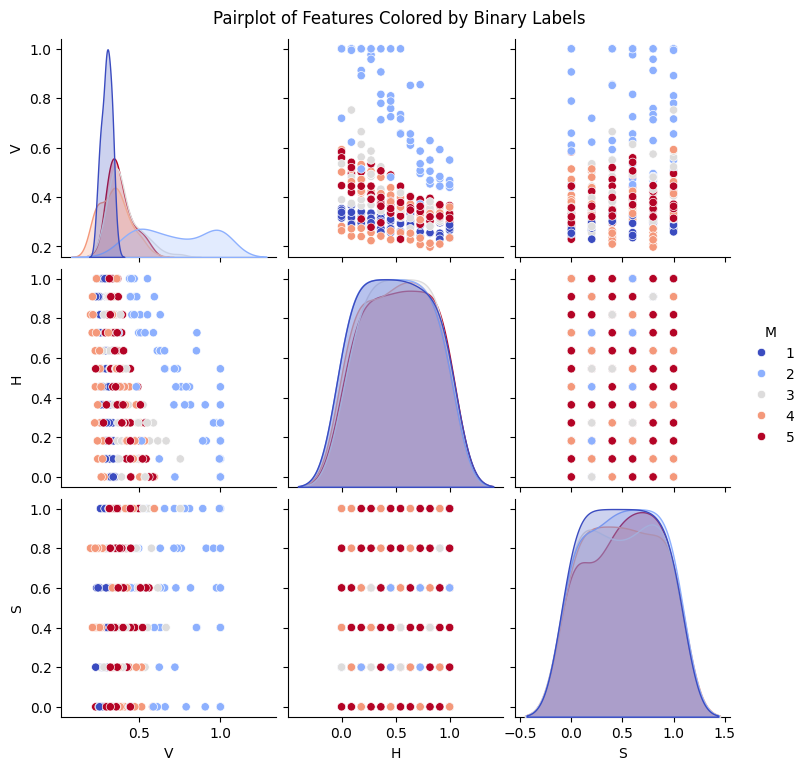

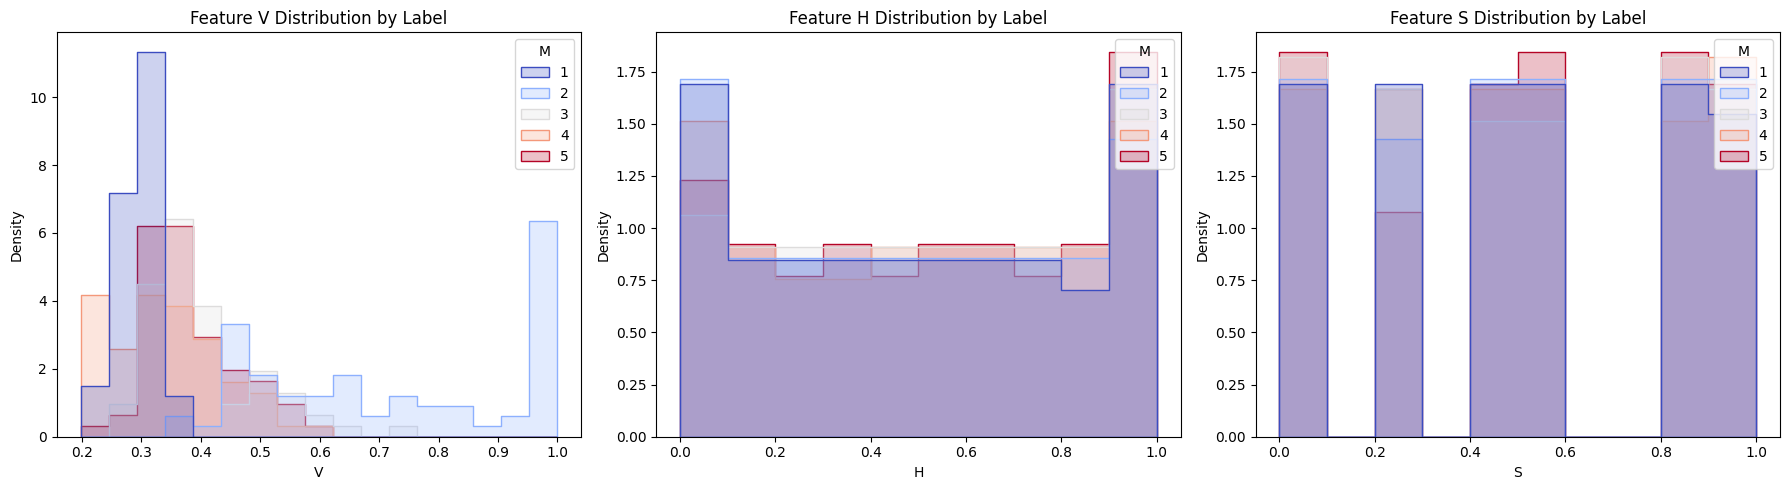

In [13]:
# data visualization

# pair plot to visualize the relationship between features
sns.pairplot(df, vars=['V', 'H', 'S'], hue='M', palette='coolwarm')
plt.suptitle('Pairplot of Features Colored by Binary Labels', y=1.02)
plt.show()

# distribution plots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='V', hue='M', element='step', stat='density', common_norm=False, palette='coolwarm', ax=axes[0])
axes[0].set_title('Feature V Distribution by Label')

sns.histplot(data=df, x='H', hue='M', element='step', stat='density', common_norm=False, palette='coolwarm', ax=axes[1])
axes[1].set_title('Feature H Distribution by Label')

sns.histplot(data=df, x='S', hue='M', element='step', stat='density', common_norm=False, palette='coolwarm', ax=axes[2])
axes[2].set_title('Feature S Distribution by Label')

plt.tight_layout()
plt.show()

We convert this problem into a binary classification problem with labels: 0 (not a mine) and 1 (a mine)

In [14]:
labels0 = df['M']
labels_binary = labels0.apply(lambda x: 0 if x == 1 else 1).to_numpy(dtype='int32')
labels = labels_binary

features0 = df[['V', 'H', 'S']]
features = features0.to_numpy(dtype='float64')

# now, labels contains  binary classification labels
print(labels)
print(features)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
[[0.33815676 0.         0.        ]
 [0.32024133 0.18181818 0.        ]
 [0.28700875 0.27272727 0.        ]
 ...
 [0.35347392 0.45454545 1.        ]
 [0.36253735 0.72727273 1.        ]
 [0.31419905 1.         1.        ]]


In [15]:
# performing train test split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=42
)

# CLASSICAL MACHINE LEARNING ON THE MINE DATASET

We are going to test the following *Classical ML Algorithms* on the dataset:
1.   Support Vector Classifier (SVC)
2.   Logistic Regression
3.   Naive Bayes
4.   K-Nearest Neighbors



# Developing and Training Classical Models

In [16]:
# list of classifiers
classifiers = {
    'Support Vector Classifier': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [17]:
# function to evaluate and plot the model
def evaluate_model(model, model_name):
    _ = model.fit(train_features, train_labels)  # suppress printing the return value

    train_score = model.score(train_features, train_labels)
    test_score = model.score(test_features, test_labels)

    print(f"{model_name} on the training dataset: {train_score:.3f}")
    print(f"{model_name} on the test dataset:     {test_score:.3f}")

    # making predictions
    test_pred = model.predict(test_features)
    test_prob = model.predict_proba(test_features)[:, 1]

    # calculating the accuracy metrics
    accuracy = accuracy_score(test_labels, test_pred)
    f1 = f1_score(test_labels, test_pred)
    precision = precision_score(test_labels, test_pred)
    recall = recall_score(test_labels, test_pred)

    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

    # calculating ROC AUC score and plotting ROC curve
    roc_auc = roc_auc_score(test_labels, test_prob)
    fpr, tpr, _ = roc_curve(test_labels, test_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # plotting confusion matrix and identifying FP, FN, TP, TN
    cm = confusion_matrix(test_labels, test_pred)

    # extracting TN, FP, FN, TP values
    tn, fp, fn, tp = cm.ravel()

    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Positives: {tp}')

    # plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()




Evaluating Support Vector Classifier
Support Vector Classifier on the training dataset: 0.774
Support Vector Classifier on the test dataset:     0.824
Accuracy: 0.8235294117647058
F1 Score: 0.9032258064516129
Precision: 0.835820895522388
Recall: 0.9824561403508771


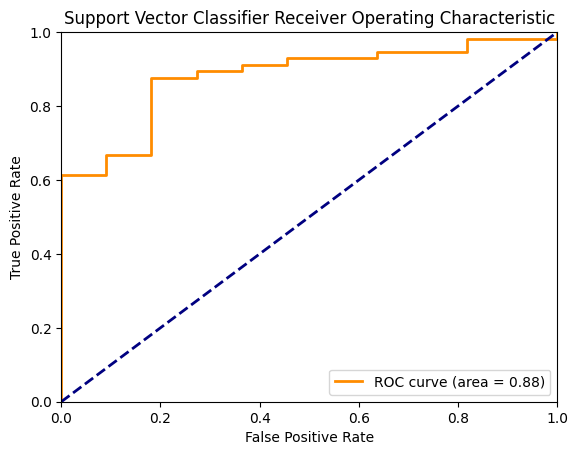

True Negatives: 0
False Positives: 11
False Negatives: 1
True Positives: 56


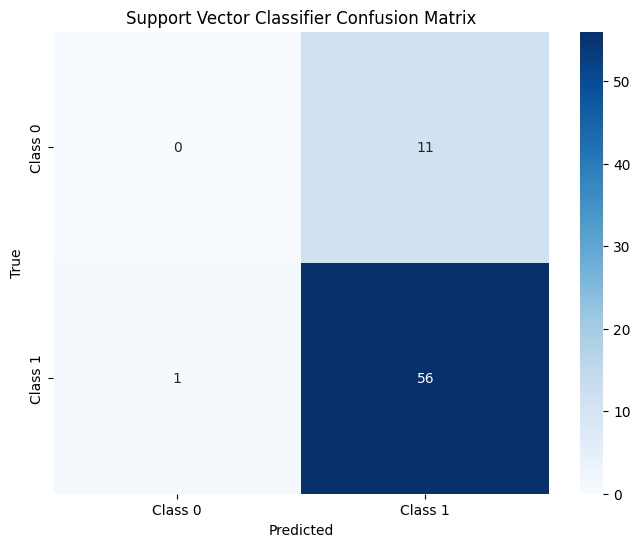


Evaluating Logistic Regression
Logistic Regression on the training dataset: 0.778
Logistic Regression on the test dataset:     0.838
Accuracy: 0.8382352941176471
F1 Score: 0.9119999999999999
Precision: 0.8382352941176471
Recall: 1.0


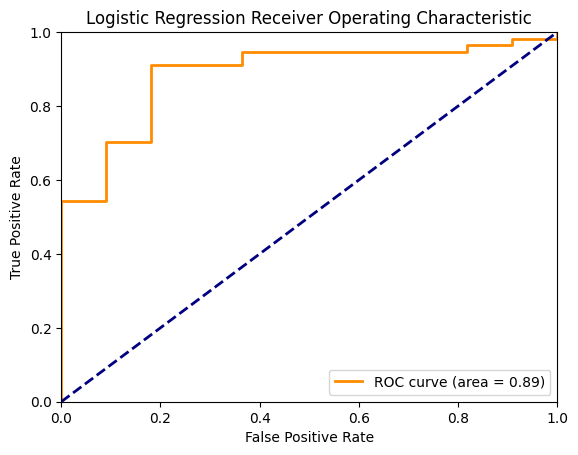

True Negatives: 0
False Positives: 11
False Negatives: 0
True Positives: 57


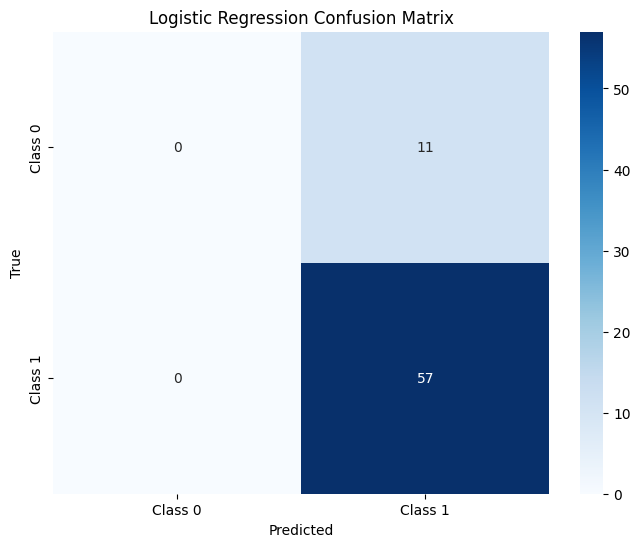


Evaluating Naive Bayes
Naive Bayes on the training dataset: 0.819
Naive Bayes on the test dataset:     0.794
Accuracy: 0.7941176470588235
F1 Score: 0.8653846153846154
Precision: 0.9574468085106383
Recall: 0.7894736842105263


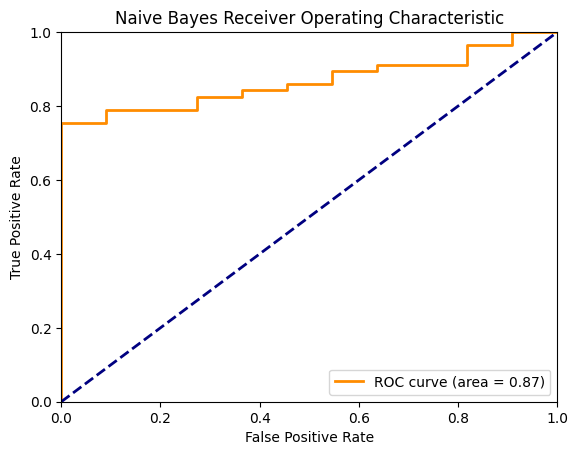

True Negatives: 9
False Positives: 2
False Negatives: 12
True Positives: 45


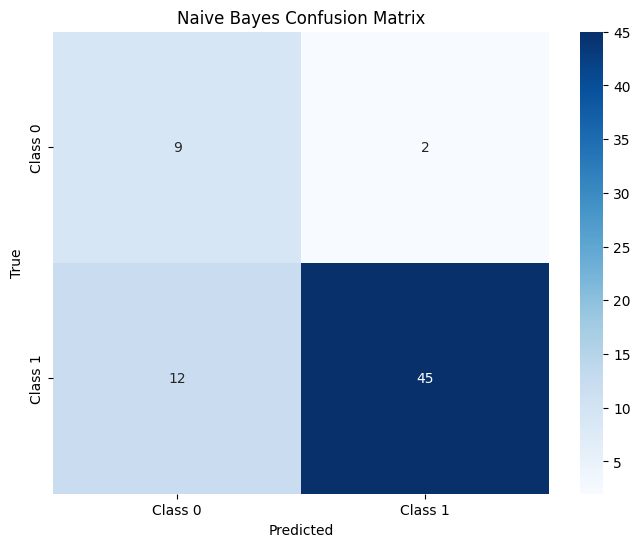


Evaluating K-Nearest Neighbors
K-Nearest Neighbors on the training dataset: 0.867
K-Nearest Neighbors on the test dataset:     0.838
Accuracy: 0.8382352941176471
F1 Score: 0.9105691056910568
Precision: 0.8484848484848485
Recall: 0.9824561403508771


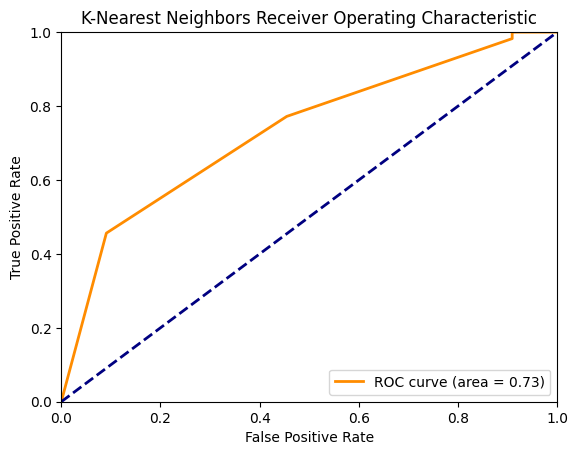

True Negatives: 1
False Positives: 10
False Negatives: 1
True Positives: 56


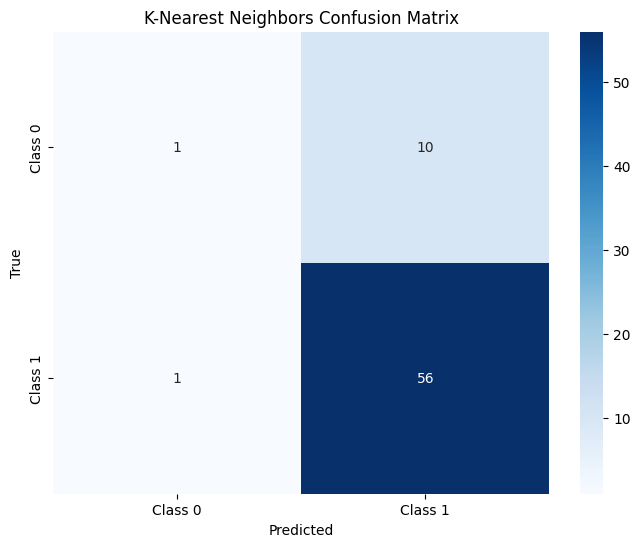

In [18]:
# iterating over classifiers
for model_name, model in classifiers.items():
    print(f'\nEvaluating {model_name}')
    evaluate_model(model, model_name)

# Quantum Classical Hybrid Machine Learning on the Dataset

Here we are going to use *Variational Quantum Classifier* (VQC) to perform Binary Classification on the dataset

## Model Development

In [19]:
num_features = train_features.shape[1]

# defining the feature map and ansatz
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=5)

In [20]:
# list of optimizers
optimizers = [
    COBYLA(maxiter=100),
    SPSA(maxiter=100),
    NELDER_MEAD(maxiter=100),
    ADAM(maxiter=100),
    L_BFGS_B(maxiter=100),
    SLSQP(maxiter=100),
    POWELL(maxiter=100),
    TNC(maxiter=100),
    CG(maxiter=100)
]

In [21]:
# callback function for plotting
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
def callback_graph(weights, obj_func_eval):
    objective_func_vals.append(obj_func_eval)

In [23]:
# creating a dictionary to store the results for output
results = {}

## Model Training and Evaluation

In [24]:
# looping through each optimizer and evaluating the VQC model
for optimizer in optimizers:
    optimizer_name = optimizer.__class__.__name__
    print(f"\nEvaluating VQC with {optimizer_name} optimizer")

    sampler = Sampler()
    vqc = VQC(
        sampler=sampler,
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=callback_graph,
    )

    # clearing objective value history
    objective_func_vals = []

    start = time.time()
    vqc.fit(train_features, train_labels)
    elapsed = time.time() - start

    # making predictions
    test_pred = vqc.predict(test_features)
    test_prob = vqc.predict(test_features) # for the positive class

    # calculating accuracy, F1 score, precision, and recall
    accuracy = accuracy_score(test_labels, test_pred)
    f1 = f1_score(test_labels, test_pred)
    precision = precision_score(test_labels, test_pred)
    recall = recall_score(test_labels, test_pred)

    # calculating ROC AUC score and plotting ROC curve
    roc_auc = roc_auc_score(test_labels, test_prob)
    fpr, tpr, _ = roc_curve(test_labels, test_prob)

    # storing the results
    results[optimizer_name] = {
        'train_score': vqc.score(train_features, train_labels),
        'test_score': vqc.score(test_features, test_labels),
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'cm': confusion_matrix(test_labels, test_pred),
        'objective_func_vals': objective_func_vals.copy(),
        'elapsed_time': elapsed
    }


Evaluating VQC with COBYLA optimizer

Evaluating VQC with SPSA optimizer

Evaluating VQC with NELDER_MEAD optimizer

Evaluating VQC with ADAM optimizer

Evaluating VQC with L_BFGS_B optimizer

Evaluating VQC with SLSQP optimizer

Evaluating VQC with POWELL optimizer

Evaluating VQC with TNC optimizer

Evaluating VQC with CG optimizer



COBYLA Results:
Training time: 136 seconds


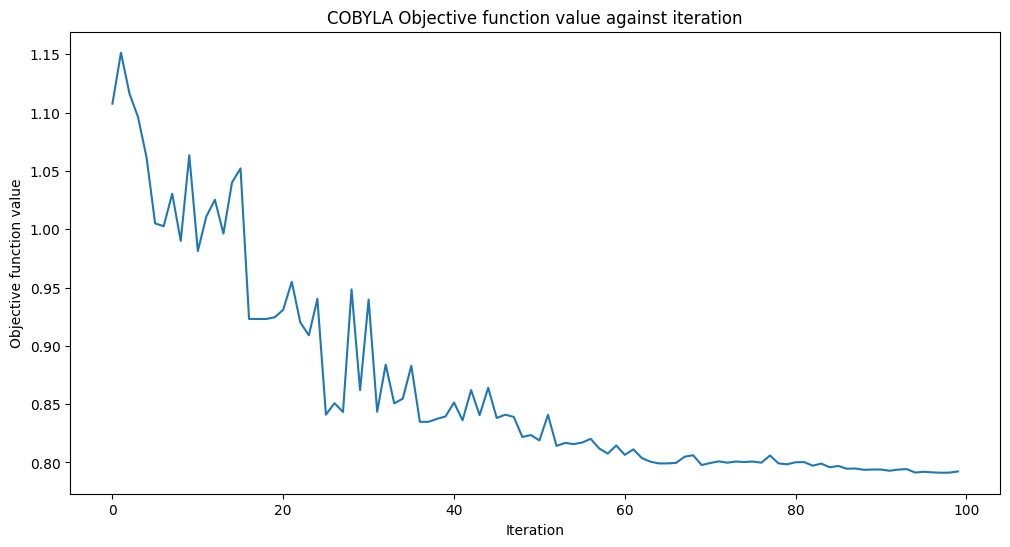

Quantum VQC (using COBYLA optimizer) train score: 0.76
Quantum VQC (using COBYLA optimizer) test score:     0.85
Accuracy: 0.8529411764705882
F1 Score: 0.9180327868852458
Precision: 0.8615384615384616
Recall: 0.9824561403508771


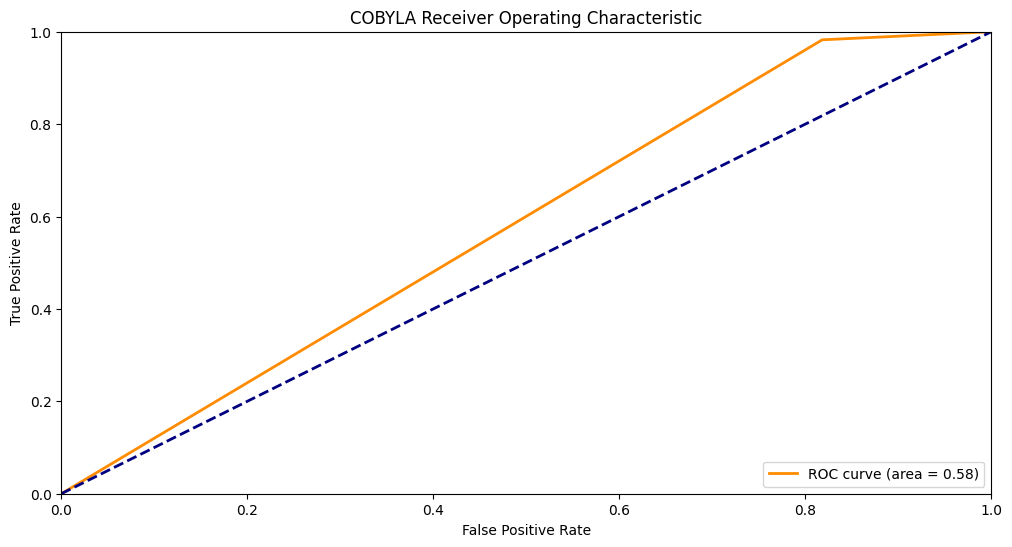

True Negatives: 2
False Positives: 9
False Negatives: 1
True Positives: 56


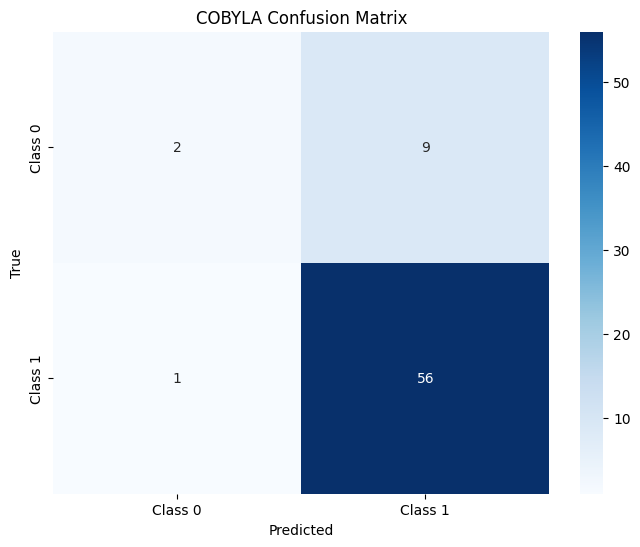


SPSA Results:
Training time: 346 seconds


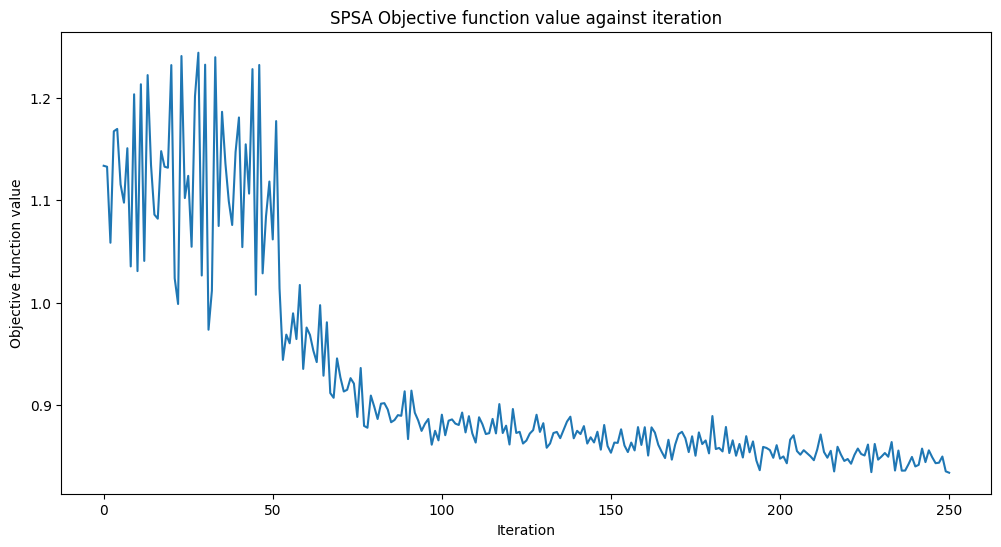

Quantum VQC (using SPSA optimizer) train score: 0.76
Quantum VQC (using SPSA optimizer) test score:     0.81
Accuracy: 0.8088235294117647
F1 Score: 0.8907563025210085
Precision: 0.8548387096774194
Recall: 0.9298245614035088


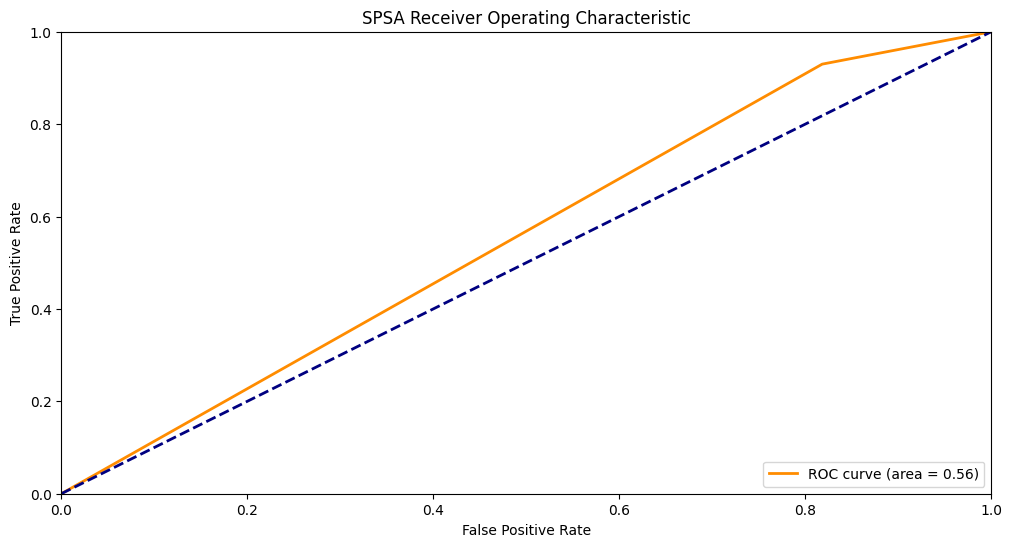

True Negatives: 2
False Positives: 9
False Negatives: 4
True Positives: 53


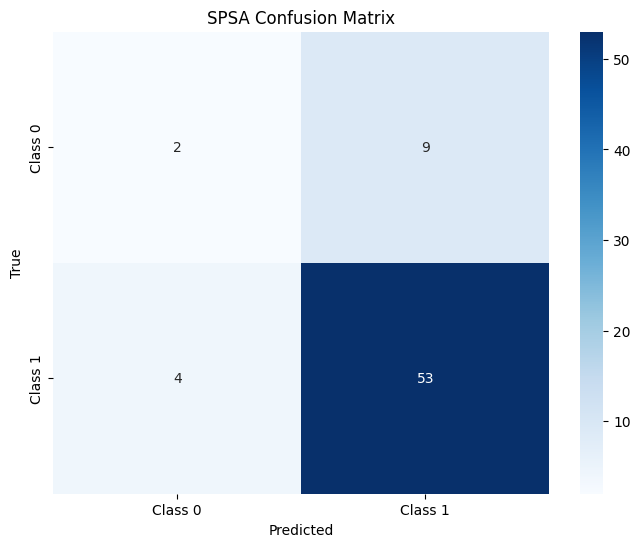


NELDER_MEAD Results:
Training time: 177 seconds


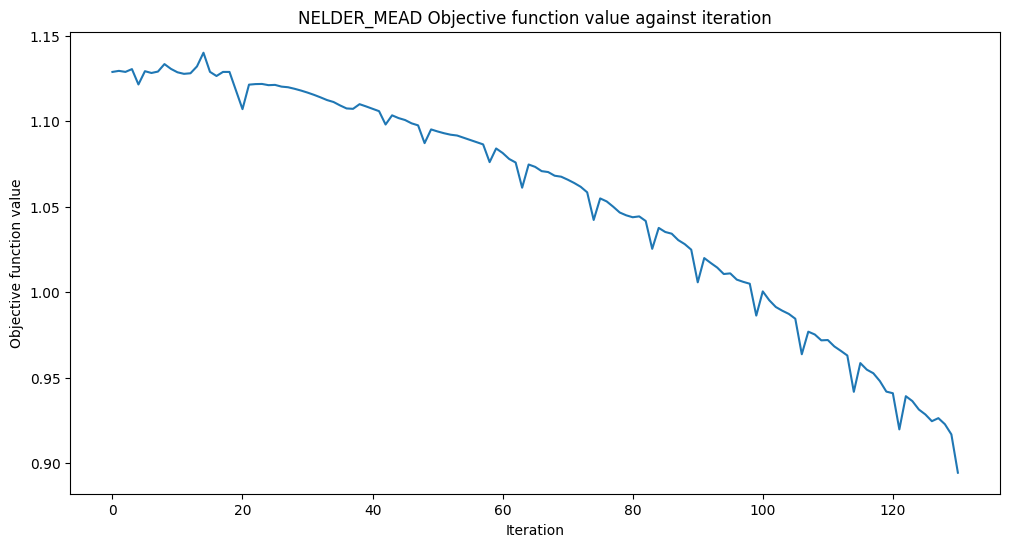

Quantum VQC (using NELDER_MEAD optimizer) train score: 0.65
Quantum VQC (using NELDER_MEAD optimizer) test score:     0.76
Accuracy: 0.7647058823529411
F1 Score: 0.8571428571428571
Precision: 0.8727272727272727
Recall: 0.8421052631578947


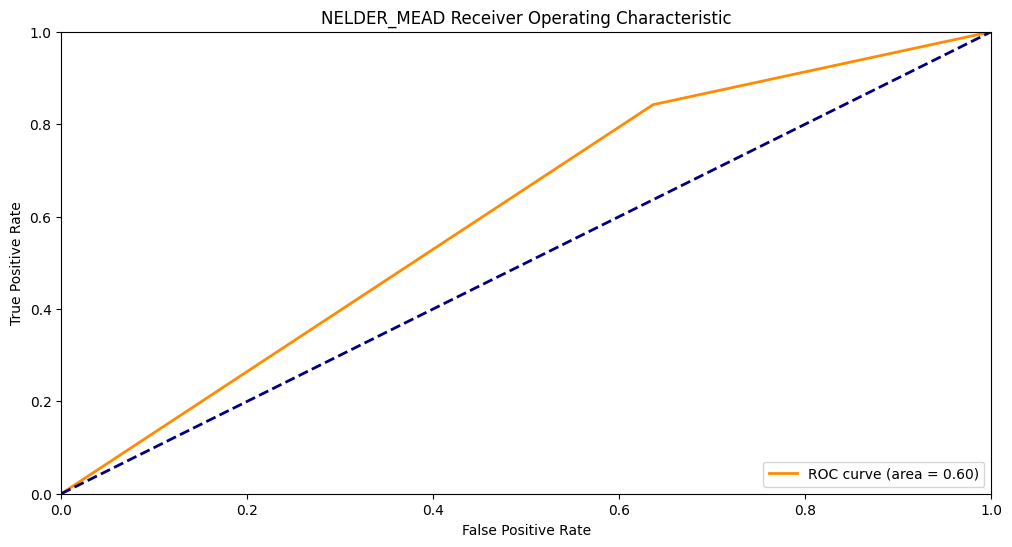

True Negatives: 4
False Positives: 7
False Negatives: 9
True Positives: 48


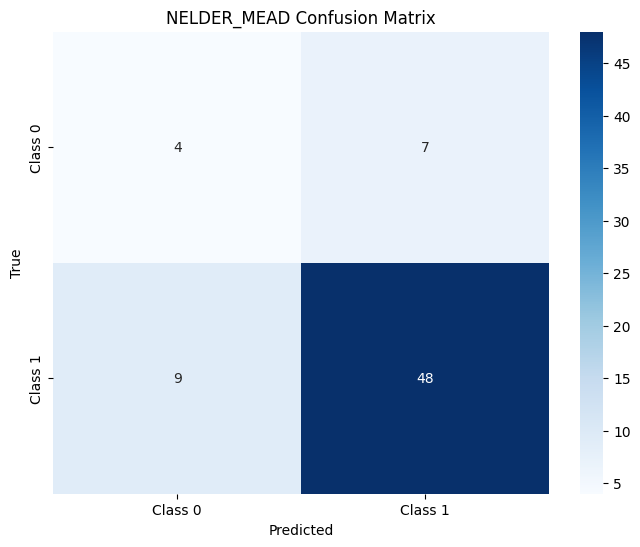


ADAM Results:
Training time: 3701 seconds


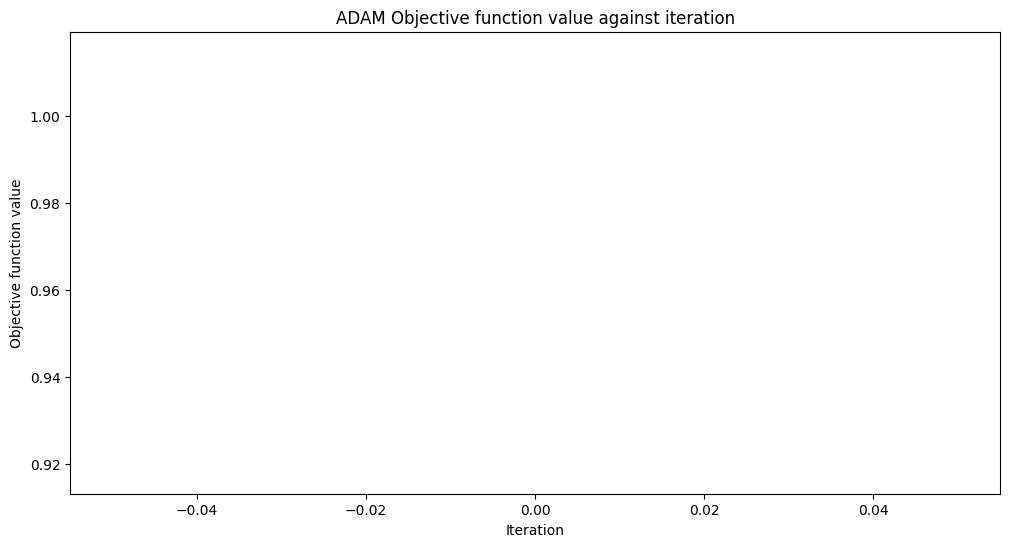

Quantum VQC (using ADAM optimizer) train score: 0.57
Quantum VQC (using ADAM optimizer) test score:     0.65
Accuracy: 0.6470588235294118
F1 Score: 0.7735849056603773
Precision: 0.8367346938775511
Recall: 0.7192982456140351


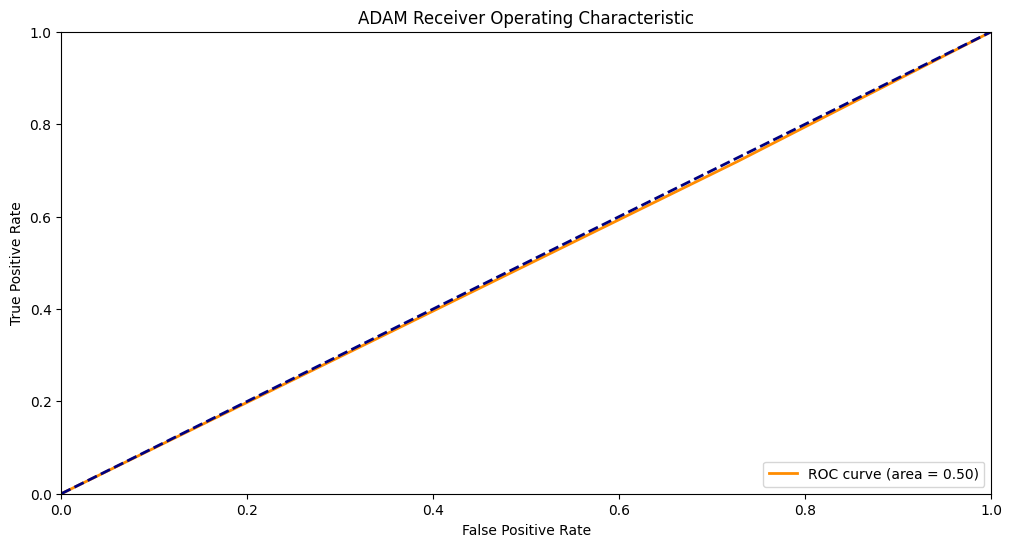

True Negatives: 3
False Positives: 8
False Negatives: 16
True Positives: 41


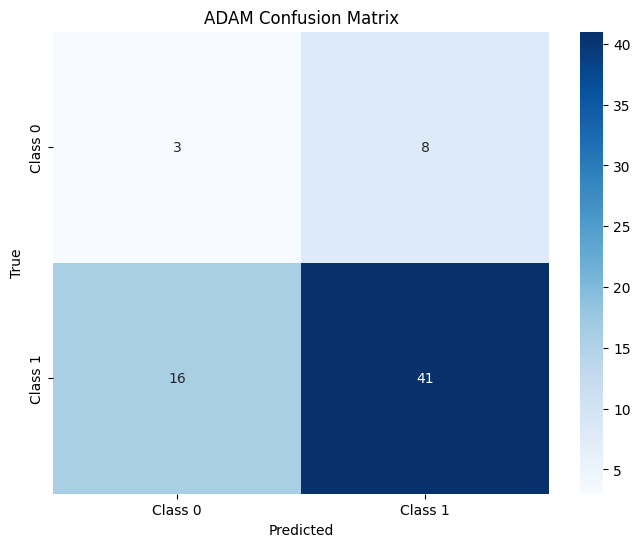


L_BFGS_B Results:
Training time: 1515 seconds


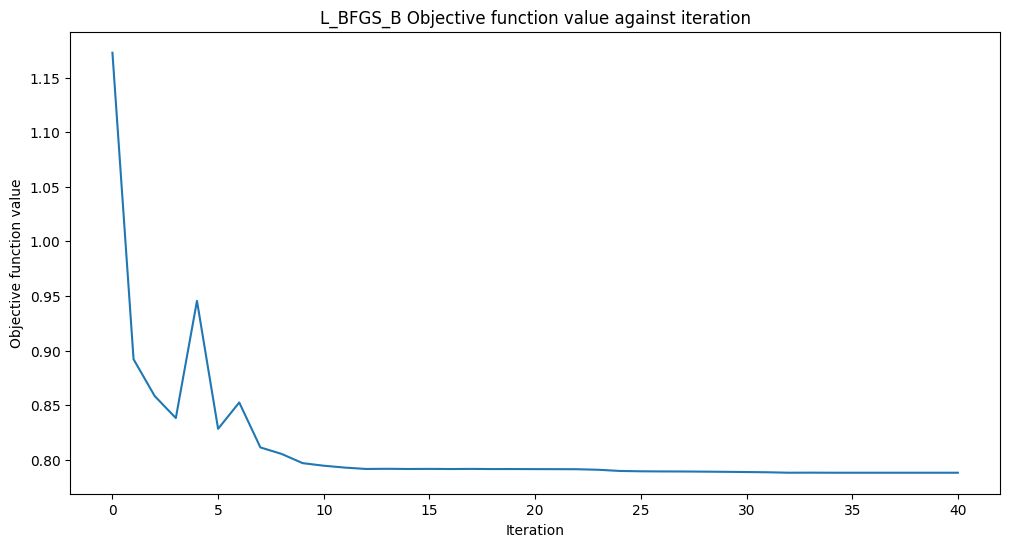

Quantum VQC (using L_BFGS_B optimizer) train score: 0.76
Quantum VQC (using L_BFGS_B optimizer) test score:     0.85
Accuracy: 0.8529411764705882
F1 Score: 0.9193548387096774
Precision: 0.8507462686567164
Recall: 1.0


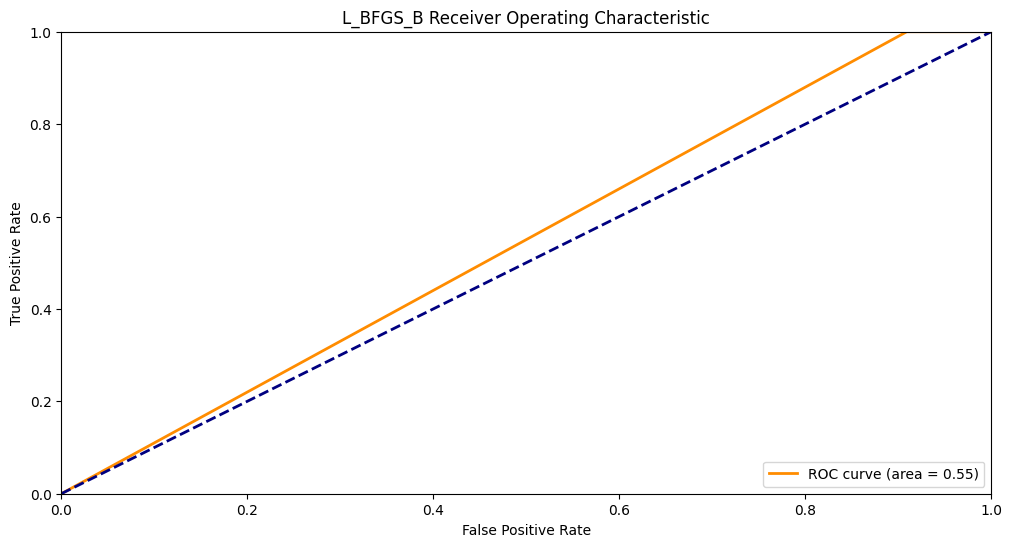

True Negatives: 1
False Positives: 10
False Negatives: 0
True Positives: 57


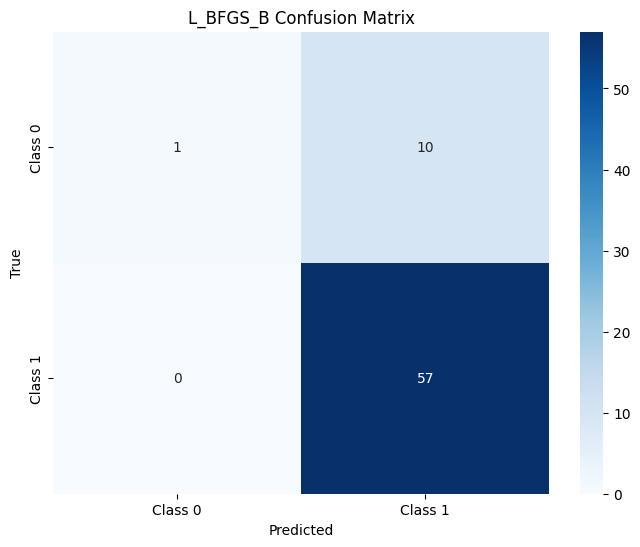


SLSQP Results:
Training time: 2355 seconds


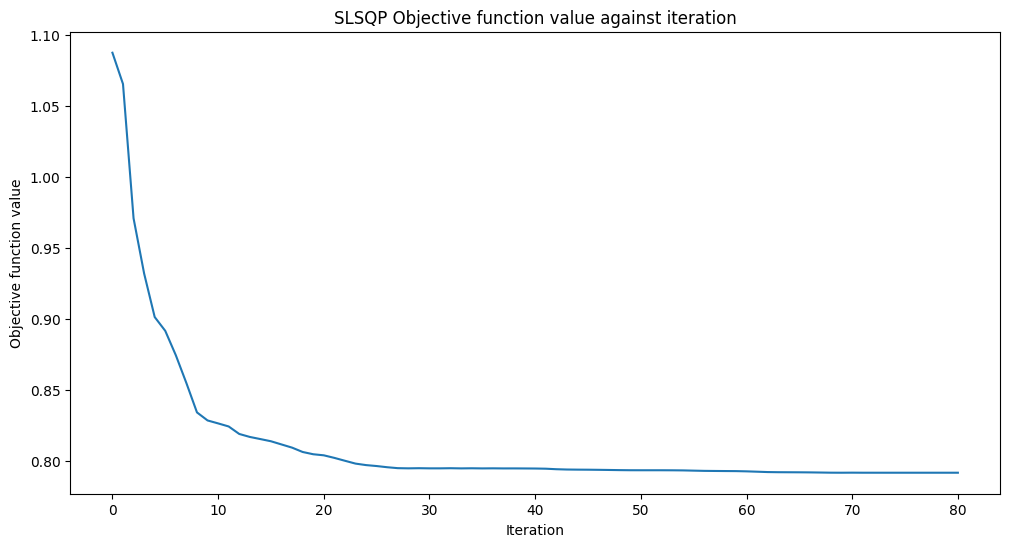

Quantum VQC (using SLSQP optimizer) train score: 0.77
Quantum VQC (using SLSQP optimizer) test score:     0.85
Accuracy: 0.8529411764705882
F1 Score: 0.9180327868852458
Precision: 0.8615384615384616
Recall: 0.9824561403508771


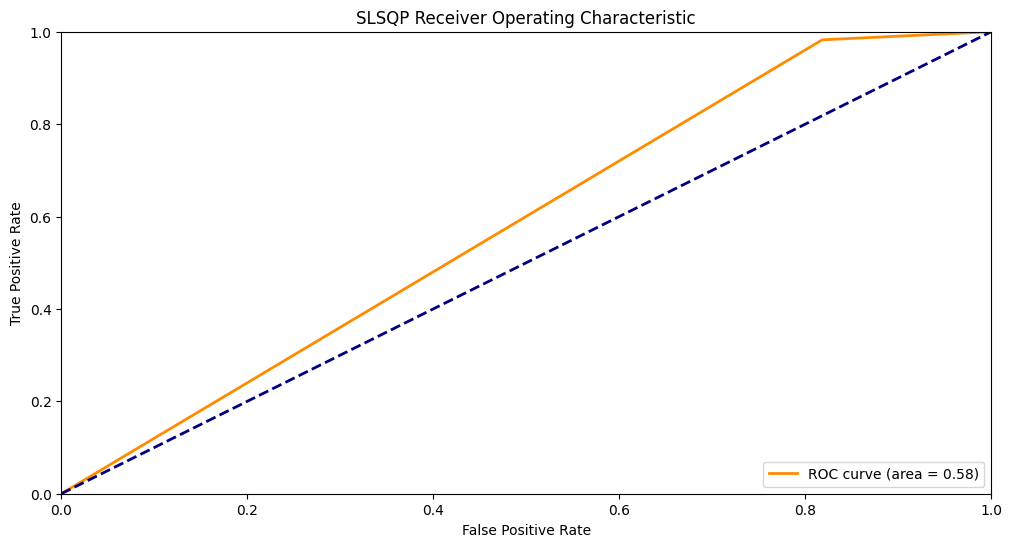

True Negatives: 2
False Positives: 9
False Negatives: 1
True Positives: 56


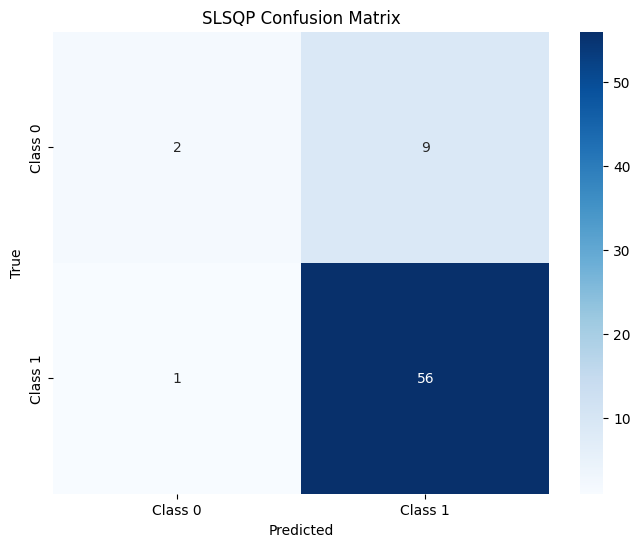


POWELL Results:
Training time: 1349 seconds


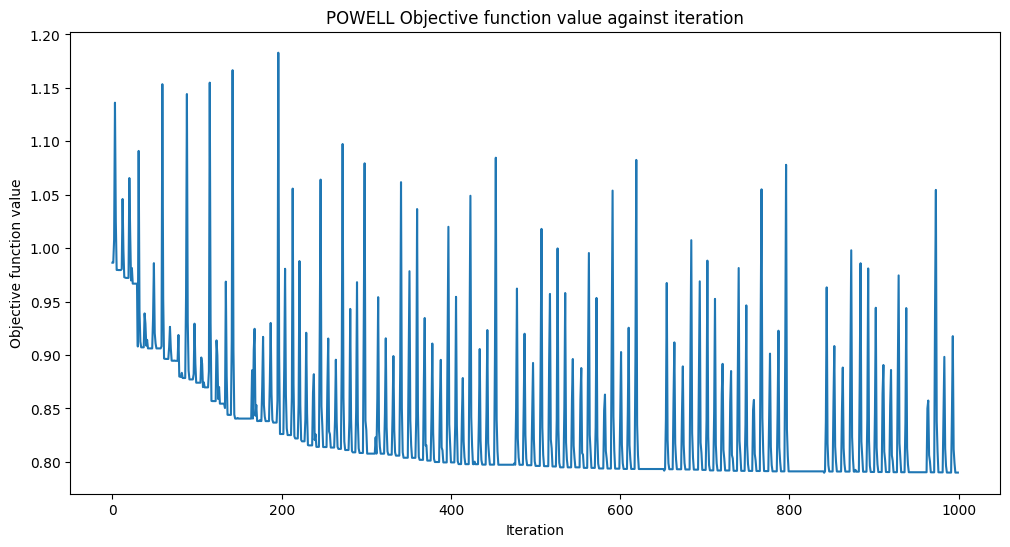

Quantum VQC (using POWELL optimizer) train score: 0.76
Quantum VQC (using POWELL optimizer) test score:     0.81
Accuracy: 0.8088235294117647
F1 Score: 0.8943089430894309
Precision: 0.8333333333333334
Recall: 0.9649122807017544


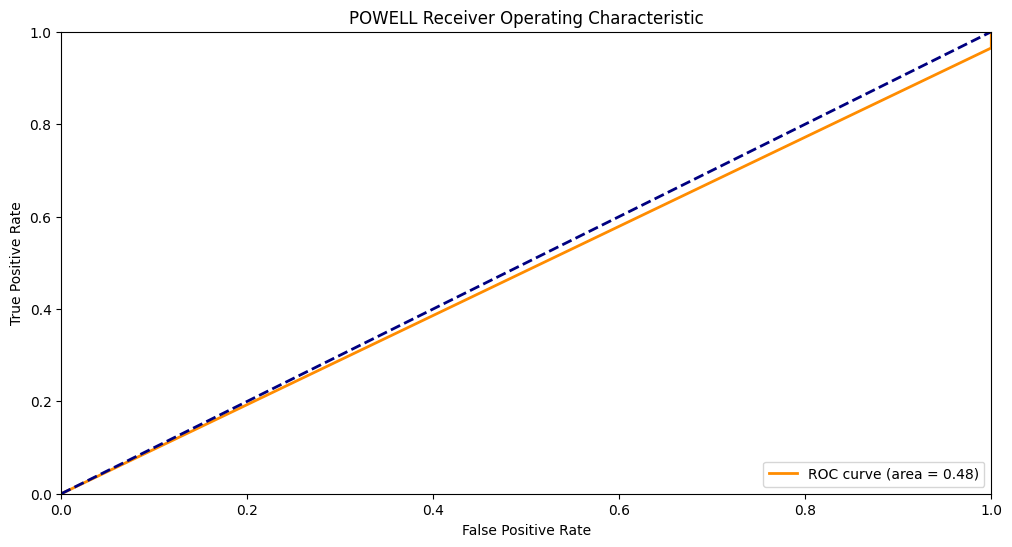

True Negatives: 0
False Positives: 11
False Negatives: 2
True Positives: 55


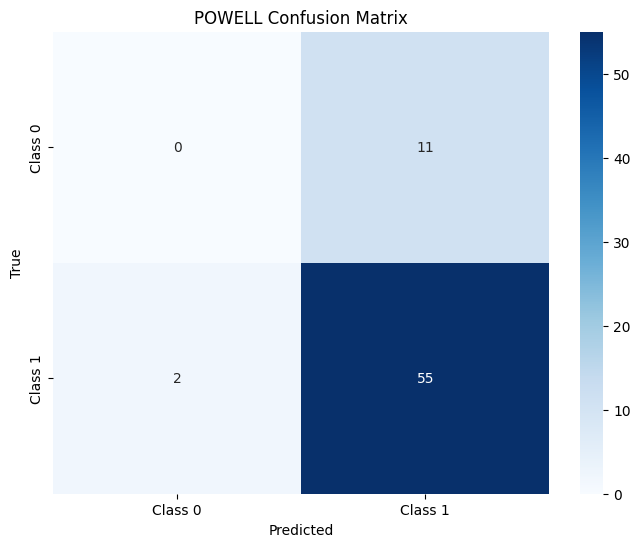


TNC Results:
Training time: 3742 seconds


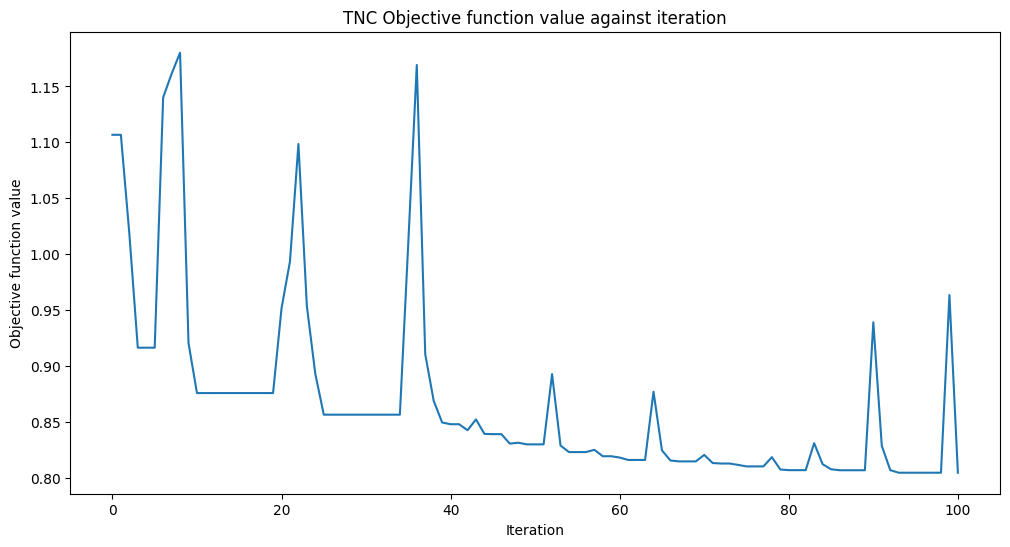

Quantum VQC (using TNC optimizer) train score: 0.77
Quantum VQC (using TNC optimizer) test score:     0.85
Accuracy: 0.8529411764705882
F1 Score: 0.9180327868852458
Precision: 0.8615384615384616
Recall: 0.9824561403508771


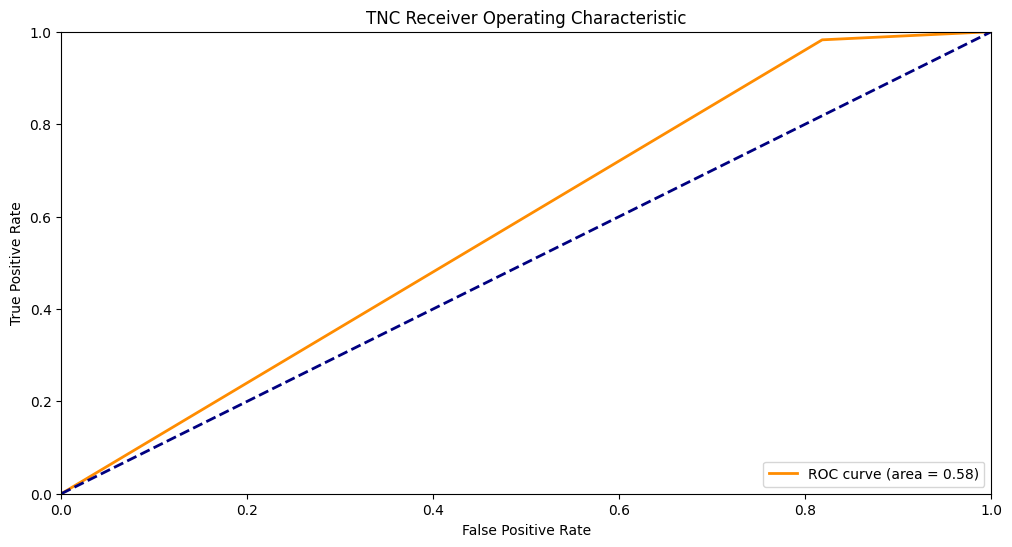

True Negatives: 2
False Positives: 9
False Negatives: 1
True Positives: 56


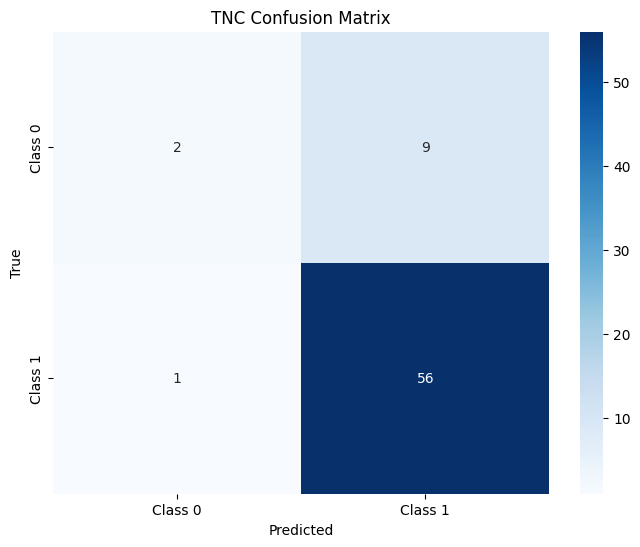


CG Results:
Training time: 5040 seconds


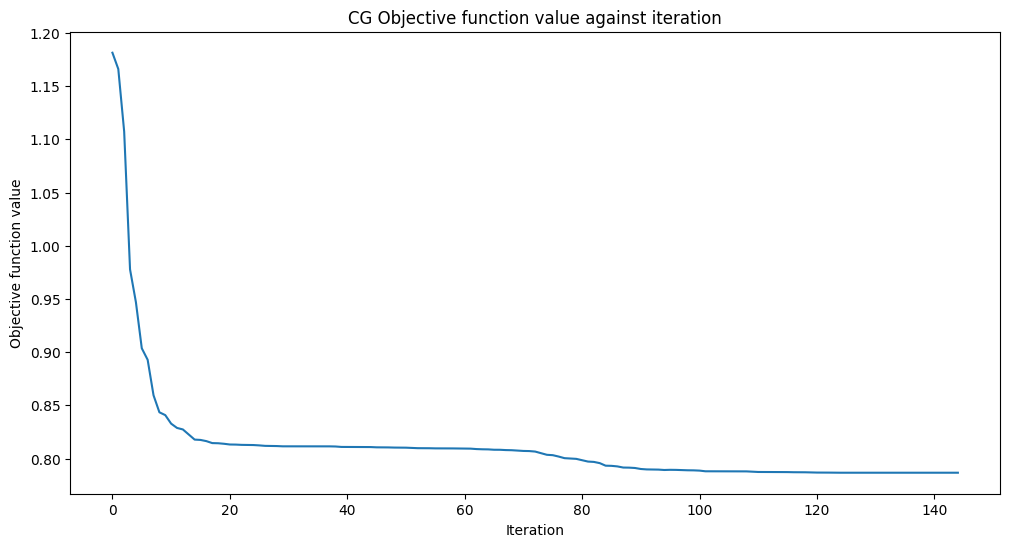

Quantum VQC (using CG optimizer) train score: 0.76
Quantum VQC (using CG optimizer) test score:     0.81
Accuracy: 0.8088235294117647
F1 Score: 0.8943089430894309
Precision: 0.8333333333333334
Recall: 0.9649122807017544


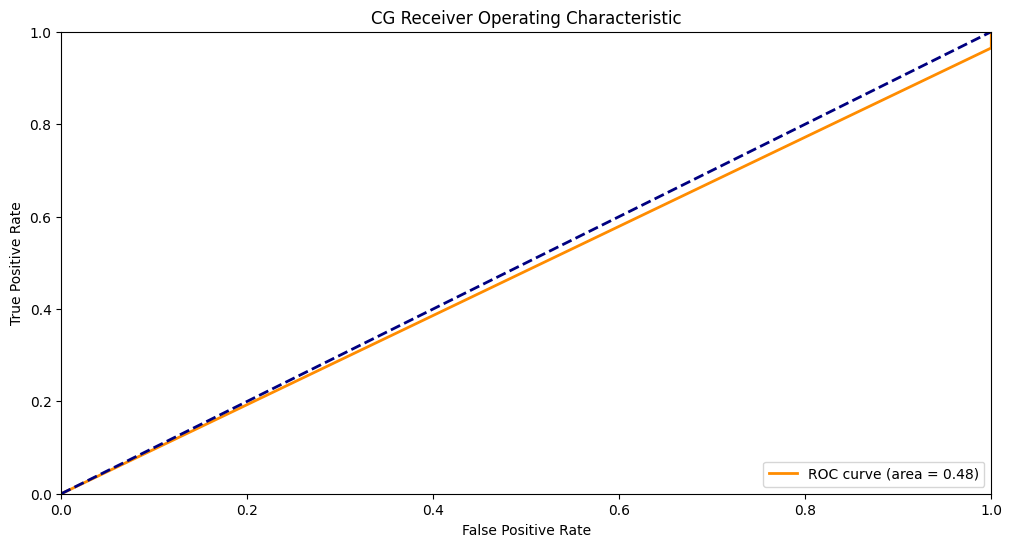

True Negatives: 0
False Positives: 11
False Negatives: 2
True Positives: 55


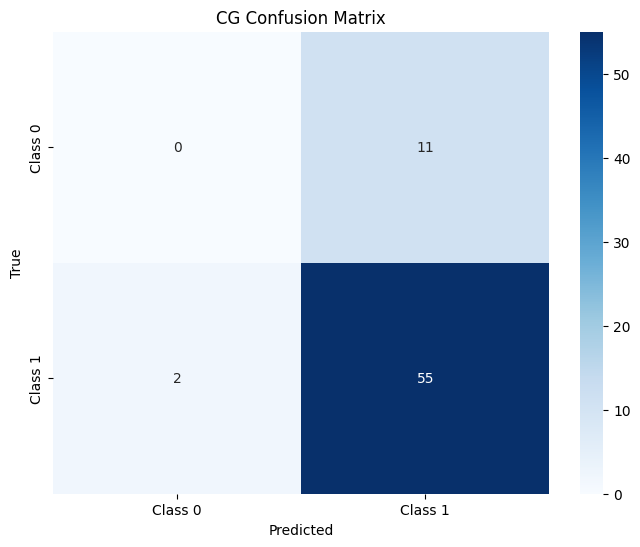

In [25]:
# plotting and printing results for all optimizers
for optimizer_name, result in results.items():
    print(f"\n{optimizer_name} Results:")
    print(f"Training time: {round(result['elapsed_time'])} seconds")

    # plotting the objective function value against iteration
    plt.figure()
    plt.title(f"{optimizer_name} Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(result['objective_func_vals'])), result['objective_func_vals'])
    plt.show()

    # printing various accuracy metrics
    print(f"Quantum VQC (using {optimizer_name} optimizer) train score: {result['train_score']:.2f}")
    print(f"Quantum VQC (using {optimizer_name} optimizer) test score:     {result['test_score']:.2f}")
    print(f'Accuracy: {result["accuracy"]}')
    print(f'F1 Score: {result["f1"]}')
    print(f'Precision: {result["precision"]}')
    print(f'Recall: {result["recall"]}')

    # plotting the ROC curve
    plt.figure()
    plt.plot(result['fpr'], result['tpr'], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % result['roc_auc'])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{optimizer_name} Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # plotting confusion matrix
    cm = result['cm']
    tn, fp, fn, tp = cm.ravel()
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Positives: {tp}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{optimizer_name} Confusion Matrix')
    plt.show()

**Conclusion:** On training VQC using optimizers like *SLSQP*, *TNC*, *L_BFGS_B*, *COBYLA*, we obtain better results as compared to classical classifiers to solve the mine detection problem.